
### **Cardio Good Fitness**

Hugo Hiraoka


**Objective**
1. Explore the dataset to identify differences between the customers of each product. 
2. You can also explore relationships between the different attributes of the customers. 
Notes:
You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

**Specific Tasks**

You are expected to do the following :

1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform univariate and multivariate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers.
 

**Data Dictionary**

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

- Product - The model no. of the treadmill

- Age -  Age of the customer in no of years

- Gender - Gender of the customer

- Education - Education of the customer in no. of years

- Marital Status - Marital status of the customer

- Usage - Avg. # times the customer wants to use the treadmill every week

- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)

- Income - Income of the customer

- Miles- Miles that a customer expects to run
 


**Best Practices for Notebook**
1. The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
2. The notebook should be run from start to finish in a sequential manner before submission.
3. It is preferable to remove all warnings and errors before submission.
4. The notebook should be submitted as an HTML file (.html) and NOT as a notebook file (.ipynb).
 
Note:
Please note the visualizations done in 'Plotly' will lose interactiveness after the notebook is converted to '.html' format. So, it is not mandatory to use Plotly and no marks will be deducted for the same. 


**Submission Guidelines**
1. The submission should be a well-commented notebook [format - .html]
2. Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks.
3. Please ensure timely submission as any submission post-deadline will not be accepted for evaluation.
4. Submission will not be evaluated if it is submitted post-deadline, or,
more than 1 file is submitted.



---



## **Cardio Good Fitness**


Cardio Good Fitness is a retail store that among many products, sells treadmills. 

The company has provided us with customer data of its treadmill products. We will use this data to build a customer profile for every treadmill product, and provide insights and recommendations on these that will help the company target new customers.


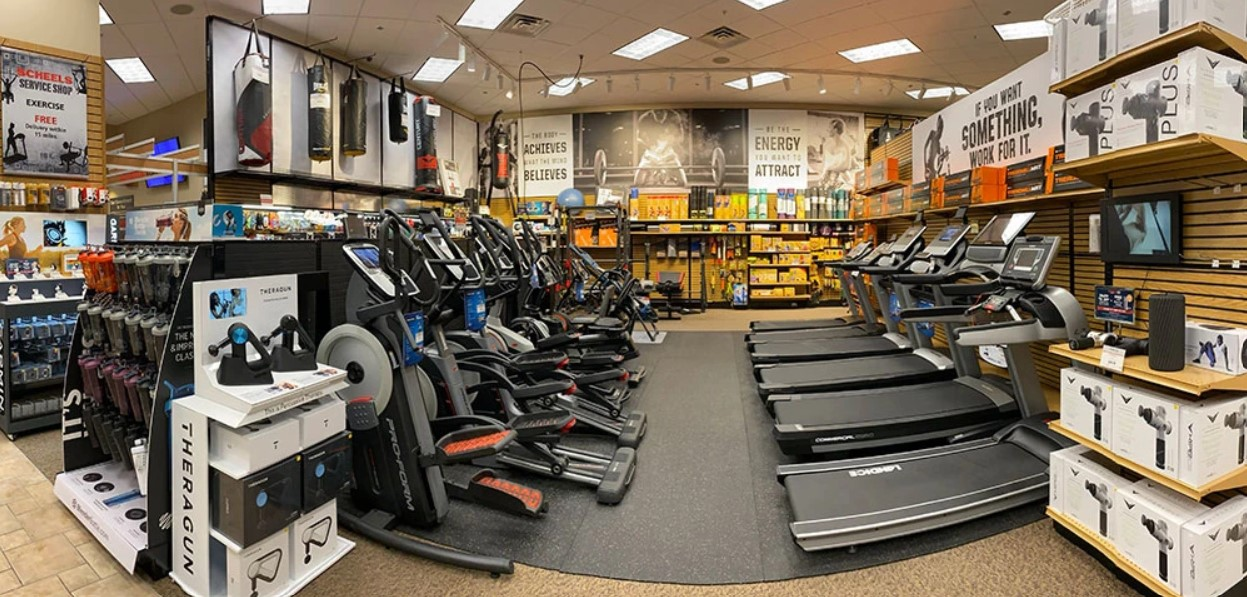
Figure 1 - Good Cardio Fitness Store (Image is referential only source:www.scheels.com)

---------------------

## 0. Setup

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#restrict float value to 3 decimal places
pd.set_option('display.float_format',lambda x: '%.3f' % x)
%matplotlib inline

In [2]:
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#allow access to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#import dataset and store into a dataframe
cardiodata_df = pd.read_csv("/content/gdrive/MyDrive/AIML-UnivOfTexas/Project1/CardioGoodFitness.csv")

-------------------


## 1. Dataset

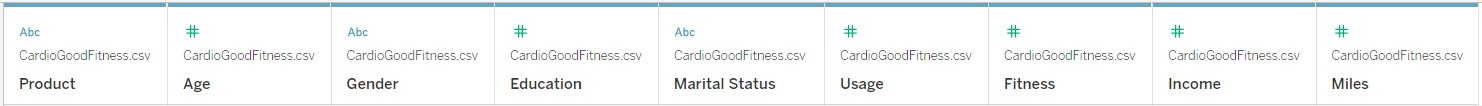
Figure 2 - Dataset Header as shown in Tableau


**Attributes**

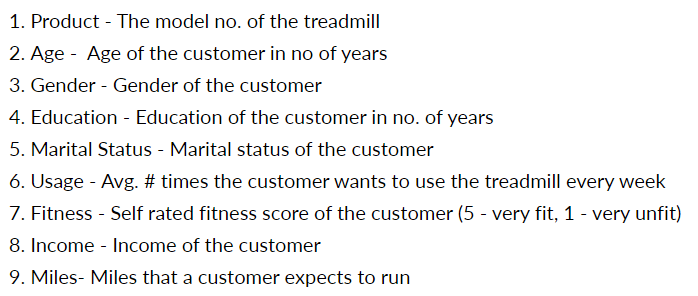

##2. Sanity Checks

In [5]:
#Understand the shape of the data
cardiodata_df.shape

(180, 9)

In [6]:
print("The number or rows in the dataset is " + str(len(cardiodata_df.index)) + ". The number of columns in the dataset is " + str(len(cardiodata_df.columns)))
print("There are " + str(len(cardiodata_df.index)) + " customers and " + str(len(cardiodata_df.columns)) + " features in the data set.")

The number or rows in the dataset is 180. The number of columns in the dataset is 9
There are 180 customers and 9 features in the data set.


In [7]:
#Visualize the data types
cardiodata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


There are 3 object type columns and 6 numerical columns. There are no NULL entries.
The data types for each column are as expected.

In [8]:
#lets confirm if there are nulls in another way
cardiodata_df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

The above corroborates that there are no null values.

In [9]:
#lets look for duplicate entries
cardiodata_df.duplicated().sum()

0

There are no duplicated entries.

In [10]:
#Lets take a look at the first 5 lines
cardiodata_df.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

In [11]:
#lets look at the last 15 lines
cardiodata_df.tail(10)

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
170   TM798   31    Male         16     Partnered      6        5   89641   
171   TM798   33  Female         18     Partnered      4        5   95866   
172   TM798   34    Male         16        Single      5        5   92131   
173   TM798   35    Male         16     Partnered      4        5   92131   
174   TM798   38    Male         18     Partnered      5        5  104581   
175   TM798   40    Male         21        Single      6        5   83416   
176   TM798   42    Male         18        Single      5        4   89641   
177   TM798   45    Male         16        Single      5        5   90886   
178   TM798   47    Male         18     Partnered      4        5  104581   
179   TM798   48    Male         18     Partnered      4        5   95508   

     Miles  
170    260  
171    200  
172    150  
173    360  
174    150  
175    200  
176    200  
177    160  
178    120  
179    180

In [12]:
#lets take a look at the statistics of the data set
cardiodata_df.describe().T

count      mean       std       min       25%       50%       75%  \
Age       180.000    28.789     6.943    18.000    24.000    26.000    33.000   
Education 180.000    15.572     1.617    12.000    14.000    16.000    16.000   
Usage     180.000     3.456     1.085     2.000     3.000     3.000     4.000   
Fitness   180.000     3.311     0.959     1.000     3.000     3.000     4.000   
Income    180.000 53719.578 16506.684 29562.000 44058.750 50596.500 58668.000   
Miles     180.000   103.194    51.864    21.000    66.000    94.000   114.750   

                 max  
Age           50.000  
Education     21.000  
Usage          7.000  
Fitness        5.000  
Income    104581.000  
Miles        360.000

**Statistics of the dataset**

- The average age of customers is 29. Fifty percent of customers are 26 or younger and 75% are 33 or less. The oldest person is 50. We anticipate that Cardio Good Fitness customers are young. No abnormal values observed.

- The average years of customer's education is 16 (College) and the minimum is 12 years (High School). Fifty percent of customers have 16 years of education or less.  We anticipate that Cardio Good Fitness customers are well educated. No abnormal values observed.

- The average number of times a customer plans to use a treadmill is about 3 times a week, the minimum is twice a week and the maximum is every day of the week. No abnormal values observed.

- Regarding Fitness, most customers are relatively fit -at least average of better. No abnormal values observed.

- The average income is \$53,720, the minimum income is \$29,562 and the maximum is \$104,581. Less than 50% makes more than 51,000. No abnormal values observed.

- The average miles customers expect to run is 103, being the minimum 21 and the maximum 360. A question arises, Are these miles are going to be run during the lifetime of the treadmil, per month, per week, or per day?  Can we assume that the miles are weekly miles? The maximum number of miles a customer intends to run is 360, which would amount to roughly over 51 miles per day, more than a marathon!. Lets analyze that further later.


We can conclude from the sanity check and dataset analysis:

- The dataset has no null values.
- The dataset has no duplicates.
- The dataset has no mixed data type values in a column.
- We will analyze outliers later.
- We need to make a conclusion regarding the feature Miles. Is this miles per week/month?

------------------

## 3.Univariate Data Analysis 

##3.1 Models (All Treadmills)

In [13]:
#How many Treadmill Products?
product_lists_numbers = cardiodata_df['Product'].nunique()
print("There are " + str(product_lists_numbers) + " treadmill products.")

There are 3 treadmill products.


In [14]:
#What are the Treadmill products
products_model_list = cardiodata_df['Product'].unique()
print("Cardio Good Fitness Treadmills Models are: ")
print("Model")
print("-----")
for x in products_model_list:
  print(x)

Cardio Good Fitness Treadmills Models are: 
Model
-----
TM195
TM498
TM798


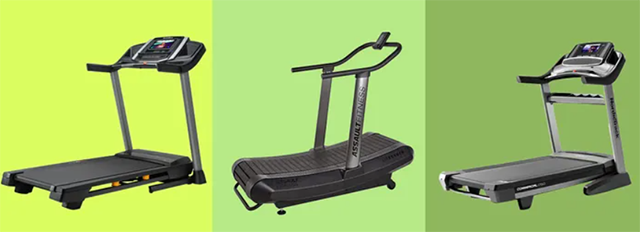


Figure 3 - Good Cardio Fitness Treadmill models 

(reference only. Source: https://nymag.com/strategist/article/best-treadmills.html)

In [15]:
#lets declare a variable Figure to hold the figure number
fig_no = 4 #first figure number

In [16]:
#Customer Preference (Quantity) per Product
product_model_qty= cardiodata_df['Product'].value_counts()

print("Model Quantity")
print("--------------")
print(product_model_qty)

Model Quantity
--------------
TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64


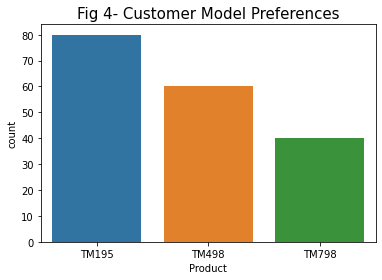

In [17]:
#Treadmill products visualization

plt.title("Fig "+str(fig_no) + "- Customer Model Preferences",fontsize=15)
plt.xlabel("Product")
sns.countplot(data=cardiodata_df,x="Product")
plt.show()
fig_no+=1

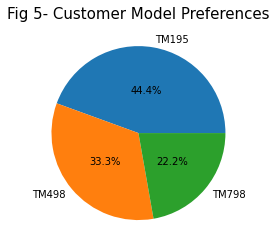

In [18]:
#pie chart model preference
labels_products = cardiodata_df['Product'].unique()
plt.pie(data = cardiodata_df,x=product_model_qty, autopct="%.1f%%",labels=labels_products, pctdistance=0.5)
plt.title("Fig "+ str(fig_no) + "- Customer Model Preferences", fontsize=15)
plt.show()
fig_no+=1

- The most prefered product is TM195 and TM798 is the least preferred. 
- 44% of customers buy the TM195 model and 22% buy the TM798.
- There is rougly a 11.1% increment from TM798 to TM498, and also 11.1% from TM498 to TM195.


##3.2 Age (All Treadmill Models)

In [19]:
#List all ages
customer_age_list = cardiodata_df['Age'].unique()
print("Cardio Good Fitness Customers Ages:")
print(customer_age_list)

Cardio Good Fitness Customers Ages:
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]


In [20]:
#How many different ages in the customer's list
cardiodata_df['Age'].nunique()

32

In [21]:
#How many customers per age?
print("Age Num Cust")
print("-"*14)
cardiodata_df['Age'].value_counts().sort_index(ascending=True)

Age Num Cust
--------------


18     1
19     4
20     5
21     7
22     7
23    18
24    12
25    25
26    12
27     7
28     9
29     6
30     7
31     6
32     4
33     8
34     6
35     8
36     1
37     2
38     7
39     1
40     5
41     1
42     1
43     1
44     1
45     2
46     1
47     2
48     2
50     1
Name: Age, dtype: int64

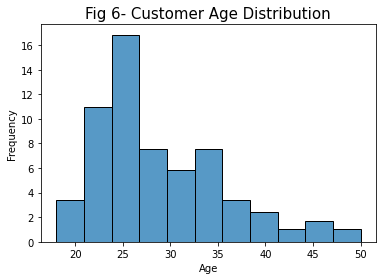

In [22]:
#Customer Age distribution
#`stat` must be one of ['count', 'frequency', 'density', 'probability', 'proportion', 'percent']
#histplot
sns.histplot(data=cardiodata_df, x = "Age", stat="frequency")
plt.title("Fig "+ str(fig_no) +"- Customer Age Distribution",fontsize=15)
plt.show()
fig_no+=1

The most popular customer age is 25.

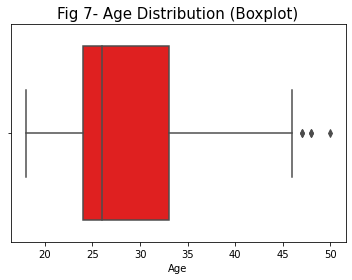

In [23]:
#box plot age distribution
plt.title('Fig '+str(fig_no)+'- Age Distribution (Boxplot)',fontsize=15)
sns.axes_style('whitegrid')
sns.boxplot(data=cardiodata_df, x="Age", color='red')
plt.show()
fig_no+=1

There are some outliers from 47 to 50 years old. But why would these outliers be wrong data? Customers aged 47-50 can perfectly use treadmill machines.

We consider these 'outliers' as good valuable data.

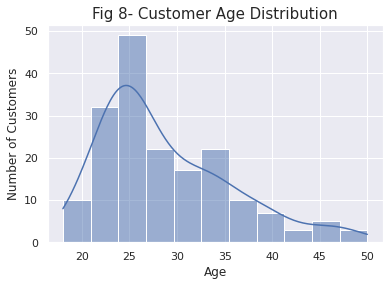

In [24]:
#just for visual purposes, we produce a histplot with a distribution curve (kde option)
sns.set(style='darkgrid')
sns.histplot(data=cardiodata_df, x = "Age", kde=True)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Fig "+str(fig_no)+"- Customer Age Distribution", fontdict={'fontsize':15})
plt.show()
fig_no+=1

We notice that the Age distributed is skewed to the right.

Lets group ages into bins:

- GroupAge1 : less than 20
- GroupAge2 : 21 to 30
- GroupAge3 : 31 to 40
- GroupAge4 : more than 40

In [25]:
#lets create 4 groups of ages to classify our customers
label_age_bins=['-20','21-30','31-40','40+']
print(label_age_bins)

['-20', '21-30', '31-40', '40+']


In [26]:
#create a column in the dataframe to hold the new bin
cardiodata_df['Age_bins'] = pd.cut(cardiodata_df['Age'],bins=[0,20,30,40,50],labels=label_age_bins,right=True)

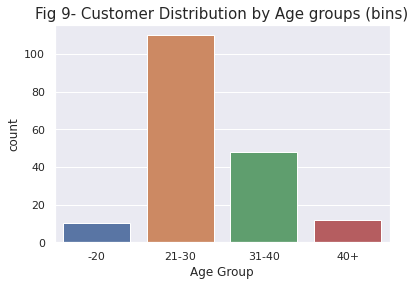

In [27]:
#Plot distribution of customers by age group bins
plt.title("Fig "+str(fig_no)+"- Customer Distribution by Age groups (bins)",fontsize=15)
sns.countplot(data=cardiodata_df, x = "Age_bins")
plt.xlabel("Age Group")
plt.show()
fig_no+=1

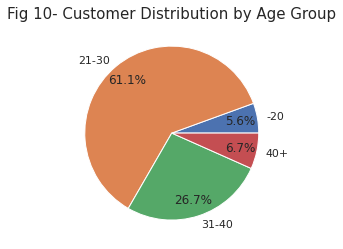

In [28]:
#plot a pie to visualize the % per age group
count_age_bins = cardiodata_df['Age_bins'].value_counts().sort_index(ascending=True)
plt.pie(data=cardiodata_df, x = count_age_bins, autopct="%.1f%%", labels = label_age_bins, pctdistance=0.8)
plt.title("Fig "+str(fig_no)+"- Customer Distribution by Age Group",fontsize=15)
plt.show()
fig_no+=1

In [45]:
#How many customers are younger than 30 years 
customers_younger_30 = len(cardiodata_df[cardiodata_df['Age']<30])
print("There are ",customers_younger_30," customers younger than 30 years.")
#what is the percentage of customers younger than 30?
percentage_ageless30 = customers_younger_30*100/len(cardiodata_df.index)
print("%.2f" % percentage_ageless30 + "% of customers are younger than 30.")

There are  113  customers younger than 30 years.
62.78% of customers are younger than 30.


- Most customers are under 30. 
- The largest age group is 21-30.


##3.3 Gender (All Treadmill Models)

Good Cardio Fitness does not identify customers by more progressive genders.

In [44]:
#How many customers are identified in each gender
customer_gender_qty = cardiodata_df['Gender'].value_counts()
print("Cardio Good Fitness Customers Gender:")
print("Gender  #Cust")
print("------- -----")
print(customer_gender_qty)

Cardio Good Fitness Customers Gender:
Gender  #Cust
------- -----
Male      104
Female     76
Name: Gender, dtype: int64


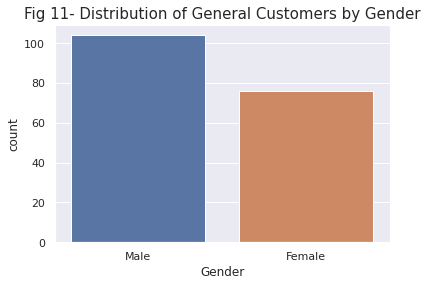

In [32]:
#Customer gender distribution
plt.title("Fig "+str(fig_no)+"- Distribution of General Customers by Gender",fontsize=15)
sns.countplot(data=cardiodata_df,x="Gender")
plt.show()
fig_no+=1

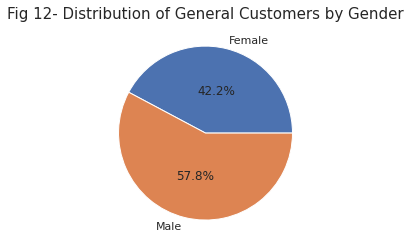

In [33]:
#Customer Gender Distribution 
count_gender = cardiodata_df['Gender'].value_counts().sort_index(ascending=True)
label_gender = cardiodata_df['Gender'].sort_values(ascending=True).unique()
plt.pie(data = cardiodata_df,x=count_gender, autopct="%.1f%%",labels=label_gender, pctdistance=0.5)
gender_dist_title = "Distribution of General Customers by Gender"
plt.title("Fig "+str(fig_no)+"- "+ gender_dist_title,fontsize=15)
plt.show()
fig_no+=1

- There are more male customers than female customers. 58% of customers are male.
- Good Cardio Fitness only consider Male and Female Genders.

##3.4 Education (All Treadmill Models)

In [42]:
#Number of unique Education levels
customer_education_unique = cardiodata_df['Education'].nunique()
print("Number of Education Levels:" ,customer_education_unique)

#How many customers are in each education level as categorized by years of education?
educationcount_df = cardiodata_df['Education'].value_counts()
print("Lvl #Cust")
print("--- -----")
print(educationcount_df)


Number of Education Levels: 8
Lvl #Cust
--- -----
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64


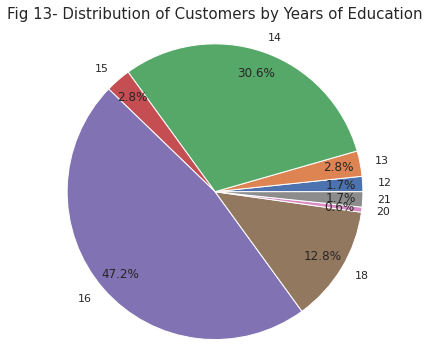

In [37]:
#Analysis of Customers by Years of Education, pie chart
#fig_no=13
count_education_years = cardiodata_df['Education'].value_counts().sort_index(ascending=True)
label_education_years = cardiodata_df['Education'].sort_values(ascending=True).unique()
plt.title("Fig "+str(fig_no)+"- Distribution of Customers by Years of Education",fontsize=15, pad=64)
plt.pie(data = cardiodata_df,x=count_education_years, autopct="%.1f%%",labels=label_education_years, pctdistance=0.85, radius=1.7)

plt.show()
fig_no+=1

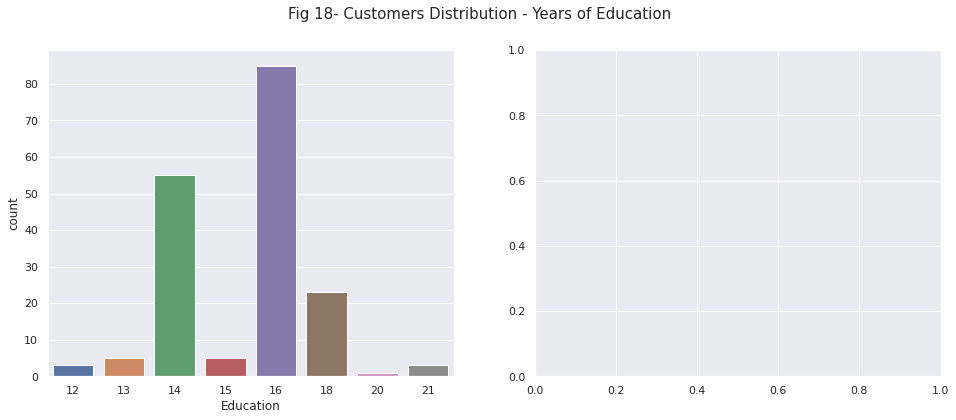

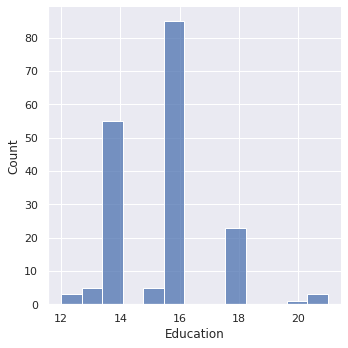

In [50]:
#Visualization, Countplot and displot Years of Education distribution
#fig_no=14
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
fig.suptitle("Fig "+str(fig_no)+"- Customers Distribution - Years of Education",fontsize=15)

sns.countplot(data=cardiodata_df, x = "Education",ax=ax1)
#plt.title("countplot", pad=1)
#sns.displot(data=cardiodata_df, x = "Education", kind = 'kde', height=4, aspect=1.4,ax=ax2)
sns.displot(data=cardiodata_df, x = "Education", ax=ax2)

#plt.title("displot")
#plt.show()
fig_no+=1

Creating bins for Education
- 0  < Education <= 12 :High School
- 12 <Education <= 14 :Associate
- 14 < Education <= 17 :College
- 17 <Education <= 19 :Masters
- 19 <Education :PhD

In [ ]:
#create the labels for the bins
label_education_bins=['High School','Associate','College','Masters','PhD']
print(label_education_bins)

['High School', 'Associate', 'College', 'Masters', 'PhD']


In [ ]:
#store in dataframe
cardiodata_df['Education_bins'] = pd.cut(cardiodata_df['Education'],bins=[0,12,14,17,19,24],labels=label_education_bins,right=True)

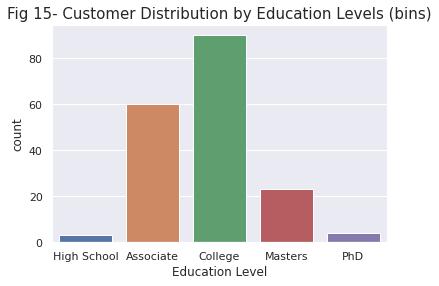

In [ ]:
#creare countplot to visualize Education label bins
plt.title("Fig "+str(fig_no)+"- Customer Distribution by Education Levels (bins)",fontsize=15)
sns.countplot(data=cardiodata_df, x = "Education_bins")
plt.xlabel("Education Level")
plt.show()
fig_no+=1

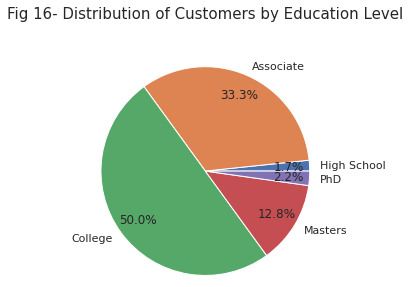

In [ ]:
#create pie chart to visualize education distribution
#fig_no=16
count_education_bins = cardiodata_df['Education_bins'].value_counts().sort_index(ascending=True)
plt.pie(data = cardiodata_df, x=count_education_bins, autopct="%.1f%%", labels = label_education_bins, pctdistance=0.8, radius=1.2)
plt.title("Fig "+str(fig_no)+"- Distribution of Customers by Education Level",fontsize=15, pad=44)
plt.show()
fig_no+=1

In [ ]:
#How many customers have at least some kind of college education 
count_education_college= cardiodata_df[cardiodata_df['Education']>12].value_counts()
print("Most customers have some kind of college education: "+ str(len(count_education_college)) + " out of "+ str(len(cardiodata_df.index)))

Most customers have some kind of college education: 177 out of 180


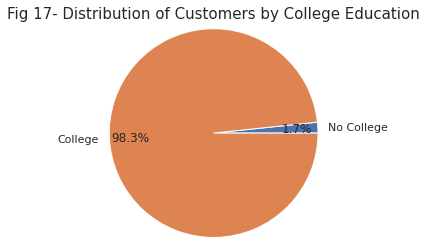

In [ ]:
#pie chart for college vs no college customers
#fig_no=17
#create bin
label_college_bins=['No College','College']

#store college_bins in dataframe
cardiodata_df['college_bins'] = pd.cut(cardiodata_df['Education'],bins=[0,12,cardiodata_df['Education'].max()+1],labels=label_college_bins,right=True)
count_college_bins = cardiodata_df['college_bins'].value_counts().sort_index(ascending=True)

#create pie
plt.pie(data = cardiodata_df, x=count_college_bins, autopct="%.1f%%", labels = label_college_bins, pctdistance=0.8, radius=1.2)
plt.title("Fig "+str(fig_no)+"- Distribution of Customers by College Education",fontsize=15)
plt.show()
fig_no+=1

- There are a few customers with a PhD.
- Very few customers have only a High School Diploma.
- 50% of customers have a college degree
- Good Cardio Fitness customers are highly educated: 98.3% have some kind of college education.

##3.5 Marital Status (All Treadmill Models)

In [ ]:
#What kind of marital status are there?
customer_maritalstatus_list =cardiodata_df['MaritalStatus'].unique()
print("Cardio Good Fitness Customers' Marital Status are: ")
print("Marital Status")
print("-"*14)
for x in customer_maritalstatus_list:
  print(x)

Cardio Good Fitness Customers' Marital Status are: 
Marital Status
--------------
Single
Partnered


In [ ]:
#How many customers in each marital status
customer_maritalstatus_qty = cardiodata_df['MaritalStatus'].value_counts()
print("Cardio Good Fitness Customers Gender:")
print("MaritalStat No.Cust")
print("-"*20)
print(customer_maritalstatus_qty)

Cardio Good Fitness Customers Gender:
MaritalStat No.Cust
--------------------
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


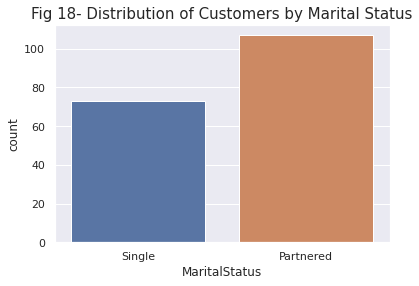

In [ ]:
#Marital Status distribution countplot 
sns.countplot(data=cardiodata_df,x="MaritalStatus")
plt.title("Fig "+str(fig_no)+"- Distribution of Customers by Marital Status",fontsize=15)
plt.show()
fig_no+=1

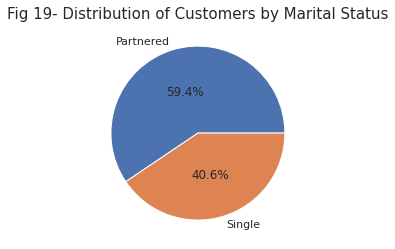

In [ ]:
#Analysis of Customers by Marital Status, create a pie chart
count_maritalstatus = cardiodata_df['MaritalStatus'].value_counts().sort_index(ascending=True)
label_maritalstatus = cardiodata_df['MaritalStatus'].sort_values(ascending=True).unique()
plt.pie(data = cardiodata_df,x=count_maritalstatus, autopct="%.1f%%",labels=label_maritalstatus, pctdistance=0.5)
plt.title("Fig "+str(fig_no)+"- Distribution of Customers by Marital Status",fontsize=15)
plt.show()
fig_no+=1

- Most customers have a partner:  59% of customers have a partner.

##3.6 Usage (All Treadmill Models)

In [ ]:
cardiodata_df['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

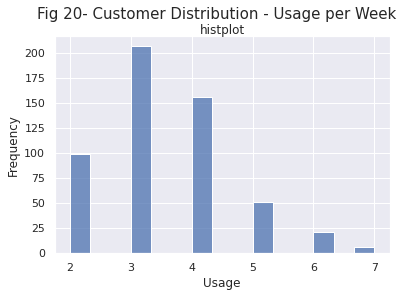

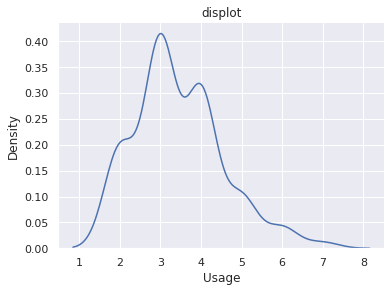

In [ ]:
#Usage Distribution - histplot and displot
#fig_no=20
sns.histplot(data=cardiodata_df, x = "Usage", stat="frequency")
plt.suptitle("Fig "+str(fig_no)+"- Customer Distribution - Usage per Week", fontsize=15)
plt.title("histplot", pad=2)
plt.show()
sns.displot(data=cardiodata_df, x = "Usage", kind = 'kde', height=4, aspect=1.4)
plt.title("displot")
plt.show()
fig_no+=1

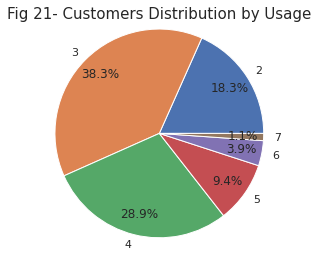

In [ ]:
#Analysis of Customers by Usage - pie chart
#fig_no=21
count_usage = cardiodata_df['Usage'].value_counts().sort_index(ascending=True)
label_usage = cardiodata_df['Usage'].sort_values(ascending=True).unique()
plt.pie(data = cardiodata_df,x=count_usage, autopct="%.1f%%",labels=label_usage, pctdistance=0.8, radius=1.2)
plt.title("Fig "+str(fig_no)+"- Customers Distribution by Usage",fontsize=15)
plt.show()
fig_no+=1

- Most customers will use the treadmill betwen 3 and 4 times per week

##3.7 Fitness (All Treadmill Models)

In [ ]:
#this time we will make the title a variable
title_fitness_degree_dist = "Customer Distribution by Degree of Fitness" 

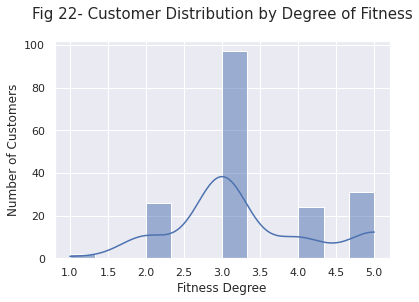

In [ ]:
#Fitness Distribution visualization histplot with kde
#fig_no=22
sns.set(style='darkgrid')
sns.histplot(data=cardiodata_df, x = "Fitness", kde=True)#.set(title = title_fitness_degree_dist)
plt.xlabel("Fitness Degree")
plt.ylabel("Number of Customers")
plt.title("Fig "+str(fig_no)+"- "+title_fitness_degree_dist, fontsize=15, pad=22)
plt.show()
fig_no+=1


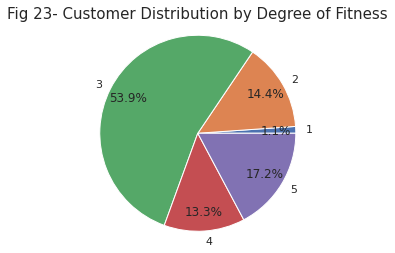

In [ ]:
#visualize data as pie chart
#fig_no=23
count_fitness_degree = cardiodata_df['Fitness'].value_counts().sort_index(ascending=True)  #sort the index always alphabetically
label_fitness_degree = cardiodata_df['Fitness'].sort_values(ascending=True).unique()  #sort the labels alphabetically 
plt.title("Fig "+str(fig_no)+"- "+title_fitness_degree_dist, fontsize=15)

plt.pie(data=cardiodata_df,x=count_fitness_degree,autopct="%.1f%%", labels = label_fitness_degree, pctdistance=0.8)
plt.axis('equal') #to ensure that pie is drawn as a circle
plt.show()
fig_no+=1

In [ ]:
#Creating Bins for Degrees of Fitness 
#5 : Very Fit
#4 : Fit
#3 : Average
#2 : Unfit
#1 : Very unfit

In [ ]:
#label bins
label_fitness_bins=['Very Fit','Fit','Average','Unfit','Very Unfit']
print(label_fitness_bins)

['Very Fit', 'Fit', 'Average', 'Unfit', 'Very Unfit']


In [ ]:
#store bins in dataframe
cardiodata_df['Fitness_bins'] = pd.cut(cardiodata_df['Fitness'],bins=[0,1,2,3,4,5],labels=label_fitness_bins,right=True)

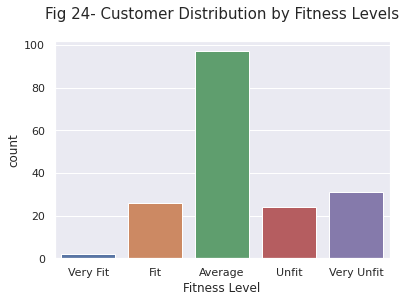

In [ ]:
#visualization Fitness - countplot
#fig_no= 24
plt.title("Fig "+str(fig_no)+"- Customer Distribution by Fitness Levels", fontsize=15, pad=22)
sns.countplot(data=cardiodata_df, x = "Fitness_bins")
plt.xlabel("Fitness Level")
plt.show()
fig_no+=1

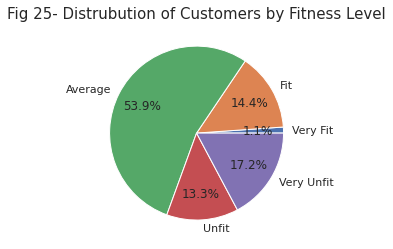

In [ ]:
#Visualize fitness level in a pie
#fig_no = 25
count_fitness_level = cardiodata_df['Fitness'].value_counts().sort_index(ascending=True)
plt.pie(data=cardiodata_df,x=count_fitness_level,autopct="%.1f%%", labels = label_fitness_bins, pctdistance=0.7)
plt.title("Fig "+str(fig_no)+"- Distrubution of Customers by Fitness Level",fontsize=15)
plt.show()
fig_no+=1

- More than half of the customers are Fit average or better.
- 30.5% of customers are Unfit/Very Unfit
- 1.1% are very fit

##3.8 Income (All Treadmill Models)

In [ ]:
#What are the different incomes customers report?
cardiodata_df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [ ]:
#number of unique income levels
cardiodata_df['Income'].nunique()

62

In [ ]:
#How many customers make at least 100,000/year?
cardiodata_df.loc[cardiodata_df['Income']>100000]

Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
168   TM798   30   Male         18     Partnered      5        4  103336   
174   TM798   38   Male         18     Partnered      5        5  104581   
178   TM798   47   Male         18     Partnered      4        5  104581   

     Miles Age_bins Education_bins college_bins Fitness_bins  
168    160    21-30        Masters      College        Unfit  
174    150    31-40        Masters      College   Very Unfit  
178    120      40+        Masters      College   Very Unfit

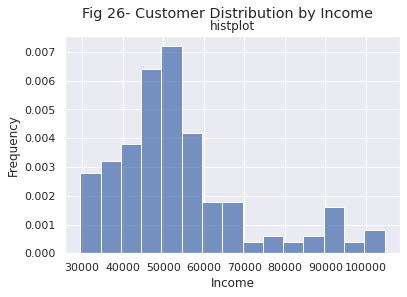

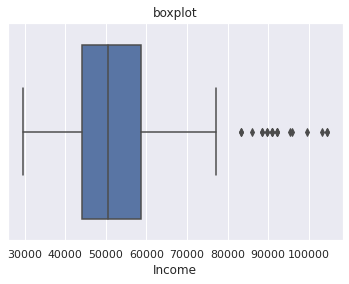

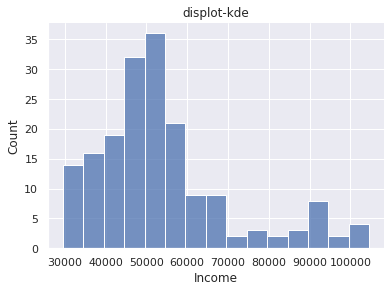

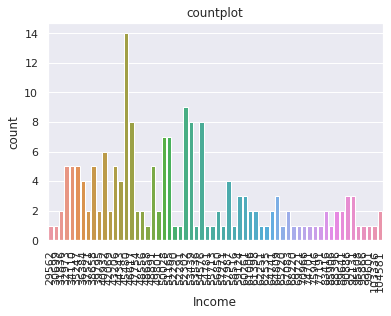

In [ ]:
#income distribution - visualization
#fig_no = 26
plt.suptitle("Fig "+str(fig_no)+"- Customer Distribution by Income")

plt.title("histplot")
sns.histplot(data=cardiodata_df, x = "Income", stat="frequency")
plt.show()

plt.title("boxplot")
sns.boxplot(data=cardiodata_df, x = "Income")
plt.show()

sns.displot(data=cardiodata_df, x= "Income", height=4, aspect=1.4)
plt.title("displot-kde")
plt.show()

plt.title("countplot")
sns.countplot(data=cardiodata_df, x = "Income")
plt.xticks(rotation=90)
plt.show()

fig_no+=1

In [ ]:
#Lets group the incomes as:
#up to 30,000 : -30K
#from 30k - 50k : 30-50K
#from 60K - 80K : 50-80K
#from 80k - 100K : 80-100K
#more than 100K : +100K

In [ ]:
label_income_bins=['-30K','30-50K','50-80K','80-100K','+100K']
print(label_income_bins)

['-30K', '30-50K', '50-80K', '80-100K', '+100K']


In [ ]:
cardiodata_df['Income_bins'] = pd.cut(cardiodata_df['Income'],bins=[cardiodata_df['Income'].min(),30000,50000,80000,100000,cardiodata_df['Income'].max()],labels=label_income_bins,right=True)

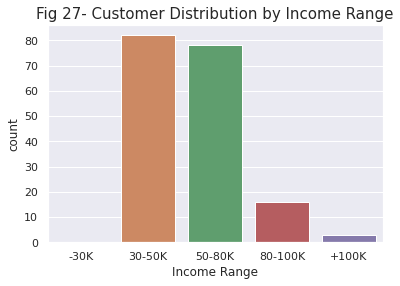

In [ ]:
#visualization - countplot
#fig_no = 27
plt.title("Fig "+str(fig_no)+"- Customer Distribution by Income Range", fontsize=15)
sns.countplot(data=cardiodata_df, x = "Income_bins")
plt.xlabel("Income Range")
plt.show()
fig_no+=1

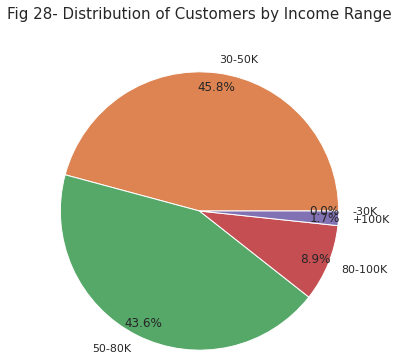

In [ ]:
#Visualization - pie chart %
#fig_no = 28
count_income_bins = cardiodata_df['Income_bins'].value_counts().sort_index(ascending=True)
plt.pie(data=cardiodata_df,x=count_income_bins,autopct="%.1f%%", labels = label_income_bins, pctdistance=0.9, radius=1.6)
plt.title("Fig "+str(fig_no)+"- Distribution of Customers by Income Range",fontsize=15, pad=84)
plt.show()
fig_no+=1

- Most customers have middle class and low middle class incomes.
- More than 85% of customers earn between 30 to 80K/year.
- Nobody earns less than 30K/year.

##3.9 Miles (All Treadmill models)

In [ ]:
#How many different miles customers claim to run
cardiodata_df['Miles'].nunique()

37

In [ ]:
#How about we just calculate the mode
cardiodata_df['Miles'].mode()

0    85
dtype: int64

In [ ]:
#List the unique number of miles customers intend to run
#Are these miles per week, month, or lifetime of the treadmill?
customer_miles = cardiodata_df['Miles'].unique()
print(customer_miles)

[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


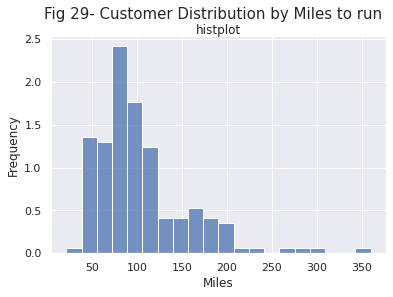

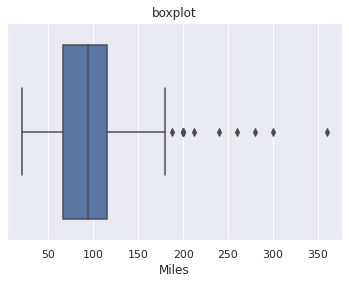

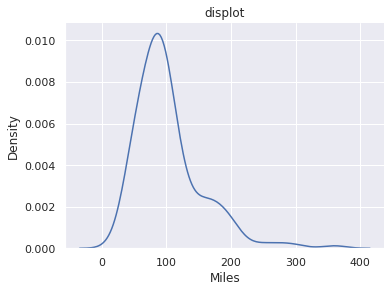

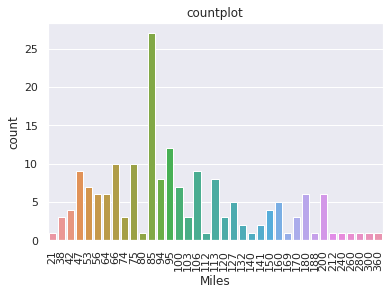

In [ ]:
#Visualization Miles Distribution plots
#fig_no = 29

sns.histplot(data=cardiodata_df, x = "Miles", stat="frequency")
plt.suptitle("Fig "+str(fig_no)+"- Customer Distribution by Miles to run", fontsize=15)
plt.title("histplot", pad=2)
plt.show()

sns.boxplot(data=cardiodata_df, x = "Miles")
plt.title("boxplot")
plt.show()

sns.displot(data=cardiodata_df,x = "Miles", kind='kde',height=4, aspect=1.4)
plt.title("displot")
plt.show()

sns.countplot(data=cardiodata_df, x = "Miles")
plt.title("countplot")
plt.xticks(rotation=90)
plt.show()

fig_no+=1

The feature Miles are the number of miles that customers intend to use their treadmills. However, it is not clear if these are miles per day, week, month, or for the lifetime of the treadmill.

According to Mark Sains, who has run 80+ mile training weeks for marathons (https://qr.ae/pvlOBc), roughly, the peak weekly mileage for marathon runners will tend to be about:


- 90–120 miles for elites
- 70–100 miles for fast club runners
- 40–70 miles for club runners
- 30–50 miles for one-off marathon runners

Lets try to find out.

In [ ]:
#Data from Mark Sains
EliteMilesWeekLow = 90
EliteMilesWeekHigh = 120
FastClubRunnersWeekLow = 70
FastClubRunnersWeekHigh = 100
ClubRunnersWeekLow = 40
ClubRunnersWeekHigh = 70
OneTimeMarathonWeekLow = 30
OneTimeMarathonWeekHigh = 50

#How many customers pretend to run a particular amount of miles?
MaxMiles = cardiodata_df['Miles'].max()
print("Maximum Declared number of miles: ", MaxMiles)
MinMiles = cardiodata_df['Miles'].min()
print("Minimum Declared number of miles: ", MinMiles)
AverageMiles = cardiodata_df['Miles'].median()
print("Median Declared number of miles: ", AverageMiles)
ModeMiles = cardiodata_df['Miles'].mode()
print("Mode Declared number of miles: ", ModeMiles)


Maximum Declared number of miles:  360
Minimum Declared number of miles:  21
Median Declared number of miles:  94.0
Mode Declared number of miles:  0    85
dtype: int64


In [ ]:
#Could the declared number of miles be per day?
MilesWeekMax = MaxMiles*7
MilesWeekMin = MinMiles*7
MilesWeekAvg = AverageMiles*7
print("Miles Declared are per Day?")
print("-"*28)
print("Maximum/Week   miles %d" % MilesWeekMax)
print("Average/Week   miles %d" % MilesWeekAvg)
print("Minimum/Week   miles %d" % MilesWeekMin)
print("Number of miles run per Week")

if MilesWeekMax > EliteMilesWeekHigh :
  print("Miles declared are not per day. If per day, there would be a customer running %d miles per week!" % MilesWeekMax)
  print("That would mean that the customer will run "+ str(MilesWeekMax - EliteMilesWeekHigh) + " more miles than an Elite World Runner in a period of one week!\n")
else:
  print("Miles declared could be per day\n")

#Could the declared number of miles be per week?
MilesWeekMax = MaxMiles
MilesWeekMin = MinMiles
MilesWeekAvg = AverageMiles
print("Miles Declared are per Week?")
print("-"*28)
print("Maximum/Week   miles %d" % MilesWeekMax)
print("Average/Week   miles %d" % MilesWeekAvg)
print("Minimum/Week   miles %d" % MilesWeekMin)
print("Number of miles run per Week.")

if MilesWeekMax > EliteMilesWeekHigh :
  print("Miles declared are not per week. If per week, there would be a customer running %d miles per week!" % MilesWeekMax)
  print("That would mean that the customer will run "+ str(MilesWeekMax - EliteMilesWeekHigh) + " more miles than an Elite World Runner in a period of one week!\n")
else:
  print("Miles declared could be per week.\n")

#Could the declared number of miles be per month?
MilesWeekMax = MaxMiles/4.3
MilesWeekMin = MinMiles/4.3
MilesWeekAvg = AverageMiles/4.3
print("Miles Declared are per Month?")
print("-"*28)
print("Maximum/Week   miles %.2f" % MilesWeekMax)
print("Average/Week   miles %.2f" % MilesWeekAvg)
print("Minimum/Week   miles %.2f" % MilesWeekMin)
print("Number of miles run per Week.")

if MilesWeekMax > EliteMilesWeekHigh :
  print("Miles declared are not per month. If per month, there would be a customer running %.2f miles per week!" % MilesWeekMax)
  print("That would mean that the customer will run "+ str(MilesWeekMax - EliteMilesWeekHigh) + " more miles than an Elite World Runner in a period of one week!\n")
else:
  print("Miles declared could be per month.\n")

#Could the declared number of miles be per Year?
MilesWeekMax = MaxMiles/52
MilesWeekMin = MinMiles/52
MilesWeekAvg = AverageMiles/52
print("Miles Declared are per Year?")
print("-"*28)
print("Maximum/Week   miles %.2f" % MilesWeekMax)
print("Average/Week   miles %.2f" % MilesWeekAvg)
print("Minimum/Week   miles %.2f" % MilesWeekMin)
print("Number of miles run per Week.")

if MilesWeekMax > EliteMilesWeekHigh :
  print("Miles declared are not per Year. If per month, there would be a customer running %.2f miles per week!" % MilesWeekMax)
  print("That would mean that the customer will run "+ str(MilesWeekMax - EliteMilesWeekHigh) + " more miles than an Elite World Runner in a period of one week!\n")
else:
  print("Miles declared could be per Year.\n")

Miles Declared are per Day?
----------------------------
Maximum/Week   miles 2520
Average/Week   miles 658
Minimum/Week   miles 147
Number of miles run per Week
Miles declared are not per day. If per day, there would be a customer running 2520 miles per week!
That would mean that the customer will run 2400 more miles than an Elite World Runner in a period of one week!

Miles Declared are per Week?
----------------------------
Maximum/Week   miles 360
Average/Week   miles 94
Minimum/Week   miles 21
Number of miles run per Week.
Miles declared are not per week. If per week, there would be a customer running 360 miles per week!
That would mean that the customer will run 240 more miles than an Elite World Runner in a period of one week!

Miles Declared are per Month?
----------------------------
Maximum/Week   miles 83.72
Average/Week   miles 21.86
Minimum/Week   miles 4.88
Number of miles run per Week.
Miles declared could be per month.

Miles Declared are per Year?
---------------------

From the above analysis, we can conclude that the customers Miles are per month. 

We will implement bins for miles using Mark Sains categorization and add lower categories.

- 90–120 x 4.3 miles/month for elites
- 70–90 x 4.3 miles/month for fast club runners
- 50–70 x 4.3 miles/month for club runners
- 30–50 x 4.3 miles/month for one-off marathon runners
- 20-30 x 4.3 miles/month for determined
- 10-20 x 4.3 miles/month for intermediate 
- 5-10 x 4.3 miles/month for enthusiast
- 2.5-5 x 4.3 for beginners
- 0-2.5 x 4.3 miles for ultra beginners



In [ ]:
#bin labels
label_miles_bins=['Ultra Beginner', 'Beginner', 'Enthusiast', 'Intermediate', 'Determined', 'One-Off Marathon', 'Club', 'Fast Club', 'Elite']
print(label_miles_bins)


['Ultra Beginner', 'Beginner', 'Enthusiast', 'Intermediate', 'Determined', 'One-Off Marathon', 'Club', 'Fast Club', 'Elite']


In [ ]:
#store in dataframe
cardiodata_df['Miles_bins'] = pd.cut(cardiodata_df['Miles'],bins=[0, 2.5*4.3, 5*4.3, 10*4.3, 20*4.3, 30*4.3, 50*4.3, 70*4.3, 90*4.3,130*4.3],labels=label_miles_bins,right=True)

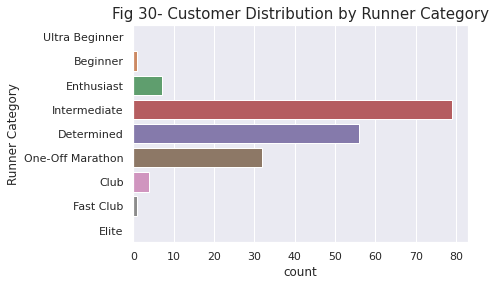

In [ ]:
#visualization Distribution of runner categories
#fig_no =30

plt.title("Fig "+str(fig_no)+"- Customer Distribution by Runner Category", fontsize=15)
sns.countplot(data=cardiodata_df, y = "Miles_bins")
plt.xlabel("count")
plt.ylabel("Runner Category")
plt.show()

fig_no+=1

In [ ]:
#How many customers in each category
cardiodata_df['Miles_bins'].value_counts()

Intermediate        79
Determined          56
One-Off Marathon    32
Enthusiast           7
Club                 4
Beginner             1
Fast Club            1
Ultra Beginner       0
Elite                0
Name: Miles_bins, dtype: int64

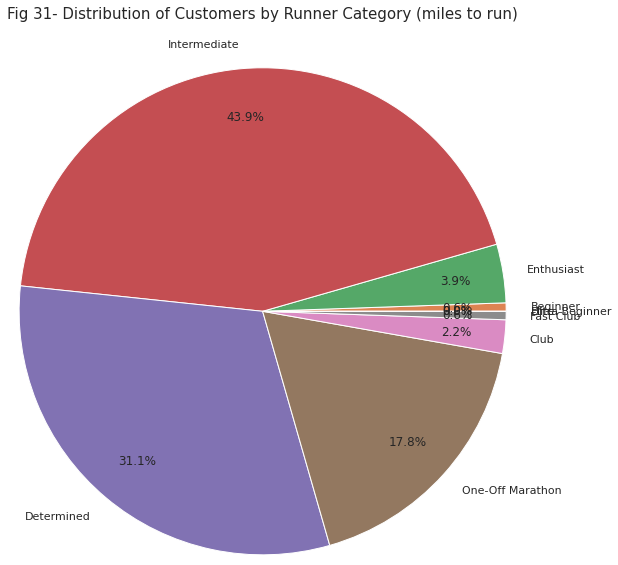

In [ ]:
#Visualization pie chart - Distribution of runners
#fig_no = 31

count_miles_bins = cardiodata_df['Miles_bins'].value_counts().sort_index(ascending=True)
plt.pie(data=cardiodata_df,x=count_miles_bins,autopct="%.1f%%", labels = label_miles_bins, pctdistance=0.8, radius=2.8)
plt.title("Fig "+str(fig_no)+"- Distribution of Customers by Runner Category (miles to run)",fontsize=15, pad=184)
plt.show()
fig_no+=1

- Most Customers (44%) fall into the category of "Intermediate" Level, those who run 10-20 miles per month.
- There is a large group (31%) of "determined" runners who intend to run 20-30 miles per month.
- About 18% of customers intend to run 30-50 miles per month, and are so called "one-time marathon runners".
- There is only 1 Fast Club runner.
- There is only 1 Ultra Beginning runner.
- There are no Elite runners.


##4 Bivariate Analysis


Lets start with a correlation analysis.

The first issue is that we have 3 features that are categorical values. Therefore we should convert them now to numerical.

Lets convert:
- Gender (Male = 0, Female = 1)
- MaritalStatus (Single = 0, Partnered = 1)
- Model (TM195=1, TM498 = 2, TM798= 3)


##4.1 Changing Categories into Numbers

In [ ]:
#copy the dataframe to another
cardiodata_ndf = cardiodata_df

#change categorical Gender to numerical
cardiodata_ndf['Gender'].replace(['Male','Female'],[0,1], inplace=True)

#change categorical MaritalStatus to numerical
cardiodata_ndf['MaritalStatus'].replace(['Single','Partnered'],[0,1], inplace=True)

#change categorical Product to numerical
cardiodata_ndf['Product'].replace(['TM195','TM498','TM798'],[0, 1, 2], inplace=True)

#lets see the datatypes now
cardiodata_ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Product         180 non-null    int64   
 1   Age             180 non-null    int64   
 2   Gender          180 non-null    int64   
 3   Education       180 non-null    int64   
 4   MaritalStatus   180 non-null    int64   
 5   Usage           180 non-null    int64   
 6   Fitness         180 non-null    int64   
 7   Income          180 non-null    int64   
 8   Miles           180 non-null    int64   
 9   Age_bins        180 non-null    category
 10  Education_bins  180 non-null    category
 11  college_bins    180 non-null    category
 12  Fitness_bins    180 non-null    category
 13  Income_bins     179 non-null    category
 14  Miles_bins      180 non-null    category
dtypes: category(6), int64(9)
memory usage: 15.1 KB


We can see that we changed features Product, Gender, and MaritalStatus to numerical.

In [ ]:
#lets run stat
cardiodata_ndf.describe().T

count      mean       std       min       25%       50%  \
Product       180.000     0.778     0.788     0.000     0.000     1.000   
Age           180.000    28.789     6.943    18.000    24.000    26.000   
Gender        180.000     0.422     0.495     0.000     0.000     0.000   
Education     180.000    15.572     1.617    12.000    14.000    16.000   
MaritalStatus 180.000     0.594     0.492     0.000     0.000     1.000   
Usage         180.000     3.456     1.085     2.000     3.000     3.000   
Fitness       180.000     3.311     0.959     1.000     3.000     3.000   
Income        180.000 53719.578 16506.684 29562.000 44058.750 50596.500   
Miles         180.000   103.194    51.864    21.000    66.000    94.000   

                    75%        max  
Product           1.000      2.000  
Age              33.000     50.000  
Gender            1.000      1.000  
Education        16.000     21.000  
MaritalStatus     1.000      1.000  
Usage             4.000      7.000  
Fitness           4.000      5.000  
Income        58668.000 104581.000  
Miles           114.750    360.000

Lets see a tail and a head

In [ ]:
cardiodata_ndf.head()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  \
0        0   18       0         14              0      3        4   29562   
1        0   19       0         15              0      2        3   31836   
2        0   19       1         14              1      4        3   30699   
3        0   19       0         12              0      3        3   32973   
4        0   20       0         13              1      4        2   35247   

   Miles Age_bins Education_bins college_bins Fitness_bins Income_bins  \
0    112      -20      Associate      College        Unfit         NaN   
1     75      -20        College      College      Average      30-50K   
2     66      -20      Associate      College      Average      30-50K   
3     85      -20    High School   No College      Average      30-50K   
4     47      -20      Associate      College          Fit      30-50K   

     Miles_bins  
0    Determined  
1  Intermediate  
2  Intermediate  
3  Intermediate  
4  Intermediate

In [ ]:
cardiodata_ndf.tail()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  \
175        2   40       0         21              0      6        5   83416   
176        2   42       0         18              0      5        4   89641   
177        2   45       0         16              0      5        5   90886   
178        2   47       0         18              1      4        5  104581   
179        2   48       0         18              1      4        5   95508   

     Miles Age_bins Education_bins college_bins Fitness_bins Income_bins  \
175    200    31-40            PhD      College   Very Unfit     80-100K   
176    200      40+        Masters      College        Unfit     80-100K   
177    160      40+        College      College   Very Unfit     80-100K   
178    120      40+        Masters      College   Very Unfit       +100K   
179    180      40+        Masters      College   Very Unfit     80-100K   

           Miles_bins  
175  One-Off Marathon  
176  One-Off Marathon  
177  One-Off Marathon  
178        Determined  
179  One-Off Marathon

Now lets run a correlation analysis

##4.2 Correlation Analysis

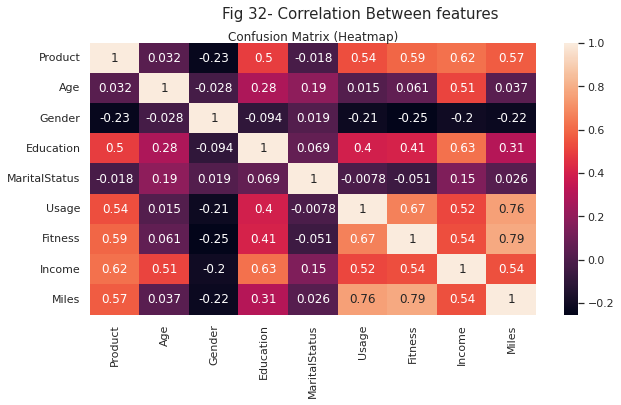

In [ ]:
#Bivariate analysis
#fig_no = 32
plt.figure(figsize = (10,5))
plt.suptitle("Fig "+str(fig_no)+ "- Correlation Between features", fontsize=15)

plt.title("Confusion Matrix (Heatmap)", pad=2)
sns.heatmap(cardiodata_ndf.corr(),annot=True)
plt.show()
fig_no+=1

From the Confucious matrix we can observe the following:

#High Correlation (+/- 1 - +/- 0.5) 

Product - Education (0.50)

Product - Usage (0.54)

Product - Fitness (0.59)

Product - Income (0.62)

Product - Miles (0.57)

Income - Age  (0.51)

Income - Education (0.63)

Income - Usage (0.52)

Income - Fitness (0.54)

Income - Miles (0.54)

Miles - Usage (0.76)

Miles - Fitness (0.79)

Fitness - Usage (0.67)


#Medium Correlation (+/-0.3 - +/-0.49)

Miles - Education (0.31)

Fitness - Education (0.41)

Usage - Education (0.4)


#Low Correlation (below +/- 0.29)

Miles - Age (0.037)

Fitness - Age (0.061)

Usage - Age (0.015)

Education - Age (0.28)

Product - Age (0.032)

Product - Gender (-0.23)

Product - MaritalStatus (-0.018)

MaritalStatus - Age (0.19)

MaritalStatus - Gender (0.019)

MaritalStatus - Education (0.069)

MaritalStatus - Usage (-0.0078)

MaritalStatus - Fitness (-0.051)

MaritalStatus - Income (0.15)

MaritalStatus - Miles (0.026)

Gender - Age (-0.028)

Gender - Education (-0.094)

Gender - MaritalStatus (0.019)

Gender - Usage (-0.21)

Gender - Fitness (-0.25)

Gender - Income (-0.2)

Gender - Miles (-0.22)

##4.2.1 Income vs Age

From the Heatmap we see that Income and age have a high Correlation of 0.51.

In [ ]:
cardiodata_ndf[['Age','Income']].corr()

Age  Income
Age    1.000   0.513
Income 0.513   1.000

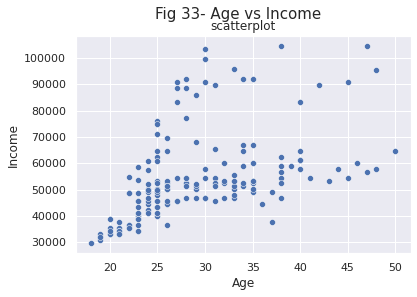

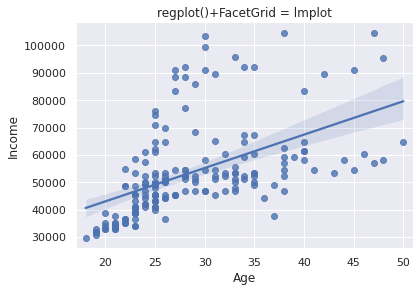

In [ ]:
#scatter plot and lmplot to graphically visualize correlation
#fig_no=33

sns.scatterplot(data = cardiodata_ndf, x = 'Age',y='Income')
plt.suptitle("Fig "+str(fig_no)+"- Age vs Income", fontsize=15)
plt.title("scatterplot")
plt.show()

sns.lmplot(data=cardiodata_ndf, x='Age',y="Income", height=4, aspect=1.5)
plt.title("regplot()+FacetGrid = lmplot")
plt.xlim(cardiodata_ndf['Age'].min()-1,cardiodata_ndf['Age'].max()+1)
plt.show()

fig_no+=1

We can see that Income and Age are highly correlated, that is, the older the customer, in general the higher the income.

##4.2.2 Income vs Education

From the heatmap we notice a high correlation of 0.626.

In [ ]:
cardiodata_ndf[['Education','Income']].corr()

Education  Income
Education      1.000   0.626
Income         0.626   1.000

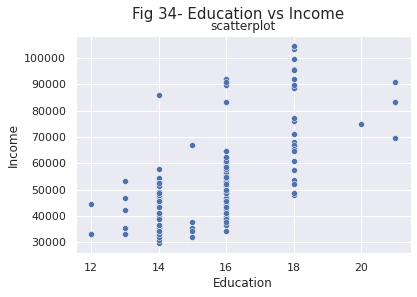

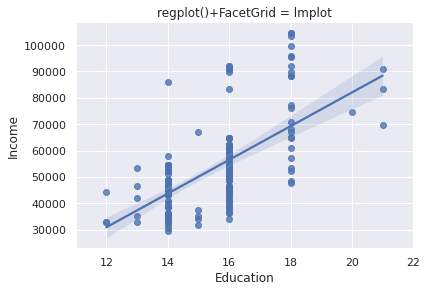

In [ ]:
#scatter plot and lmplot to graphically visualize correlation
#fig_no = 34
sns.scatterplot(data = cardiodata_ndf, x = 'Education',y='Income')
plt.suptitle("Fig "+ str(fig_no)+"- Education vs Income", fontsize = 15)
plt.title("scatterplot")
plt.show()

sns.lmplot(data=cardiodata_ndf, x='Education',y="Income", height=4, aspect=1.5)
plt.title("regplot()+FacetGrid = lmplot")
plt.xlim(cardiodata_ndf['Education'].min()-1,cardiodata_ndf['Education'].max()+1)
plt.show()

fig_no+=1

We can corroborate that Education and Income are higly related. That makes sense, people with more education would probably have a larger income than people with less education.

##4.2.3 Income vs Usage

From the Heatmap we see that Income and Usage have a high Correlation 0.52

In [ ]:
cardiodata_ndf[['Usage','Income']].corr()

Usage  Income
Usage   1.000   0.520
Income  0.520   1.000

In [ ]:
#common variables
maintitle = "Income vs Usage"
subtitle_scatter = "Scatter Plot"
subtitle_lmplot = "regplot()+FacetGrid = lmplot"

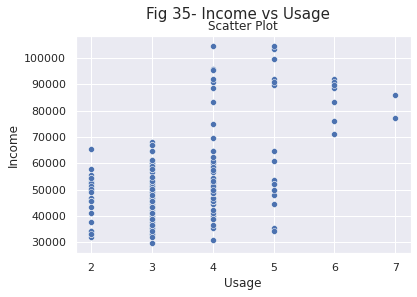

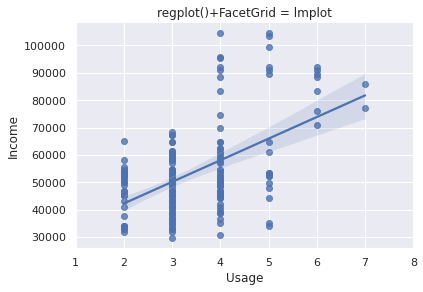

In [ ]:
#scatter plot and lmplot to graphically visualize correlation
#fig_no = 35

sns.scatterplot(data = cardiodata_ndf, x = 'Usage',y='Income')
plt.suptitle("Fig "+str(fig_no)+"- "+maintitle,fontsize=15)
plt.title(subtitle_scatter)
plt.show()

sns.lmplot(data=cardiodata_ndf, x='Usage',y="Income", height=4, aspect=1.5)
plt.title(subtitle_lmplot)
plt.xlim(cardiodata_df['Usage'].min()-1,cardiodata_ndf['Usage'].max()+1)
plt.show()

fig_no+=1

Income and Usage are highly correlated. That is probably because people with larger incomes can have more time to use the treadmill.

##4.2.4 Income vs Fitness

From the Heatmap we see that Income and Fitness have a high Correlation 0.54

In [ ]:
cardiodata_ndf[['Fitness','Income']].corr()

Fitness  Income
Fitness    1.000   0.535
Income     0.535   1.000

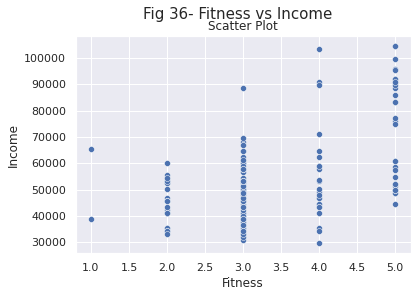

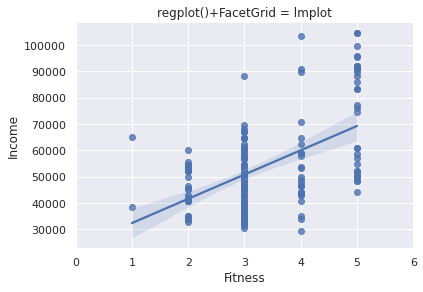

In [ ]:
#scatter plot and lmplot to graphically visualize correlation

maintitle = "Fitness vs Income"
#fig_no = 36

sns.scatterplot(data = cardiodata_ndf, x = 'Fitness',y='Income')
plt.suptitle("Fig "+str(fig_no)+"- "+ maintitle,fontsize=15)
plt.title(subtitle_scatter)
plt.show()

sns.lmplot(data=cardiodata_ndf, x='Fitness',y="Income", height=4, aspect=1.5)
plt.title(subtitle_lmplot)
plt.xlim(cardiodata_df['Fitness'].min()-1,cardiodata_ndf['Fitness'].max()+1)
plt.show()

fig_no +=1

People with larger incomes are more fit. Maybe because as we noticed earlier, people with larger incomes can use their treadmills more times than people with smaller incomes.

##4.2.5 Income vs Miles

From the Heatmap we see that Income and Miles have a high Correlation 0.54

In [ ]:
cardiodata_ndf[['Miles','Income']].corr()

Miles  Income
Miles   1.000   0.543
Income  0.543   1.000

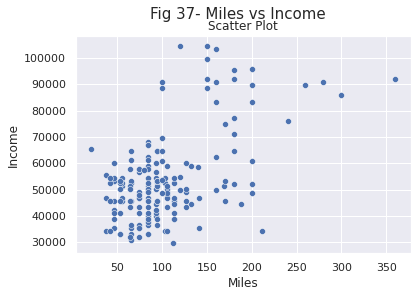

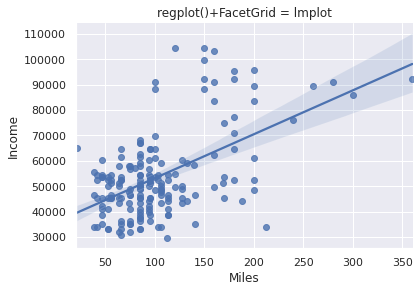

In [ ]:
#scatter plot and lmplot to graphically visualize correlation
maintitle = "Miles vs Income"
#fig_no = 37
sns.scatterplot(data = cardiodata_ndf, x = 'Miles',y='Income')
plt.suptitle("Fig "+str(fig_no)+"- "+maintitle,fontsize=15)
plt.title(subtitle_scatter)
plt.show()

sns.lmplot(data=cardiodata_ndf, x='Miles',y="Income", height=4, aspect=1.5)
plt.xlim(cardiodata_ndf['Miles'].min()-1,cardiodata_ndf['Miles'].max()+1)
plt.title(subtitle_lmplot)
plt.show()

Income and Miles are highly correlated. This shows that people with larger incomes generally run more miles. This may be because customers with larger incomes have more time to use their treadmills.

##4.2.6 Miles vs Usage

From the Heatmap we see that Miles and Usage have a high Correlation 0.76

In [ ]:
cardiodata_ndf[['Miles','Usage']].corr()

Miles  Usage
Miles  1.000  0.759
Usage  0.759  1.000

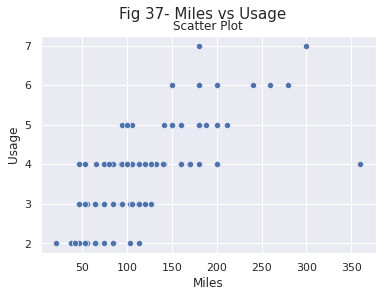

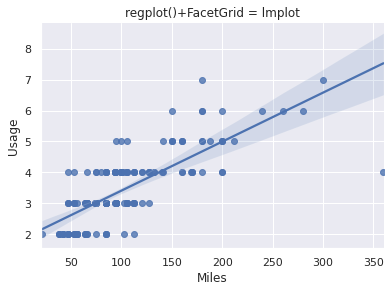

In [ ]:
#scatter plot and lmplot to graphically visualize correlation

maintitle = "Miles vs Usage"
#fig_no = 38

sns.scatterplot(data = cardiodata_ndf, x = 'Miles',y='Usage')
plt.suptitle("Fig "+str(fig_no)+"- "+maintitle,fontsize=15)
plt.title(subtitle_scatter)
plt.show()

sns.lmplot(data=cardiodata_ndf, x='Miles',y="Usage", height=4, aspect=1.4)
plt.xlim(cardiodata_ndf['Miles'].min()-1,cardiodata_ndf['Miles'].max()+1)
plt.title(subtitle_lmplot)
plt.show()

fig_no+=1

This shows that miles and usage are highly correlated. This is clear: the more times a customer uses a treadmill the more miles the customer will run.

##4.2.7 Miles vs Fitness

From the Heatmap we see that Miles and Fitness have a high Correlation 0.79

In [ ]:
cardiodata_ndf[['Miles','Fitness']].corr()

Miles  Fitness
Miles    1.000    0.786
Fitness  0.786    1.000

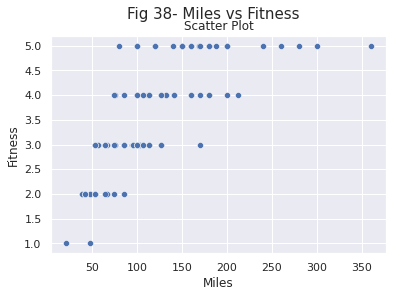

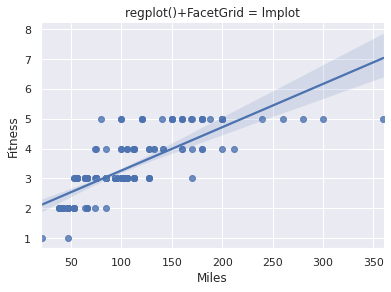

In [ ]:
#scatter plot and lmplot to graphically visualize correlation
maintitle = "Miles vs Fitness"
#fig_no = 39

sns.scatterplot(data = cardiodata_ndf, x = 'Miles',y='Fitness')
plt.suptitle("Fig "+ str(fig_no)+"- "+maintitle,fontsize=15)
plt.title(subtitle_scatter)
plt.show()

sns.lmplot(data=cardiodata_ndf, x='Miles',y="Fitness", height=4, aspect=1.4)
plt.xlim(cardiodata_ndf['Miles'].min()-1,cardiodata_ndf['Miles'].max()+1)
plt.title(subtitle_lmplot)
plt.show()

fig_no+=1

This one is also very clear. The more miles a customer runs the more fit he/she will be.

##4.2.8 Fitness vs Usage

From the Heatmap we see that Fitness and Usage have a high Correlation 0.67

In [ ]:
cardiodata_ndf[['Fitness','Usage']].corr()

Fitness  Usage
Fitness    1.000  0.669
Usage      0.669  1.000

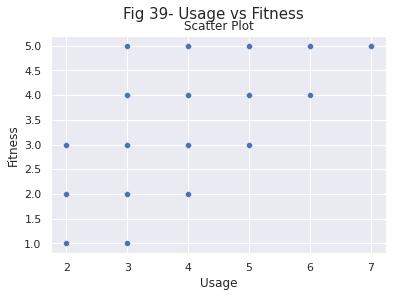

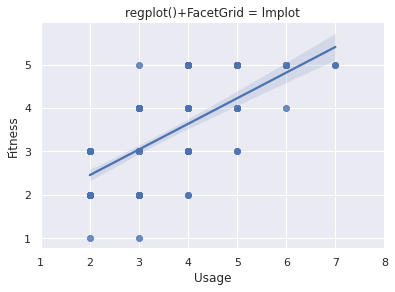

In [ ]:
#scatter plot and lmplot to graphically visualize correlation
maintitle = "Usage vs Fitness"
#fig_no = 40

sns.scatterplot(data = cardiodata_ndf, x = 'Usage',y='Fitness')
plt.suptitle("Fig "+str(fig_no)+"- "+maintitle,fontsize=15)
plt.title(subtitle_scatter)
plt.show()

sns.lmplot(data=cardiodata_ndf, x='Usage',y="Fitness", height=4, aspect=1.4)
plt.xlim(cardiodata_ndf['Usage'].min()-1,cardiodata_ndf['Usage'].max()+1)
plt.title(subtitle_lmplot)
plt.show()

fig_no+=1

This is very clear. The more times the treadmill will be used, the more fit the customer will be.

##4.2.9 Miles vs Education

From the Heatmap we see that Income and Usage have a moderate Correlation 0.31

In [ ]:
cardiodata_ndf[['Education','Miles']].corr()

Education  Miles
Education      1.000  0.307
Miles          0.307  1.000

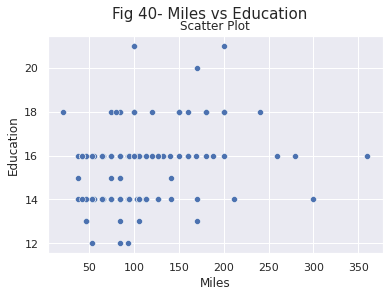

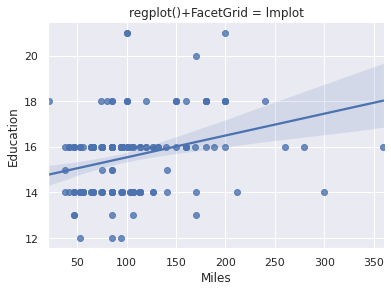

In [ ]:
#scatter plot and lmplot to graphically visualize correlation
maintitle = "Miles vs Education"
#fig_no = 41

sns.scatterplot(data = cardiodata_ndf, x = 'Miles',y='Education')
plt.suptitle("Fig "+str(fig_no)+"- "+maintitle,fontsize=15)
plt.title(subtitle_scatter)
plt.show()

sns.lmplot(data=cardiodata_ndf, x='Miles',y="Education", height=4, aspect=1.4)
plt.xlim(cardiodata_ndf['Miles'].min()-1,cardiodata_df['Miles'].max()+1)
plt.title(subtitle_lmplot)
plt.show()

fig_no+=1

This plot shows a moderate correlation. The more education a customer has, the more miles he/she will run. This is probably because a customer with more education will have a larger income than customers with less education, and have more time to use the treadmill which will result in more miles ran.

##4.2.10 Fitness vs Education

From the Heatmap we see that Education and Fitness have a moderate Correlation 0.41

In [ ]:
cardiodata_ndf[['Education','Fitness']].corr()

Education  Fitness
Education      1.000    0.411
Fitness        0.411    1.000

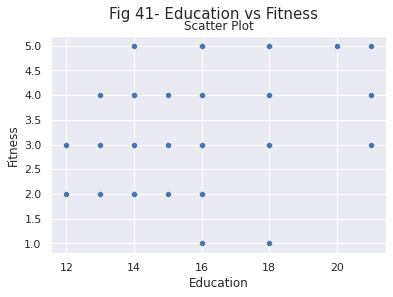

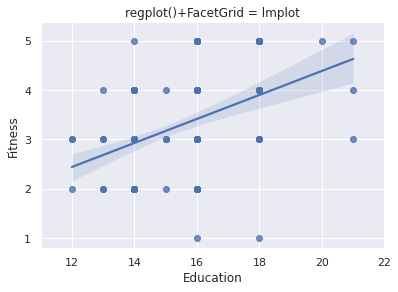

In [ ]:
#scatter plot and lmplot to graphically visualize correlation
maintitle = "Education vs Fitness"
#fig_no=42

sns.scatterplot(data = cardiodata_df, x = 'Education',y='Fitness')
plt.suptitle("Fig "+str(fig_no)+"- "+maintitle,fontsize=15)
plt.title(subtitle_scatter)
plt.show()

sns.lmplot(data=cardiodata_df, x='Education',y="Fitness", height=4, aspect=1.4)
plt.xlim(cardiodata_df['Education'].min()-1,cardiodata_df['Education'].max()+1)
plt.title(subtitle_lmplot)
plt.show()

fig_no+=1

This shows a medium correlation. Probably with more education a customer will have a higher income than with less education, thus having more time to use the treadmill resulting in more fitness. 

##4.2.11 Usage vs Education

From the heatmap we see a moderate correlation of 0.395.

In [ ]:
cardiodata_ndf[['Education','Usage']].corr()

Education  Usage
Education      1.000  0.395
Usage          0.395  1.000

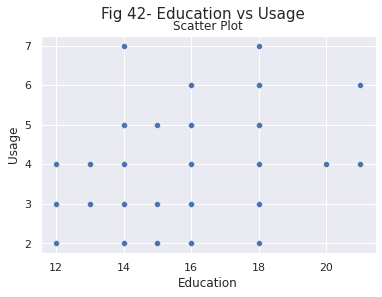

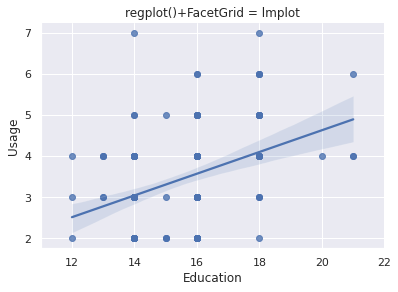

In [ ]:
#scatter plot and lmplot to graphically visualize correlation
maintitle = "Education vs Usage"
#fig_no = 43

sns.scatterplot(data = cardiodata_ndf, x = 'Education',y='Usage')
plt.suptitle("Fig "+str(fig_no)+"- "+maintitle,fontsize=15)
plt.title(subtitle_scatter)
plt.show()

sns.lmplot(data=cardiodata_ndf, x='Education',y="Usage", height=4, aspect=1.4)
plt.xlim(cardiodata_ndf['Education'].min()-1,cardiodata_ndf['Education'].max()+1)
plt.title(subtitle_lmplot)
plt.show()

fig_no+=1

Medium correlation that means that with more education, a customer can use the treadmill more times. This may be because with more education, a customer may have a higher income than with less education, resulting in being able to use the treadmill more times.

##4.2.12 Miles vs Age

From the heatmap we see a low correlation of 0.037 between Miles and Age.

In [ ]:
cardiodata_ndf[['Miles','Age']].corr()

Miles   Age
Miles  1.000 0.037
Age    0.037 1.000

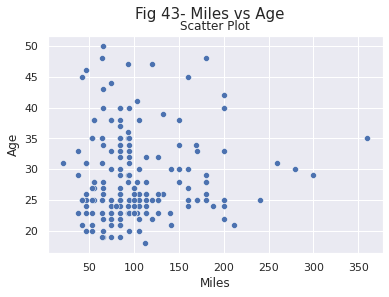

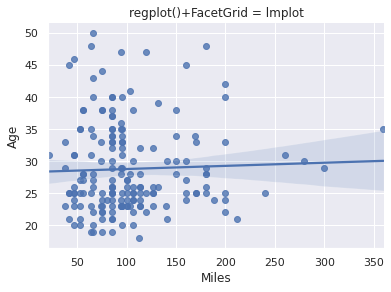

In [ ]:
#scatter plot and lmplot to graphically visualize correlation
maintitle = "Miles vs Age"
#fig_no = 44

sns.scatterplot(data = cardiodata_ndf, x = 'Miles',y='Age')
plt.suptitle("Fig "+str(fig_no)+"- "+maintitle,fontsize=15)
plt.title(subtitle_scatter)
plt.show()

sns.lmplot(data=cardiodata_ndf, x='Miles',y="Age", height=4, aspect=1.4)
plt.xlim(cardiodata_ndf['Miles'].min()-1,cardiodata_ndf['Miles'].max()+1)
plt.title(subtitle_lmplot)
plt.show()

fig_no+=1

Low correlation. Age doesn't seem to be determinant on the number of miles a customer intends to run.

##4.2.13 Fitness vs Age

The heatmap indicates a low correlation between Fitness and Age of 0.061

In [ ]:
#correlation between Age and Fitness
cardiodata_ndf[['Age','Fitness']].corr()

Age  Fitness
Age     1.000    0.061
Fitness 0.061    1.000

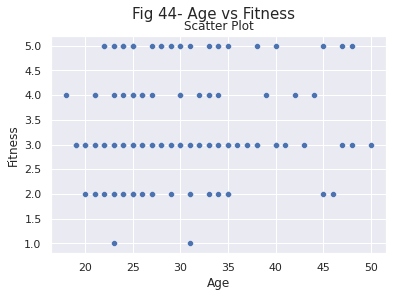

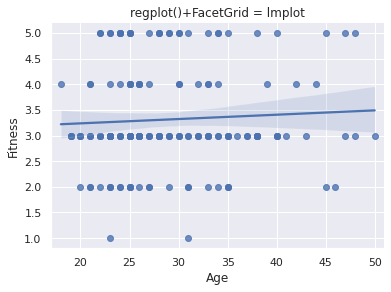

In [ ]:
#scatter plot and lmplot to graphically visualize correlation
maintitle = "Age vs Fitness"
#fig_no = 45

sns.scatterplot(data = cardiodata_ndf, x = 'Age',y='Fitness')
plt.suptitle("Fig "+str(fig_no)+"- "+maintitle,fontsize=15)
plt.title(subtitle_scatter)
plt.show()

sns.lmplot(data=cardiodata_ndf, x='Age',y="Fitness", height=4, aspect=1.4)
plt.title(subtitle_lmplot)
plt.xlim(15,50)
plt.xlim(cardiodata_ndf['Age'].min()-1,cardiodata_ndf['Age'].max()+1)
plt.show()

fig_no+=1

The plot shows a low correlation. The age is not determinant on the fitness of the customers.

##4.2.14 Usage vs Age

The heatmap shows low correlation between Usage and Age of 0.015.

In [ ]:
cardiodata_ndf[['Usage','Age']].corr()

Usage   Age
Usage  1.000 0.015
Age    0.015 1.000

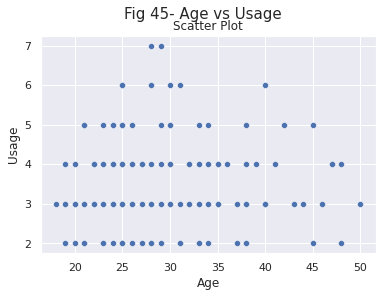

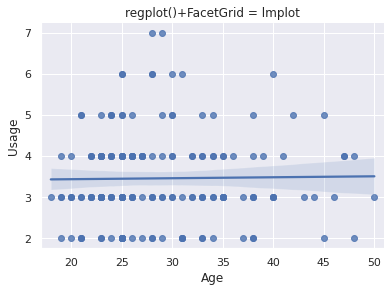

In [ ]:
#scatter plot and lmplot to graphically visualize correlation
maintitle = "Age vs Usage"
#fig_no = 46

sns.scatterplot(data = cardiodata_ndf, x = 'Age',y='Usage')
plt.suptitle("Fig "+str(fig_no)+"- "+maintitle,fontsize=15)
plt.title(subtitle_scatter)
plt.show()

sns.lmplot(data=cardiodata_ndf, x='Age',y="Usage", height=4, aspect=1.4)
plt.title(subtitle_lmplot)
plt.xlim(cardiodata_ndf['Age'].min()-1,cardiodata_ndf['Age'].max()+1)
plt.show()

fig_no+=1

The plot shows that there is no correlation (low correlation) between Age and Usage. That means that age is not a factor in the number of times a customer intends to use the treadmill.

##4.2.14 Education vs Age

From the heat map, the correlation is 0.28, Low (below +/- 0.29).
What we may expect to believe: older people have higher education levels.

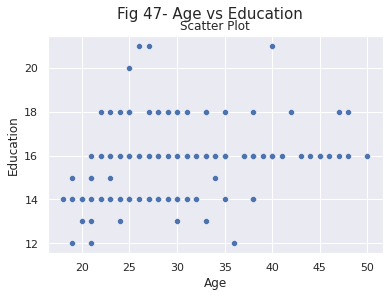

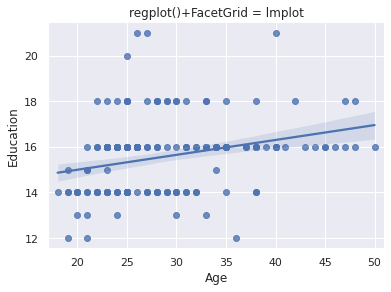

In [ ]:
#scatter plot and lmplot to graphically visualize correlation
maintitle = "Age vs Education"
fig_no = 47

sns.scatterplot(data = cardiodata_ndf, x = 'Age',y='Education')
plt.suptitle("Fig "+str(fig_no)+"- "+maintitle,fontsize=15)
plt.title(subtitle_scatter)
plt.show()

sns.lmplot(data=cardiodata_ndf, x='Age',y="Education", height=4, aspect=1.4)
plt.title(subtitle_lmplot)
plt.xlim(cardiodata_ndf['Age'].min()-1,cardiodata_ndf['Age'].max()+1)
plt.show()

fig_no+=1

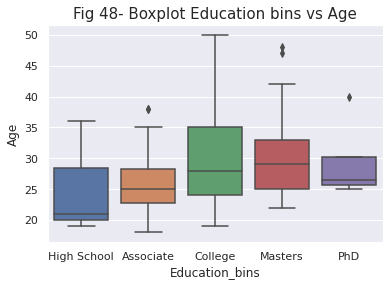

In [ ]:
#Visualize education bins vs age
#fig_no = 48

sns.boxplot(data=cardiodata_ndf, x='Education_bins',y="Age")
plt.title("Fig "+str(fig_no)+"- Boxplot Education bins vs Age",fontsize=15)
plt.show()
fig_no+=1

We cannot overwhelmingly conclude that older people have a higher education level. However, the outliers that represent older ages for higher degrees may point out that Masters and PhD degree holders are older than most other education level customers. However, considering the median values and distributions, we notice that the correlation may be indeed low.

##4.3 Products

##4.3.1 Models and Gender

In [ ]:
#lets see the correlation between Models and Gender
cardiodata_ndf[['Product','Gender']].corr()

Product  Gender
Product    1.000  -0.231
Gender    -0.231   1.000

Low Correlation between Product Model and Gender. 

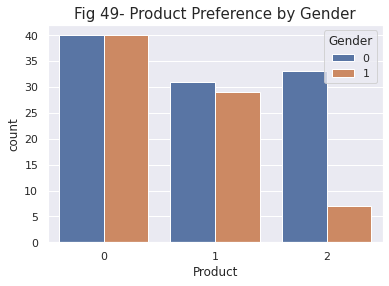

In [ ]:
#visualize all products vs gender in a countplot
#fig_no = 49
plt.title("Fig "+str(fig_no)+"- Product Preference by Gender", fontsize=15)
sns.countplot(data=cardiodata_df,x="Product", hue='Gender')
plt.show()
fig_no+=1

In [ ]:
#create dataframe to visualize products vs gender
product_gender = cardiodata_df.groupby(['Product','Gender']).count().unstack()

In [ ]:
#display Product vs gender (count)
product_gender_sing= product_gender['Age']
product_gender_sing

Gender    0   1
Product        
0        40  40
1        31  29
2        33   7

In [ ]:
#show Product vs Gender, separating Female and Male
product_gender_TM798 = product_gender_sing.iloc[2]
print(product_gender_TM798)

product_gender_TM498 = product_gender_sing.iloc[1]
print(product_gender_TM498)

product_gender_TM195 = product_gender_sing.iloc[0]
print(product_gender_TM195)

Gender
0    33
1     7
Name: 2, dtype: int64
Gender
0    31
1    29
Name: 1, dtype: int64
Gender
0    40
1    40
Name: 0, dtype: int64


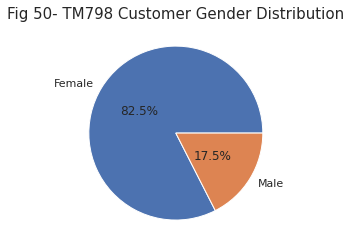

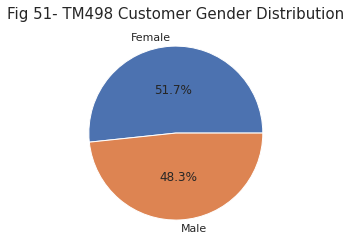

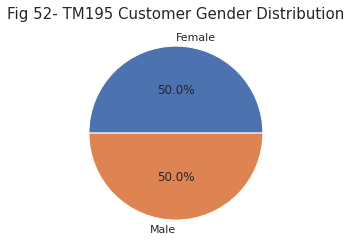

In [ ]:
#visualize gender distribution per model
#fig_no = 50

labels_gen = ['Female', 'Male']
plt.title("Fig "+str(fig_no)+"- TM798 Customer Gender Distribution", Fontsize = 15)
plt.pie(data=product_gender_sing,x=product_gender_TM798, autopct="%.1f%%",labels= labels_gen, pctdistance=0.5)
plt.show()
fig_no+=1

plt.title("Fig "+str(fig_no)+"- TM498 Customer Gender Distribution", Fontsize = 15)
plt.pie(data=product_gender_sing,x=product_gender_TM498, autopct="%.1f%%",labels= labels_gen, pctdistance=0.5)
plt.show()
fig_no+=1

plt.title("Fig "+str(fig_no)+"- TM195 Customer Gender Distribution", Fontsize = 15)
plt.pie(data=product_gender_sing,x=product_gender_TM195, autopct="%.1f%%",labels= labels_gen, pctdistance=0.5)
plt.show()

fig_no+=1

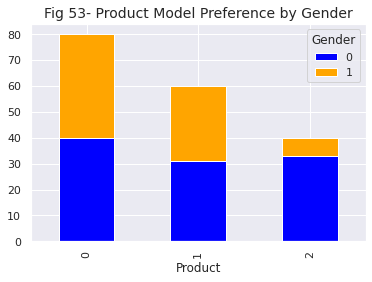

In [ ]:
#stacked plot gender per module
#fig_no = 53

product_gender_sing.plot(kind='bar',stacked=True, color=['blue','orange'])
plt.title("Fig "+str(fig_no)+"- Product Model Preference by Gender", fontsize = 14)
plt.show()

fig_no+=1

Model TM798 is highly preferred by Male customers.

Model TM195 is evenly preferred by Male and Female customers.

Model TM498 is slightly preferred by Male Customers.

##4.3.2 Models and Marital Status

In [ ]:
#Check correlation between Product Models and Marital Status
cardiodata_ndf[['Product','MaritalStatus']].corr()

Product  MaritalStatus
Product          1.000         -0.018
MaritalStatus   -0.018          1.000

Product Model and Marital Status have a low correlation.

In [ ]:
#group products by marital status and store in dataframe
product_maritalstatus = cardiodata_df.groupby(['Product','MaritalStatus']).count().unstack()


In [ ]:
#show whats in the dataframe
product_maritalstatus_sing= product_maritalstatus['Age']
product_maritalstatus_sing

MaritalStatus   0   1
Product              
0              32  48
1              24  36
2              17  23

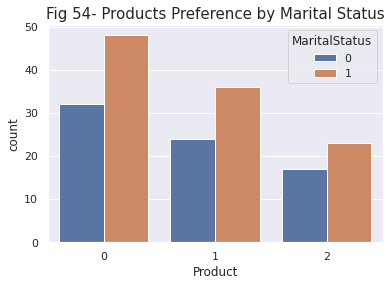

In [ ]:
#visual display in a counplot product preference by marital status
#fig_no = 54

plt.title("Fig "+str(fig_no)+"- Products Preference by Marital Status", fontsize=15)
sns.countplot(data=cardiodata_df,x="Product", hue='MaritalStatus')
plt.show()
fig_no+=1

In [ ]:
#count number of single and partnered customers per product preference
product_maritalstatus_TM798 = product_maritalstatus_sing.iloc[2]
print(product_gender_TM798)

product_maritalstatus_TM498 = product_maritalstatus_sing.iloc[1]
print(product_maritalstatus_TM498)

product_maritalstatus_TM195 = product_maritalstatus_sing.iloc[0]
print(product_maritalstatus_TM195)

Gender
0    33
1     7
Name: 2, dtype: int64
MaritalStatus
0    24
1    36
Name: 1, dtype: int64
MaritalStatus
0    32
1    48
Name: 0, dtype: int64


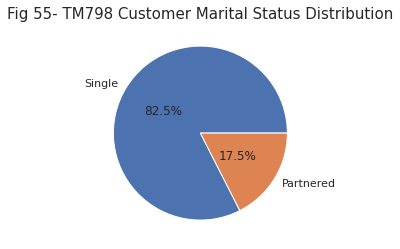

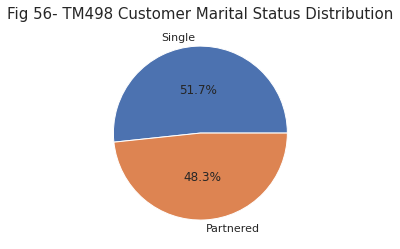

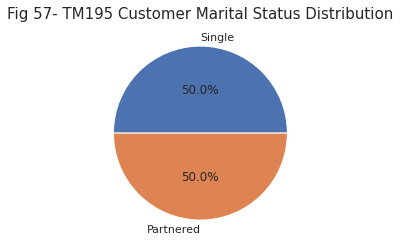

In [ ]:
#visual display distribution of prooduct prefeence by marital status
#fig_no = 55

labels_maritalstatus = ['Single', 'Partnered']
plt.title("Fig "+str(fig_no)+"- TM798 Customer Marital Status Distribution", Fontsize = 15)
plt.pie(data=product_maritalstatus_sing,x=product_gender_TM798, autopct="%.1f%%",labels= labels_maritalstatus, pctdistance=0.5)
plt.show()
fig_no+=1

plt.title("Fig "+str(fig_no)+"- TM498 Customer Marital Status Distribution", Fontsize = 15)
plt.pie(data=product_maritalstatus_sing,x=product_gender_TM498, autopct="%.1f%%",labels= labels_maritalstatus, pctdistance=0.5)
plt.show()
fig_no+=1

plt.title("Fig "+str(fig_no)+"- TM195 Customer Marital Status Distribution", Fontsize = 15)
plt.pie(data=product_maritalstatus_sing,x=product_gender_TM195, autopct="%.1f%%",labels= labels_maritalstatus, pctdistance=0.5)
plt.show()
fig_no+=1

TM798 is overwhelmingly preferred by partnered customers

TM498 is slightly preferred by partnered customers

TM195 is evenly preferred by partnered and single customers

##4.3.3 Models and Education

In [ ]:
#Check correlation between Product Models and Education
cardiodata_ndf[['Product','Education']].corr()

Product  Education
Product      1.000      0.495
Education    0.495      1.000

There is a high correlation between Product Model and Education.

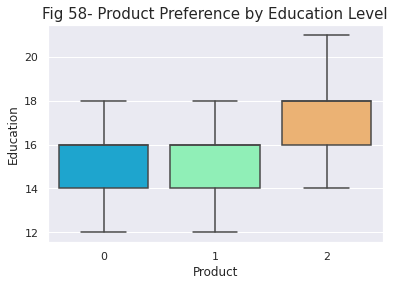

In [ ]:
#education vs product boxplot
#fig_no = 58
sns.boxplot(x='Product',y='Education',data=cardiodata_df,palette='rainbow')
plt.title("Fig "+str(fig_no)+"- Product Preference by Education Level", fontsize=15)
plt.show()
fig_no+=1

TM798 (Product 2) is preferred by customers with more education.

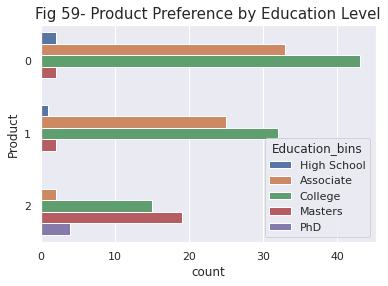

In [ ]:
#Product preference visualizatoon by Education bins
#fig_no = 59
plt.title("Fig "+str(fig_no)+"- Product Preference by Education Level", fontsize=15)
sns.countplot(data=cardiodata_df,y="Product",hue="Education_bins")
plt.show()
fig_no+=1

Customers of TM798 have higher education than customers that prefer other models

##4.3.4 Models and Fitness

In [ ]:
#correlation between model and fitness
cardiodata_ndf[['Product','Fitness']].corr()

Product  Fitness
Product    1.000    0.595
Fitness    0.595    1.000

There is a high Correlation between Product Model and Fitness.

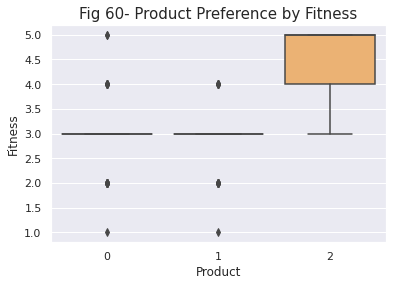

In [ ]:
#fitness vs product
#fig_no = 60
sns.boxplot(x='Product',y='Fitness',data=cardiodata_df,palette='rainbow')
plt.title("Fig "+str(fig_no)+"- Product Preference by Fitness", fontsize=15)
plt.show()
fig_no+=1

This plot actually means that Product 2 (TM798) customers are on the edge of Fitness (5.0 means in this case Very Unfit and Unfit). Product 1 (TM195) and Product 2 (TM498) are at 3.0 Fitness (Average).

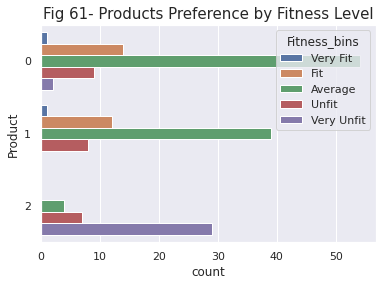

In [ ]:
#Product vs Fitness bins
#fig_no = 61
plt.title("Fig "+str(fig_no)+"- Products Preference by Fitness Level", fontsize=15)
sns.countplot(data=cardiodata_df,y = "Product", hue="Fitness_bins")

plt.show()
fig_no+=1

Customers that are very unfit prefer TM798
Customers that are average fit prefer TM195
Customers that are very fit prefer TM195

##4.3.5 Models and Age

In [ ]:
#correlation between model and age
cardiodata_ndf[['Product','Age']].corr()

Product   Age
Product    1.000 0.032
Age        0.032 1.000

Very Low Correlation

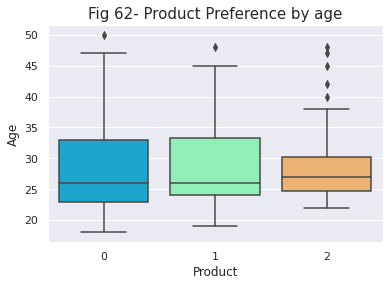

In [ ]:
#age vs product boxplot to see distribution
#fig_no = 62
sns.boxplot(x='Product',y='Age',data=cardiodata_df,palette='rainbow')
plt.title("Fig "+str(fig_no)+"- Product Preference by age",fontsize=15)
plt.show()
fig_no+=1

We may not be able to conclude much from the figure above. All products have very similar median ages.

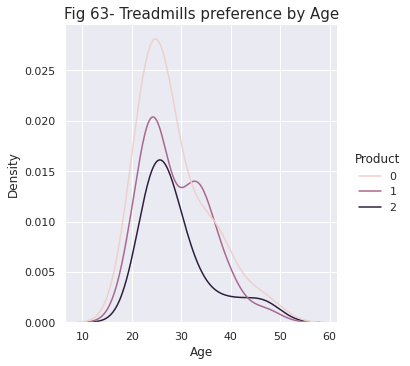

In [ ]:
#Trend of All Product preference by age
fig_no = 63
sns.displot(data=cardiodata_df, x = "Age", hue='Product', kind = 'kde')
plt.title("Fig "+str(fig_no)+"- Treadmills preference by Age", fontsize=15)
plt.show()
fig_no+=1

TM195 is preferred by customers of all ages over the other models.


##4.3.5 Models and Miles

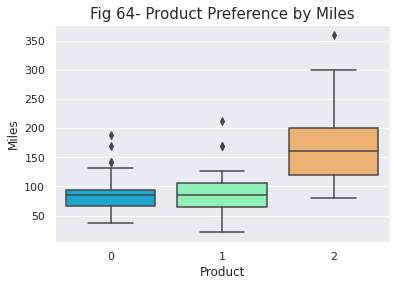

In [ ]:
#miles vs product
#fig_no = 64
sns.boxplot(x='Product',y='Miles',data=cardiodata_df,palette='rainbow')
plt.title("Fig "+str(fig_no)+"- Product Preference by Miles", fontsize=15)
plt.show()
fig_no+=1

Customers that say that they will run most Miles, prefer TM798.
Customers that say they will run less Miles, prefer TM195. 

##4.3.6 Models and Income

In [ ]:
#correlation between model and income
cardiodata_ndf[['Product','Income']].corr()

Product  Income
Product    1.000   0.624
Income     0.624   1.000

High Correlation between Product Model and Income.

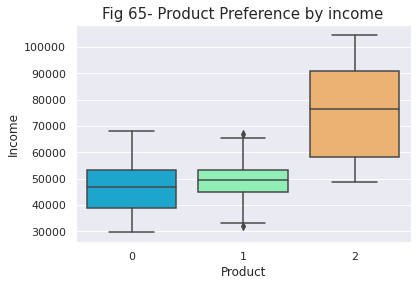

In [ ]:
#income vs product
#fig_no = 65
sns.boxplot(x='Product',y='Income',data=cardiodata_df,palette='rainbow')
plt.title("Fig "+str(fig_no)+"- Product Preference by income", fontsize=15)
plt.show()
fig_no+=1

Customers with higher incomes prefer TM798. Customers that have lower incomes prefer TM195.

In [ ]:
#list of customers that earn more than 80,000
cardiodata_df.loc[cardiodata_df['Income']>80000]

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  \
159        2   27       0         16              1      4        5   83416   
160        2   27       0         18              0      4        3   88396   
161        2   27       0         21              1      4        4   90886   
162        2   28       1         18              1      6        5   92131   
164        2   28       0         18              0      6        5   88396   
166        2   29       0         14              1      7        5   85906   
167        2   30       1         16              1      6        5   90886   
168        2   30       0         18              1      5        4  103336   
169        2   30       0         18              1      5        5   99601   
170        2   31       0         16              1      6        5   89641   
171        2   33       1         18              1      4        5   95866   
172        2   34       0         16              0      5        5   92131   
173        2   35       0         16              1      4        5   92131   
174        2   38       0         18              1      5        5  104581   
175        2   40       0         21              0      6        5   83416   
176        2   42       0         18              0      5        4   89641   
177        2   45       0         16              0      5        5   90886   
178        2   47       0         18              1      4        5  104581   
179        2   48       0         18              1      4        5   95508   

     Miles Age_bins Education_bins college_bins Fitness_bins Income_bins  \
159    160    21-30        College      College   Very Unfit     80-100K   
160    100    21-30        Masters      College      Average     80-100K   
161    100    21-30            PhD      College        Unfit     80-100K   
162    180    21-30        Masters      College   Very Unfit     80-100K   
164    150    21-30        Masters      College   Very Unfit     80-100K   
166    300    21-30      Associate      College   Very Unfit     80-100K   
167    280    21-30        College      College   Very Unfit     80-100K   
168    160    21-30        Masters      College        Unfit       +100K   
169    150    21-30        Masters      College   Very Unfit     80-100K   
170    260    31-40        College      College   Very Unfit     80-100K   
171    200    31-40        Masters      College   Very Unfit     80-100K   
172    150    31-40        College      College   Very Unfit     80-100K   
173    360    31-40        College      College   Very Unfit     80-100K   
174    150    31-40        Masters      College   Very Unfit       +100K   
175    200    31-40            PhD      College   Very Unfit     80-100K   
176    200      40+        Masters      College        Unfit     80-100K   
177    160      40+        College      College   Very Unfit     80-100K   
178    120      40+        Masters      College   Very Unfit       +100K   
179    180      40+        Masters      College   Very Unfit     80-100K   

           Miles_bins  
159  One-Off Marathon  
160        Determined  
161        Determined  
162  One-Off Marathon  
164  One-Off Marathon  
166              Club  
167              Club  
168  One-Off Marathon  
169  One-Off Marathon  
170              Club  
171  One-Off Marathon  
172  One-Off Marathon  
173         Fast Club  
174  One-Off Marathon  
175  One-Off Marathon  
176  One-Off Marathon  
177  One-Off Marathon  
178        Determined  
179  One-Off Marathon

Notice that all of them prefer TM798.

--------------------


##5. Model Analysis

##5.1 TM798

In [ ]:
#lets analyze TM798
modelno = "TM798"
tm_df = cardiodata_df.loc[cardiodata_df["Product"]== 2]

In [ ]:
#Common declarations
title = "Customer Preference by Age Groups"
labelx = "Number of Customers"
labely = "Age Group"
ay = "Age_bins"

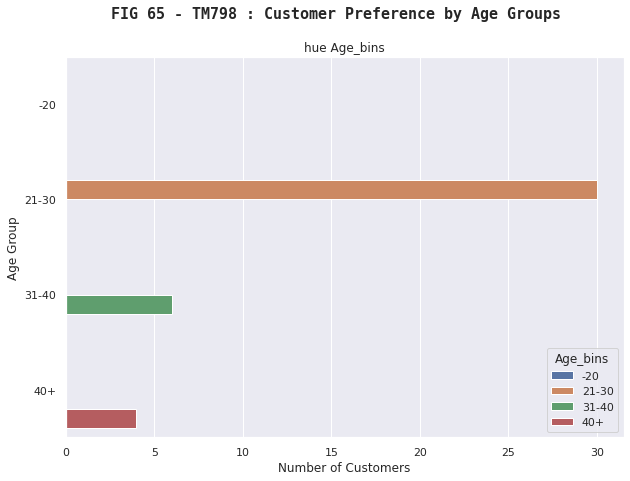

In [ ]:
#TM798 vs Age 
#fig_no = 65
#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

fig_no+=1

Age group that prefer TM798 the most is 21-30.

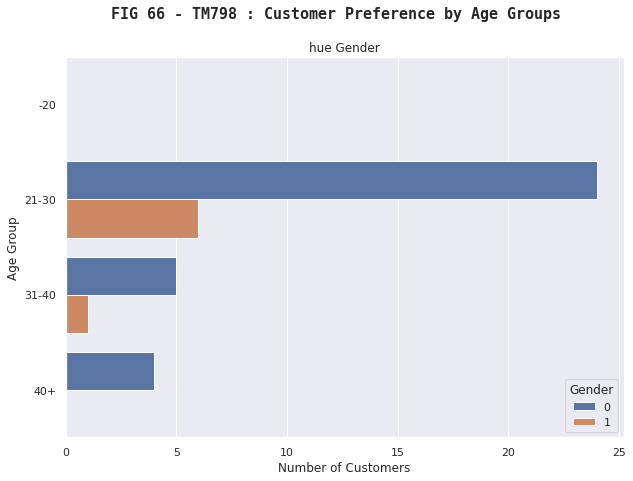

In [ ]:
#TM798 vs Age (Gender)
fig_no = 66
#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()
fig_no+=1

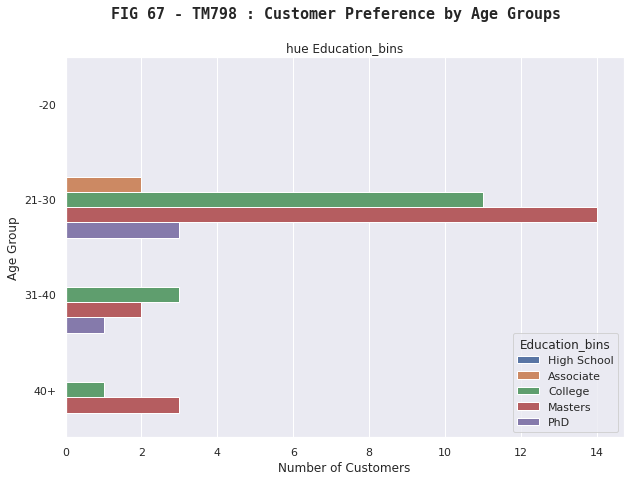

In [ ]:
#TM798 vs Age (Education_bins)
fig_no = 67
#hue declaration
hueselect = "Education_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

fig_no+=1

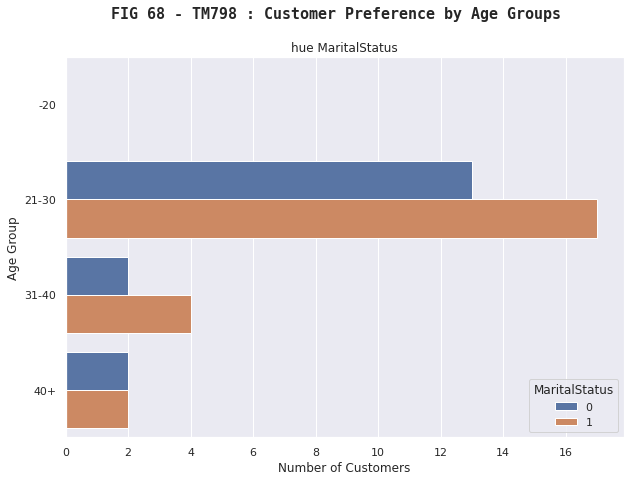

In [ ]:
#TM798 vs Age (MaritalStatus)
fig_no=68
#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

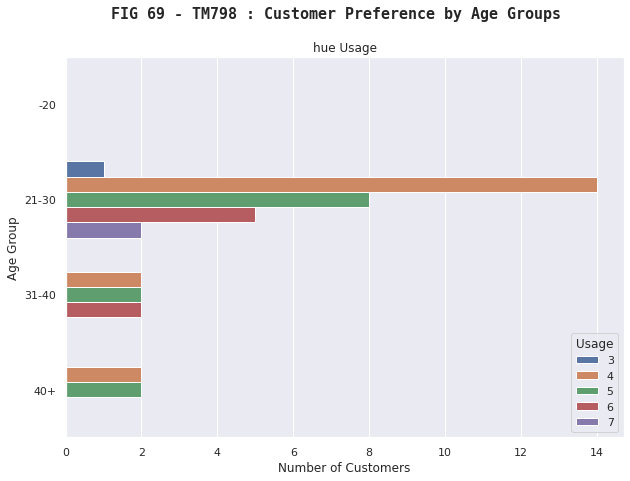

In [ ]:
#TM798 vs Age (Usage)
fig_no=69
#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

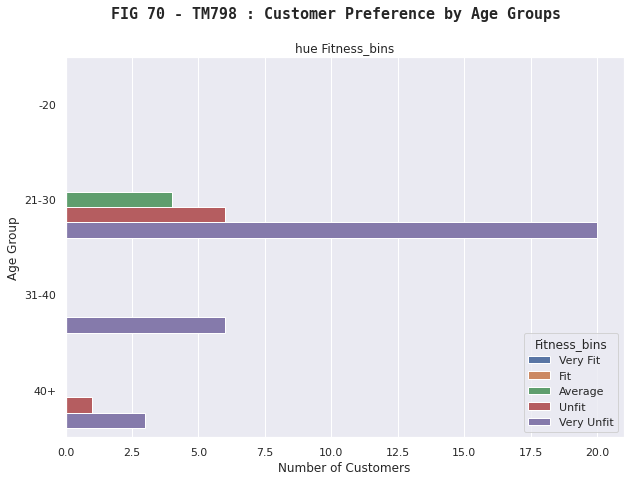

In [ ]:
#TM798 vs Age (Fitness_bins)
fig_no=70
#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

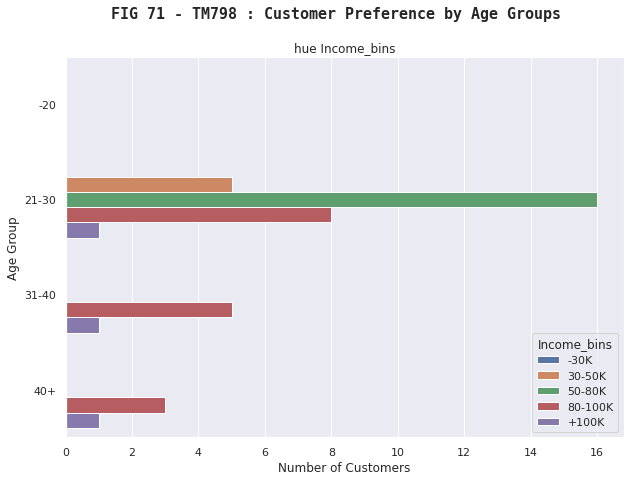

In [ ]:
#TM798 vs Age (Income_bins)
fig_no = 71
#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

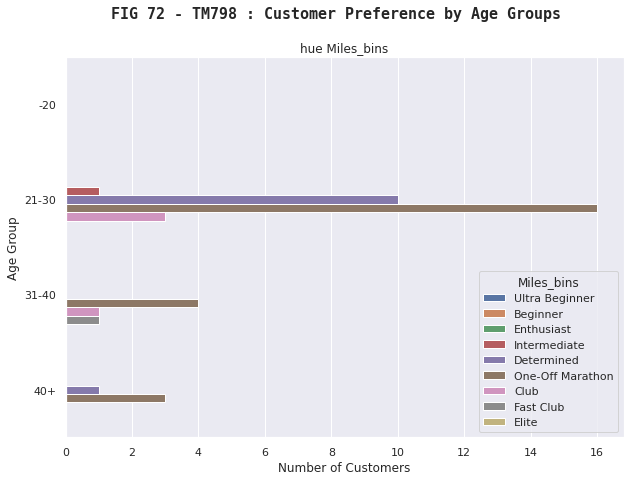

In [ ]:
#TM798 vs Age (Miles_bins)
fig_no = 72
#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Gender"
labelx = "Number of Customers"
labely = "Gender"
ay = "Gender"

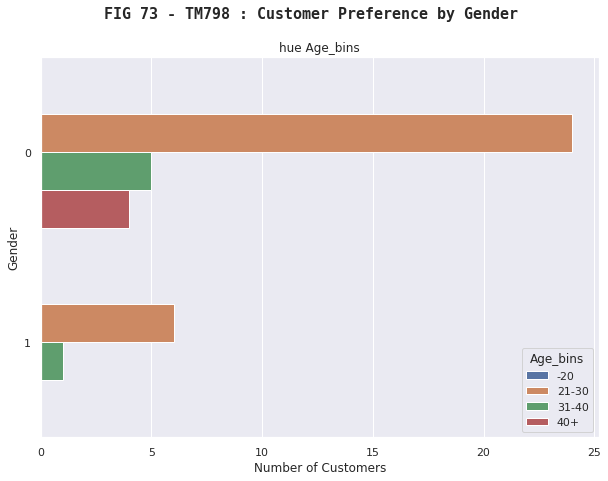

In [ ]:
#TM798 vs Gender (Age_bins)
fig_no= 73
#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='bottom right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

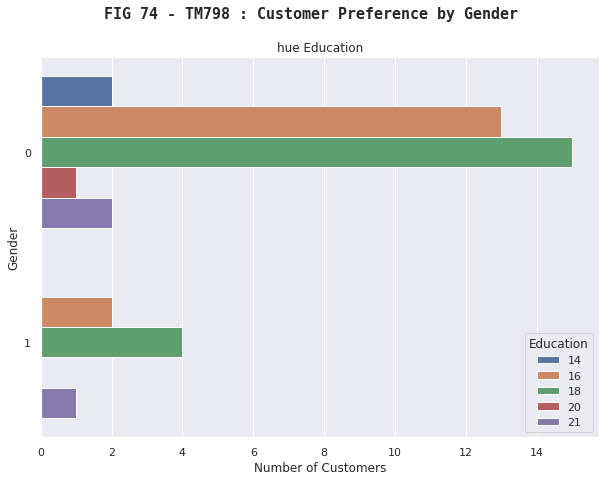

In [ ]:
#TM798 vs Gender (Education)
fig_no = 74
#hue declaration
hueselect = "Education"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


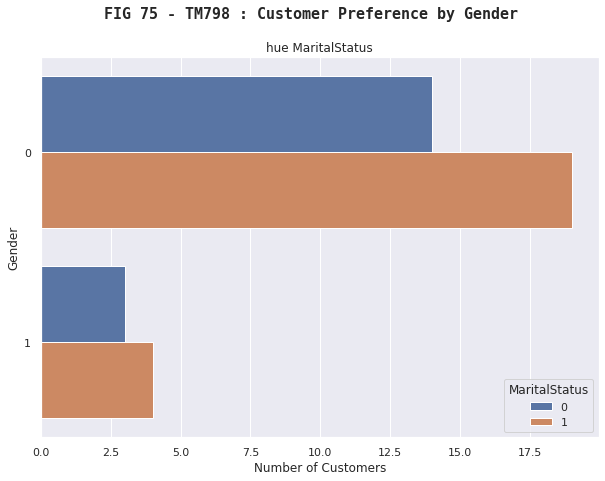

In [ ]:
#TM798 vs Gender (MaritalStatus)
fig_no = 75
#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

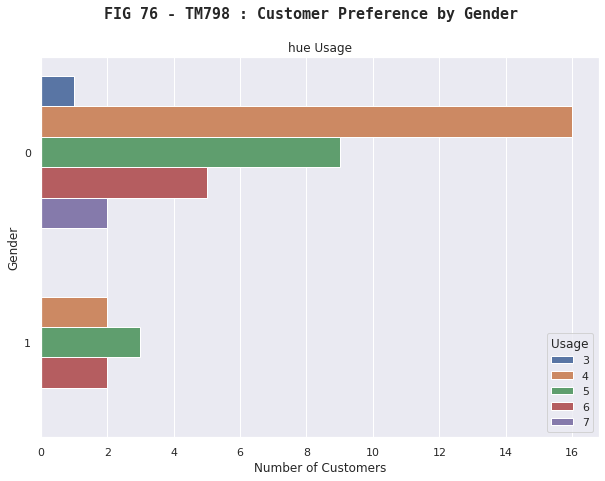

In [ ]:
#TM798 vs Gender (Usage)
fig_no = 76
#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

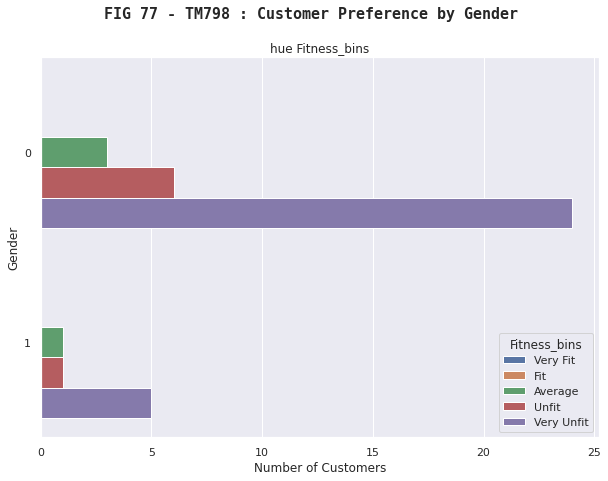

In [ ]:
#TM798 vs Gender (Fitness_bins)
fig_no = 77
#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

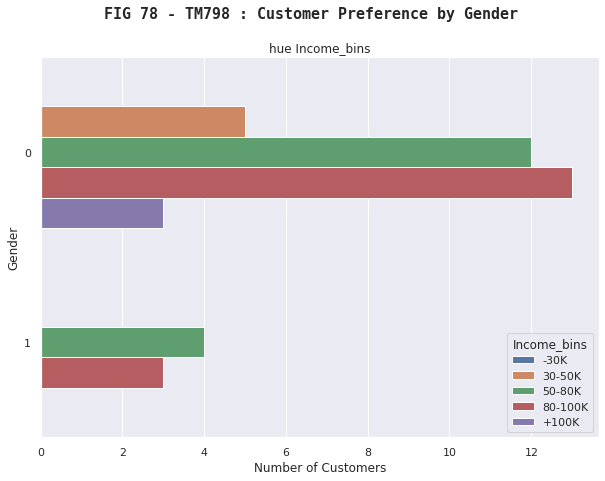

In [ ]:
#TM798 vs Gender (Income_bins)
fig_no = 78
#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

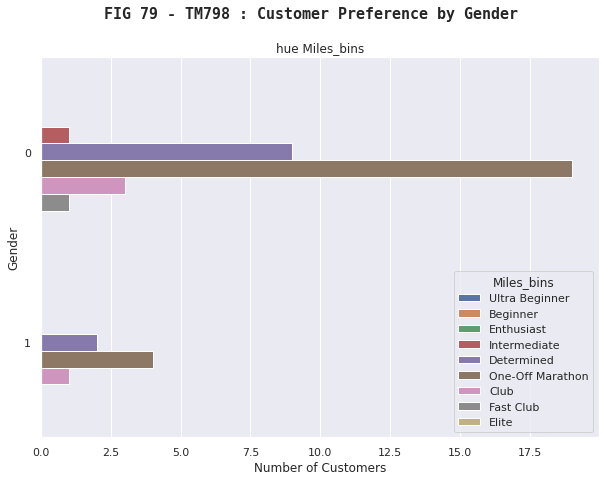

In [ ]:
#TM798 vs Gender (Miles bins)
fig_no = 79
#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Education Level"
labelx = "Number of Customers"
labely = "Education Level"
ay = "Education_bins"

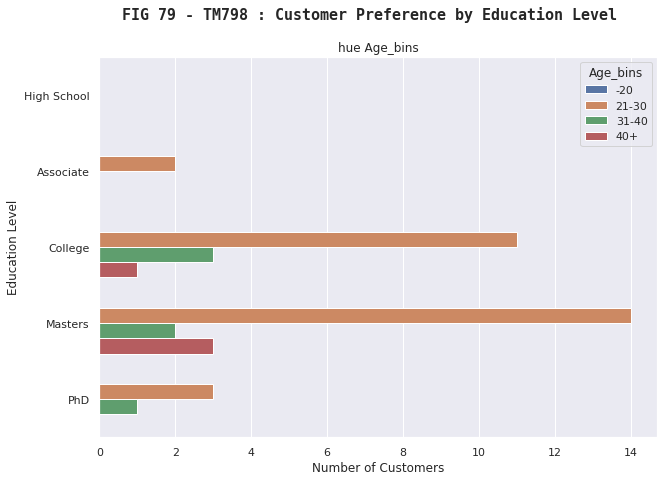

In [ ]:
#TM798 vs Education (Age_bins)
fig_No = 80
#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

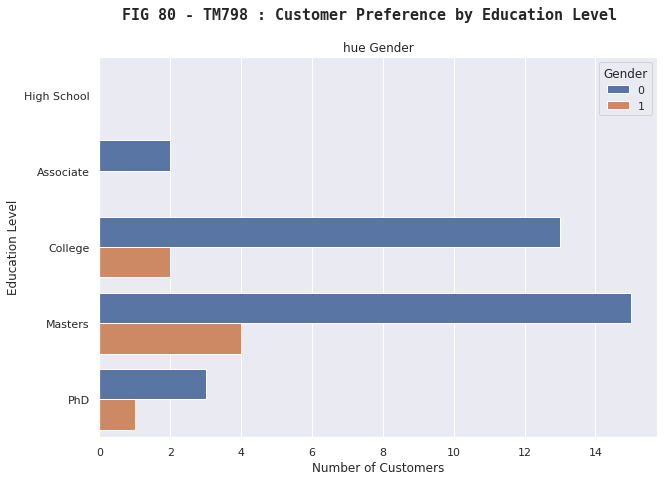

In [ ]:
#TM798 vs Education (Gender)
fig_no = 80
#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


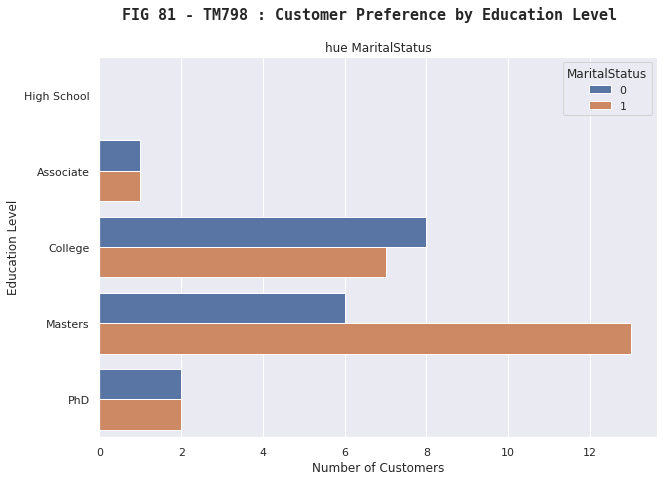

In [ ]:
#TM798 vs Education (Marital Status)
fig_no = 81
#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

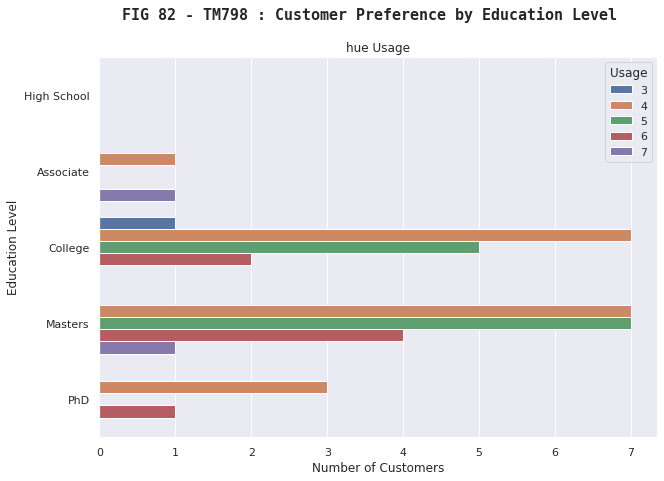

In [ ]:
#TM798 vs Education (Usage_)
fig_no = 82
#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

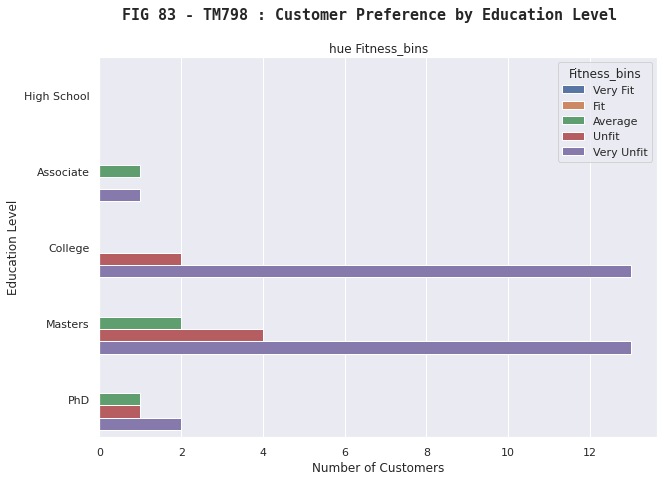

In [ ]:
#TM798 vs Education (Fitness_bins)
fig_no = 83
#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

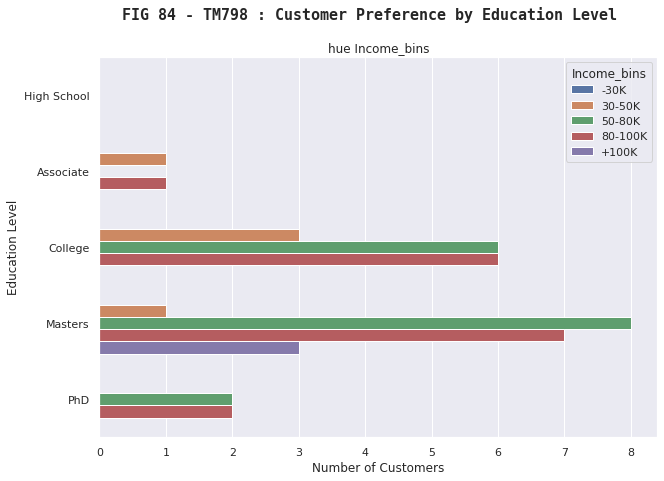

In [ ]:
#TM798 vs Education (Income_bins)
fig_no = 84
#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

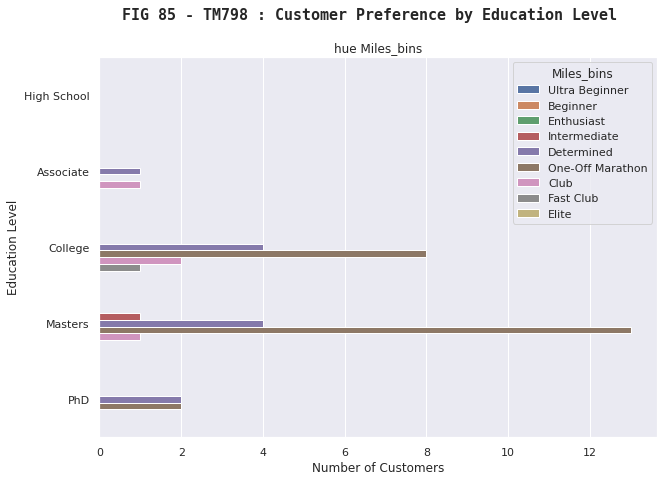

In [ ]:
#TM798 vs Education (Miles_bins)
fig_no = 85
#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Marital Status"
labelx = "Number of Customers"
labely = "MaritalStatus"
ay = "MaritalStatus"

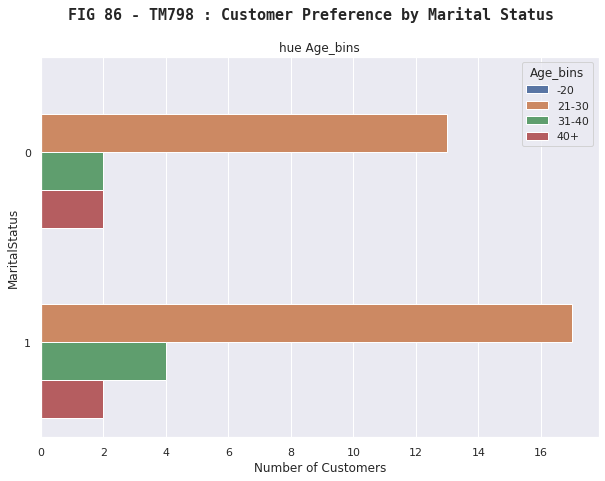

In [ ]:
#TM798 vs Gender (Age bins)
fig_no = 86
#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

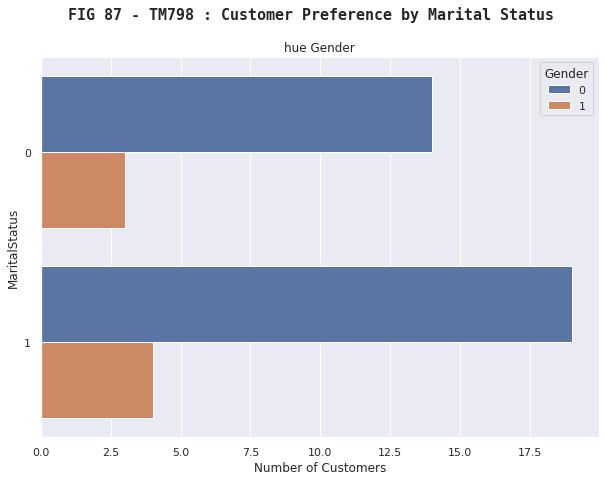

In [ ]:
#TM798 vs Marital Status (Gender)
fig_no=87
#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

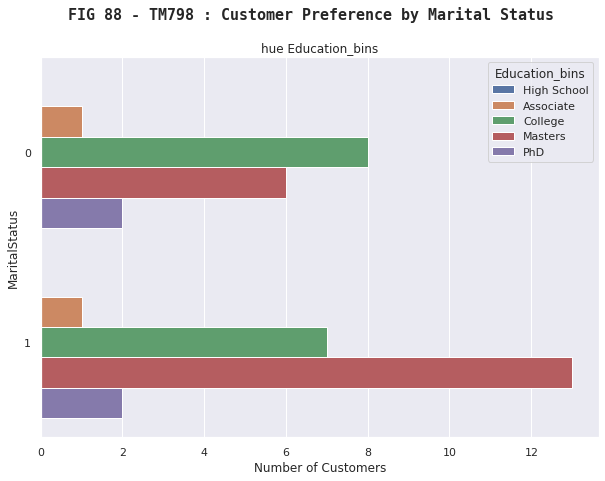

In [ ]:
#TM798 vs Marital Status (Education_bins)
fig_no = 88
#hue declaration
hueselect = "Education_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

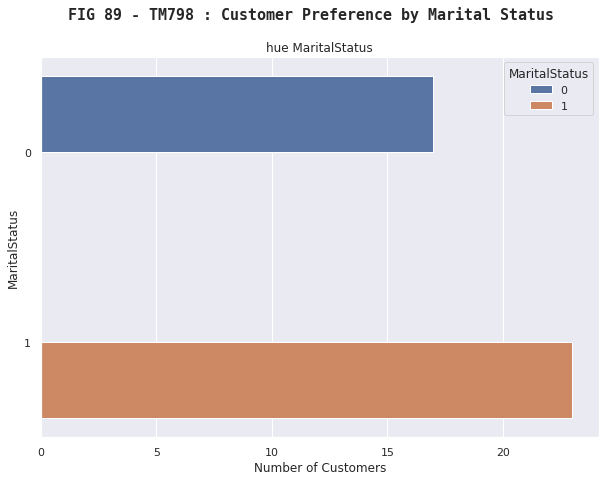

In [ ]:
#TM798 vs Marital Status 
fig_no = 89
#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

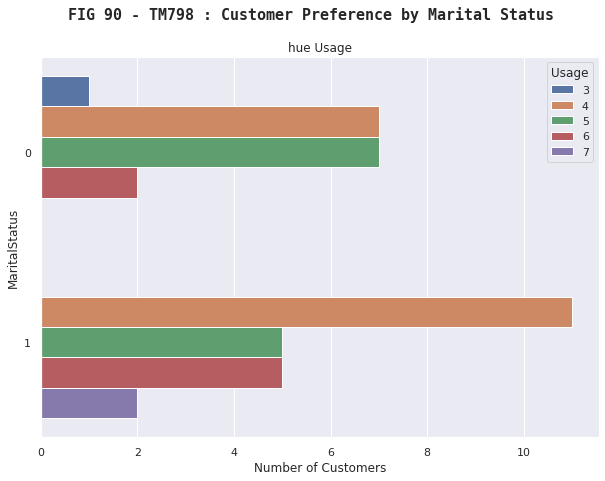

In [ ]:
#TM798 vs Marital Status (Usage)
fig_no = 90
#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

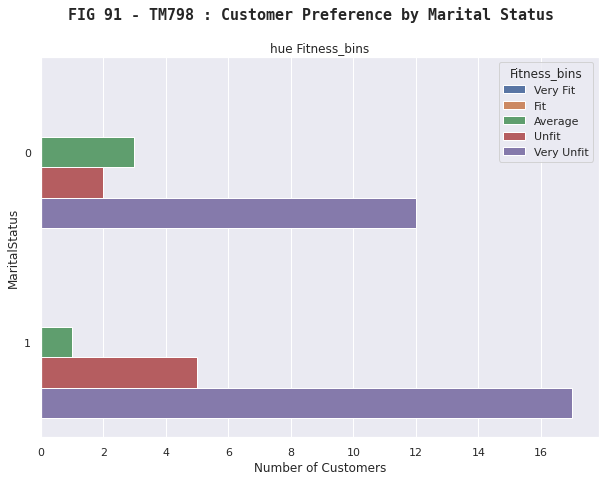

In [ ]:
#TM798 vs Marital Status (Fitness_bins)
fig_no = 91
#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

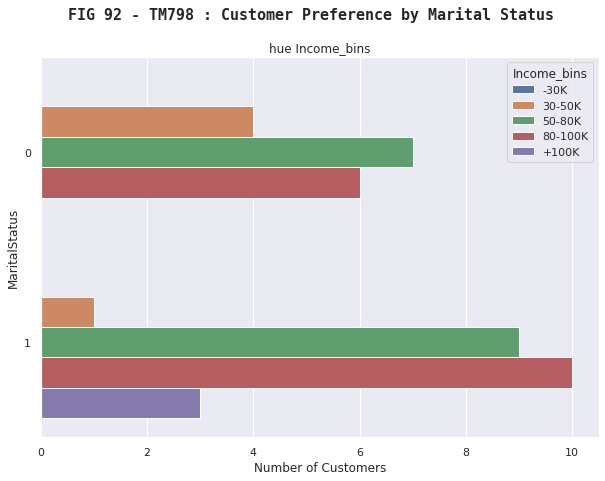

In [ ]:
#TM798 vs Marital Status (Income_bins)
fig_no = 92
#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

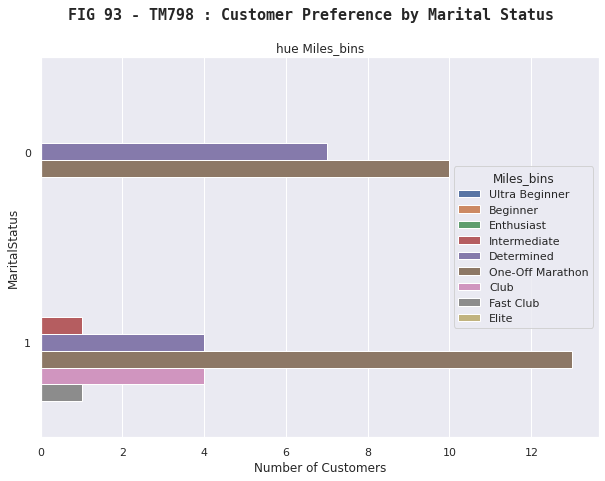

In [ ]:
#TM798 vs Marital Status (Miles_bins)
fig_no = 93
#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='center right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Usage"
labelx = "Number of Customers"
labely = "Usage (Times/week)"
ay = "Usage"

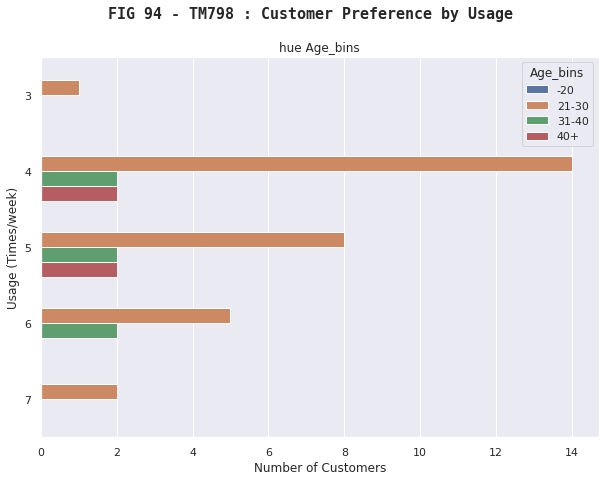

In [ ]:
#TM798 vs Usage (Age_bins)
fig_no+=1
#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

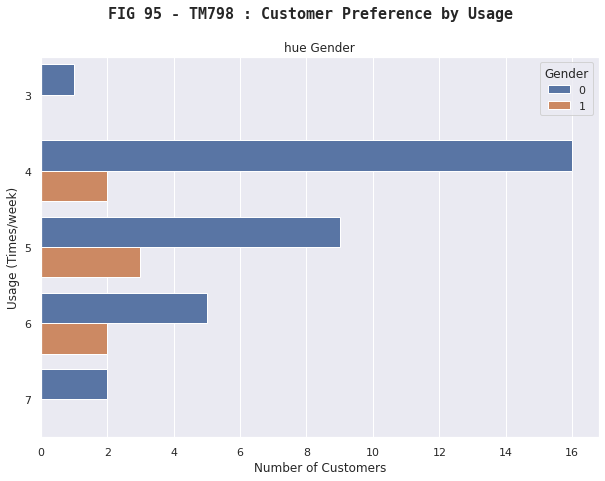

In [ ]:
#TM798 vs Usage (Gender)
fig_no+=1
#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


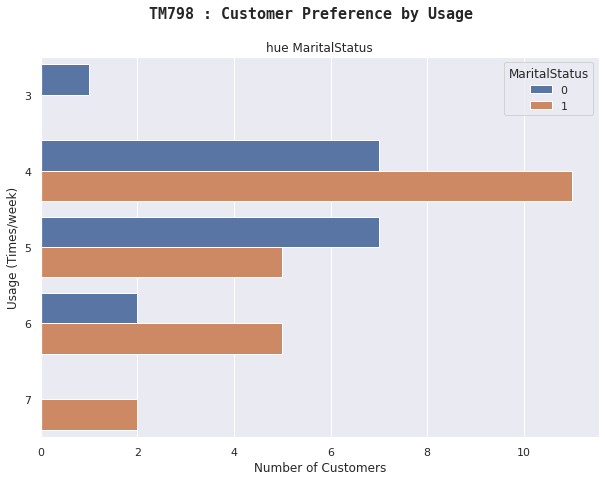

In [ ]:
#TM798 vs Usage (Marital Status)
fig_no+=1
#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

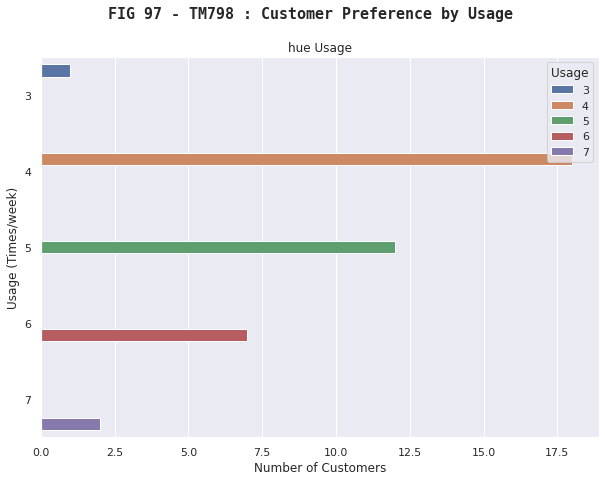

In [ ]:
#TM798 vs Usage (Usage_)
fig_no+=1
#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

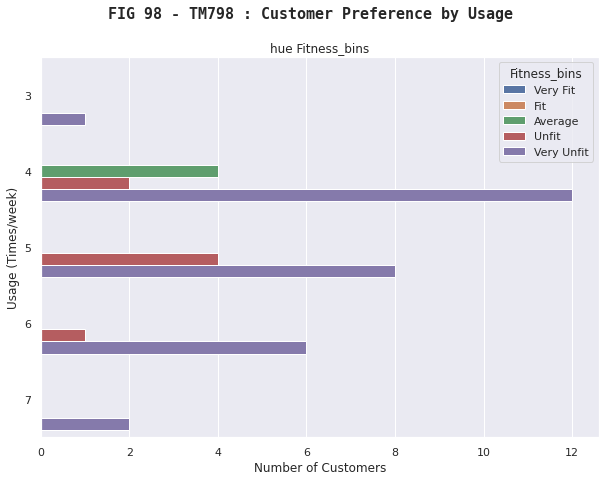

In [ ]:
#TM798 vs Usage (Fitness_bins)
fig_no+=1
#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

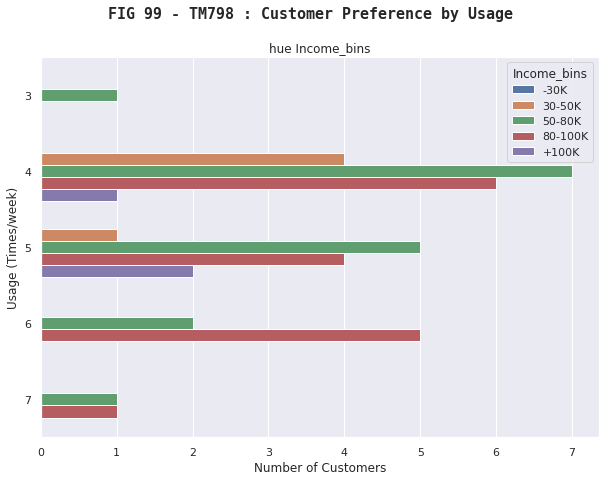

In [ ]:
#TM798 vs Usage (Income_bins)
fig_no+=1
#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

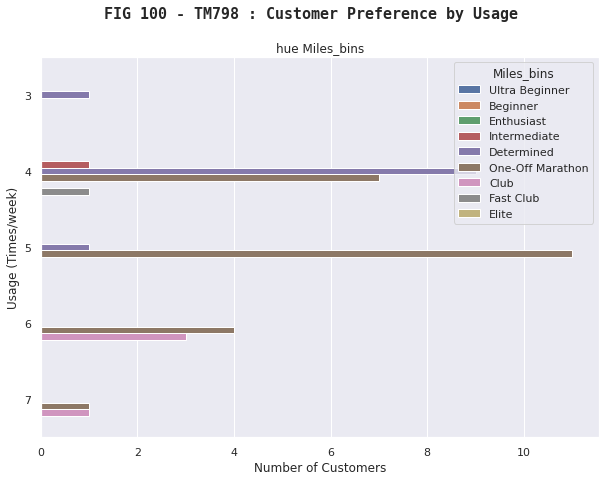

In [ ]:
#TM798 vs Usage (Miles_bins)
fig_no+=1
#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Fitness Level"
labelx = "Number of Customers"
labely = "Fitness Level"
ay = "Fitness_bins"

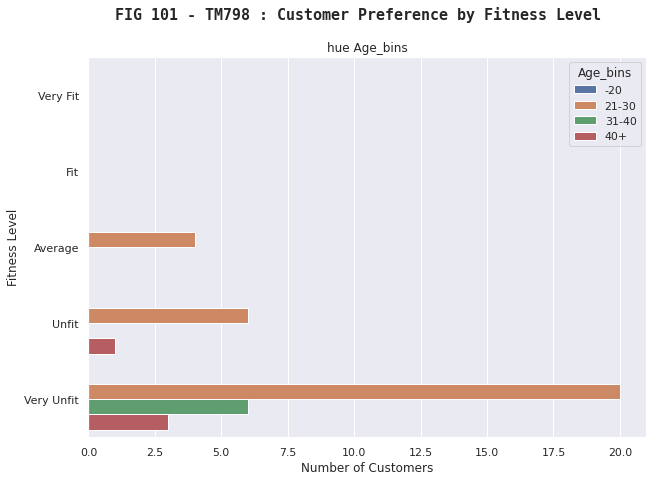

In [ ]:
#TM798 vs Fitness Level (Age_bins)
fig_no+=1
#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

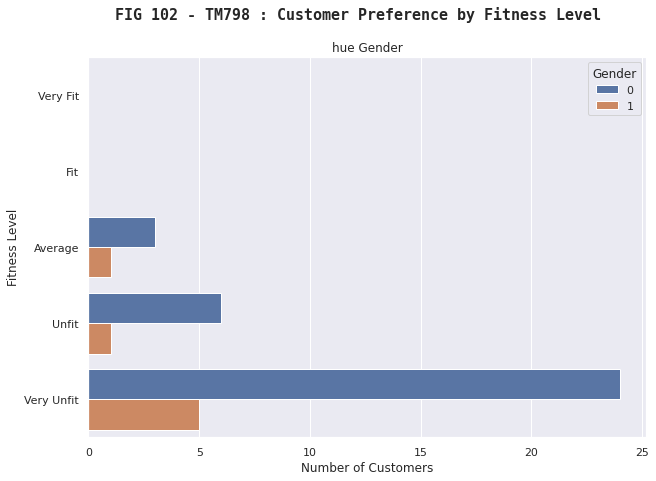

In [ ]:
#TM798 vs Fitness (Gender)
fig_no+=1
#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


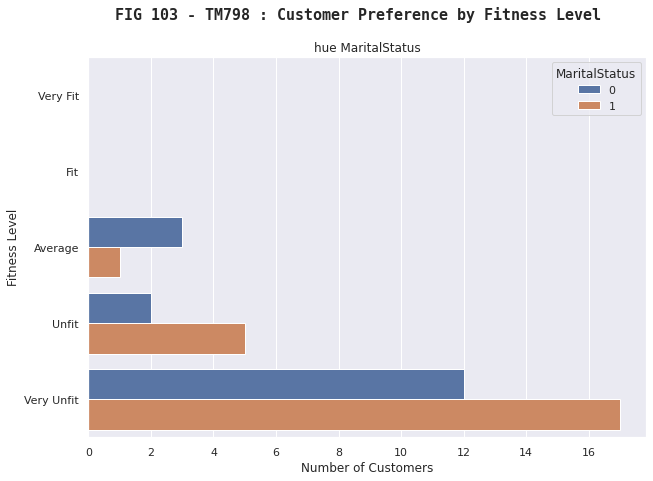

In [ ]:
#TM798 vs Fitness Level (Marital Status)
fig_no+=1
#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

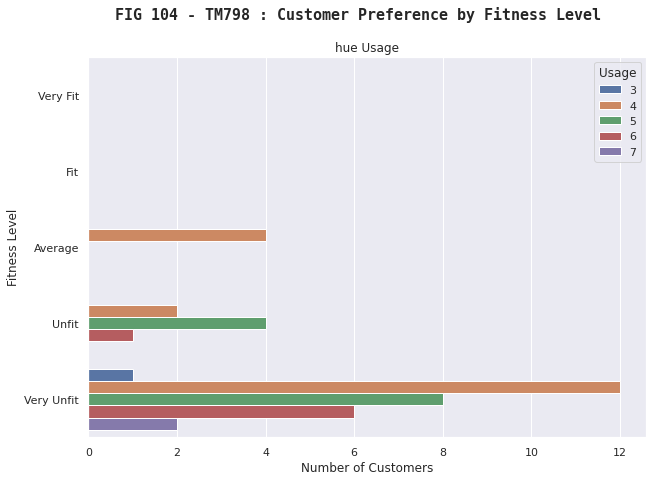

In [ ]:
#TM798 vs Fitness Level (Usage_)
fig_no+=1
#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

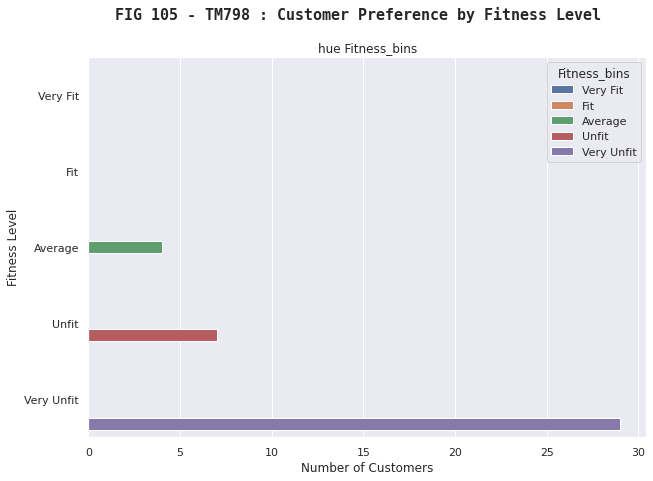

In [ ]:
#TM798 vs Fitness Level (Fitness_bins)
fig_no+=1
#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

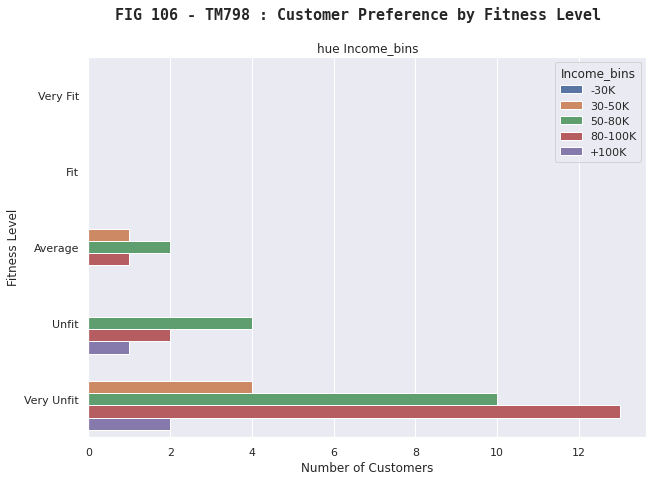

In [ ]:
#TM798 vs Fitness Level (Income_bins)
fig_no+=1
#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

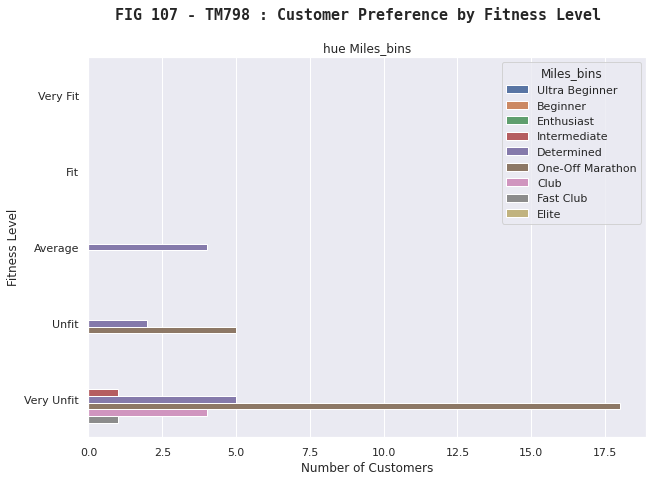

In [ ]:
#TM798 vs Fitness Level (Miles_bins)
fig_no+=1
#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Income Level"
labelx = "Number of Customers"
labely = "Income Level"
ay = "Income_bins"

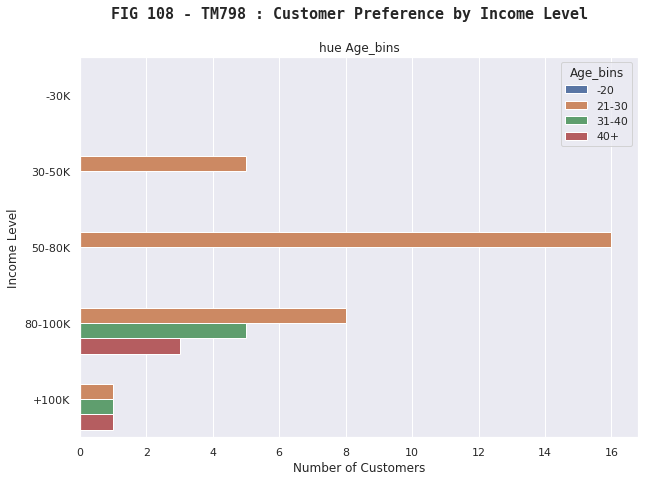

In [ ]:
#TM798 vs Income (Age_bins)
fig_no+=1
#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

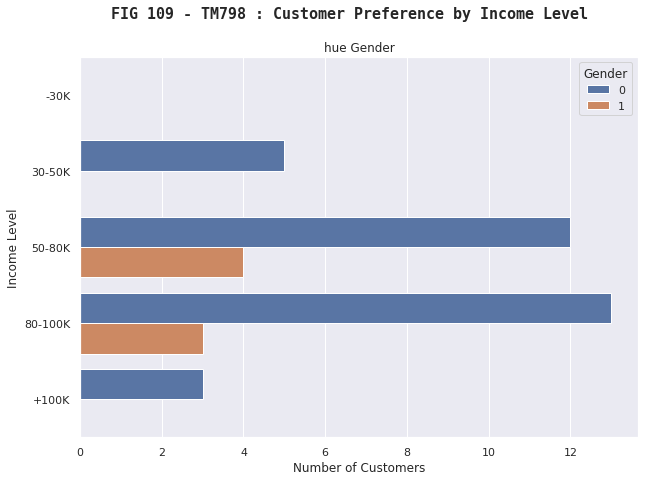

In [ ]:
#TM798 vs Income (Gender)
fig_no+=1
#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


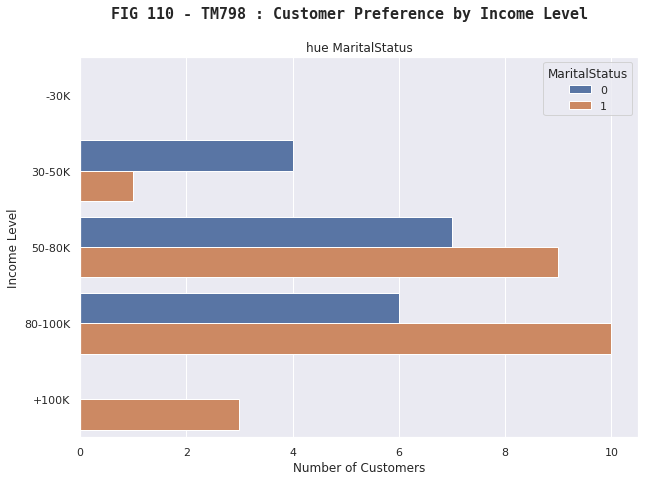

In [ ]:
#TM798 vs Income (Marital Status)
fig_no+=1
#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

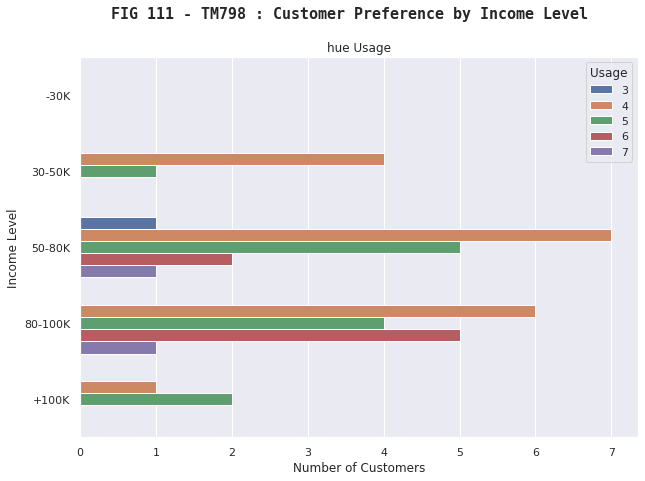

In [ ]:
#TM798 vs Income (Usage_)
fig_no+=1
#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

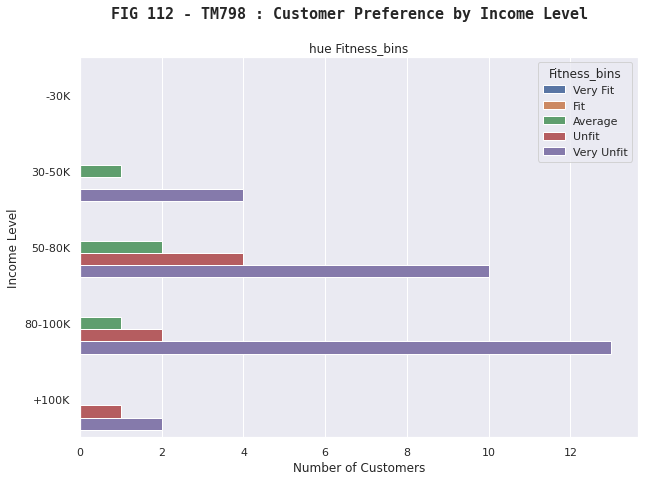

In [ ]:
#TM798 vs Income (Fitness_bins)
fig_no+=1
#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

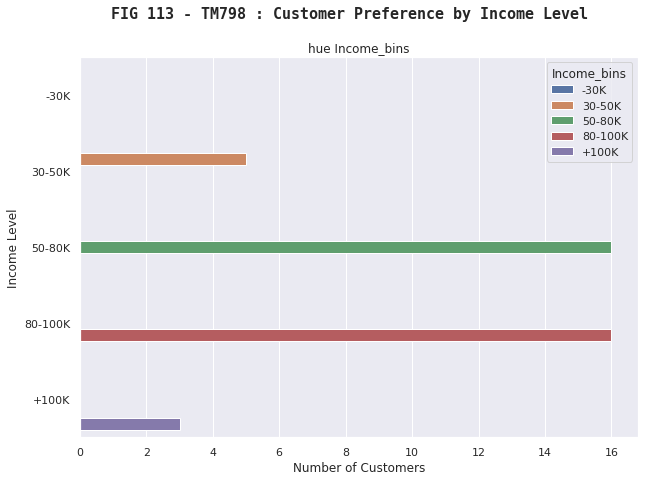

In [ ]:
#TM798 vs Income (Income_bins)
fig_no+=1
#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

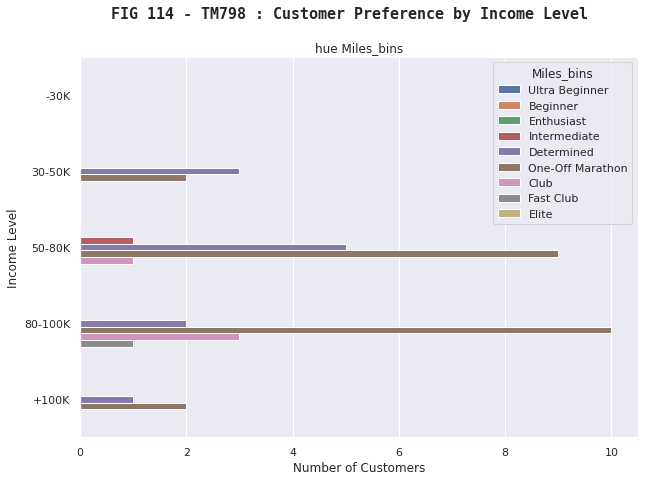

In [ ]:
#TM798 vs Income (Miles_bins)
fig_no+=1
#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Miles"
labelx = "Number of Customers"
labely = "Miles"
ay = "Miles_bins"

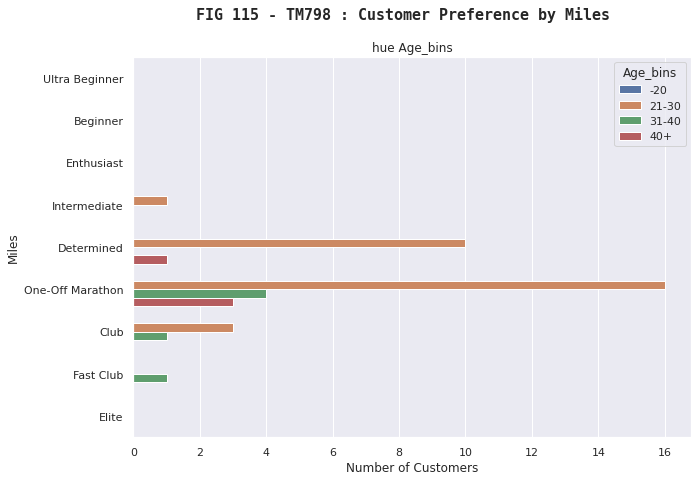

In [ ]:
#TM798 vs Miles (Age_bins)
fig_no+=1
#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

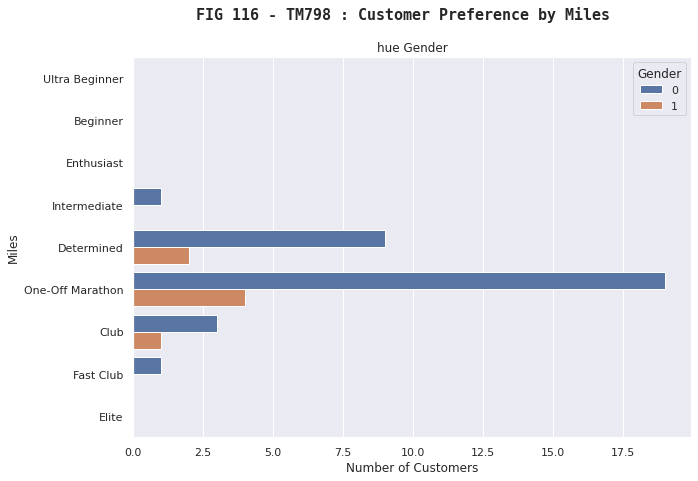

In [ ]:
#TM798 vs Miles (Gender)
fig_no+=1
#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


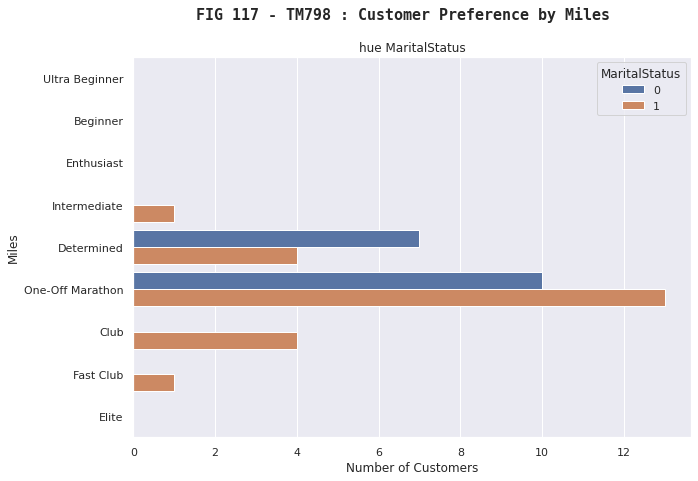

In [ ]:
#TM798 vs Miles (Marital Status)
fig_no+=1
#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

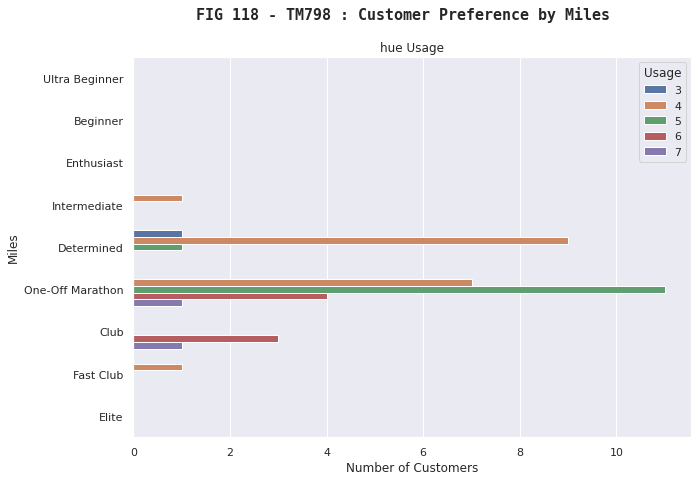

In [ ]:
#TM798 vs Miles (Usage_)
fig_no+=1
#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

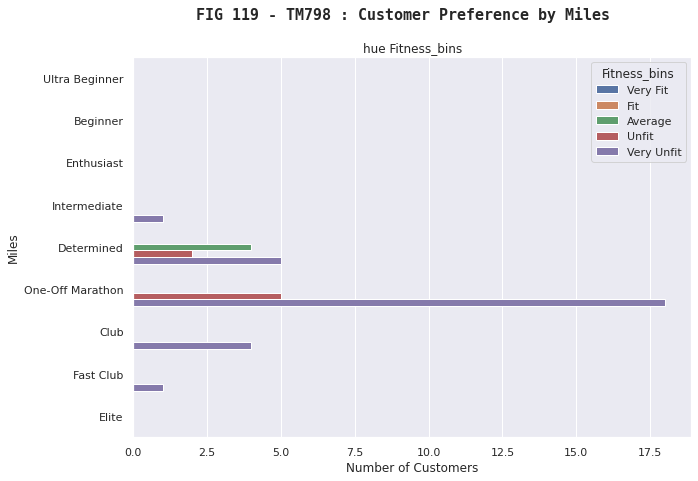

In [ ]:
#TM798 vs Miles (Fitness_bins)
fig_no+=1
#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

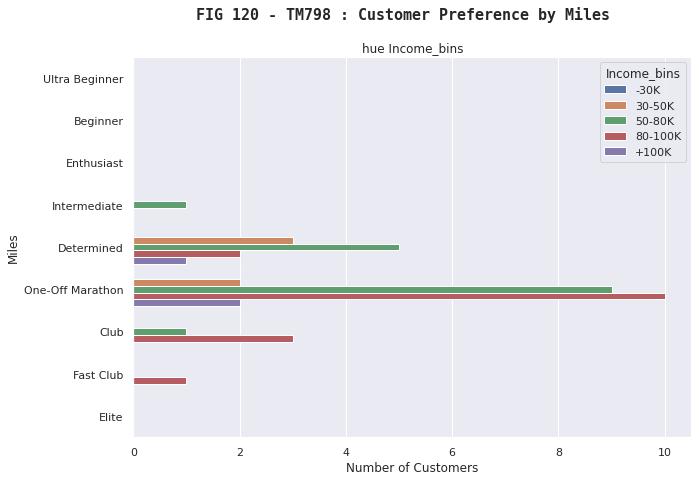

In [ ]:
#TM798 vs Miles (Income_bins)
fig_no+=1
#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

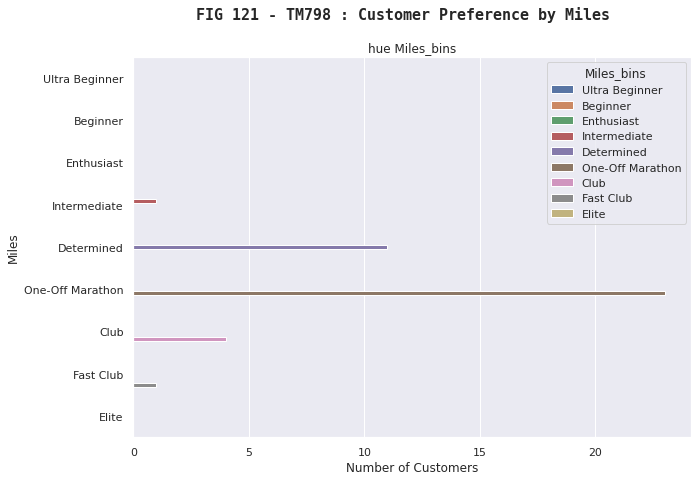

In [ ]:
#TM798 vs Miles (Miles_bins)
fig_no+=1
#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle("FIG "+str(fig_no)+" - " +modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

We can do the same for the other 2 treadmill models.

-------------


##5.2 TM498

In [ ]:
#lets analyze TM498
modelno = "TM498"
tm_df = cardiodata_df.loc[cardiodata_df["Product"]== 1]

In [ ]:
#Common declarations
title = "Customer Preference by Age Groups"
labelx = "Number of Customers"
labely = "Age Group"
ay = "Age_bins"

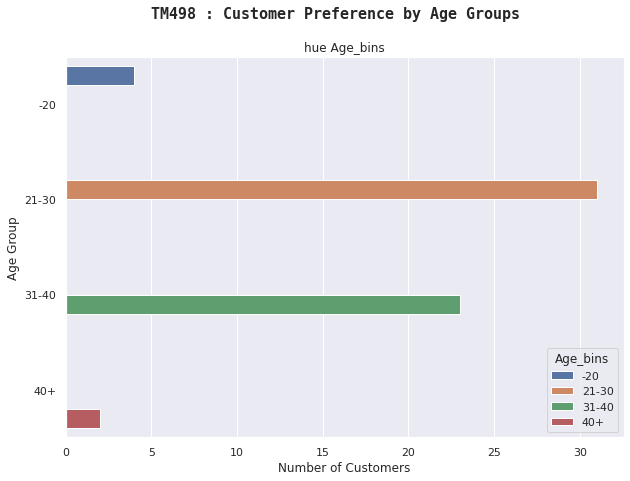

In [ ]:
#TM498 vs Age 

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

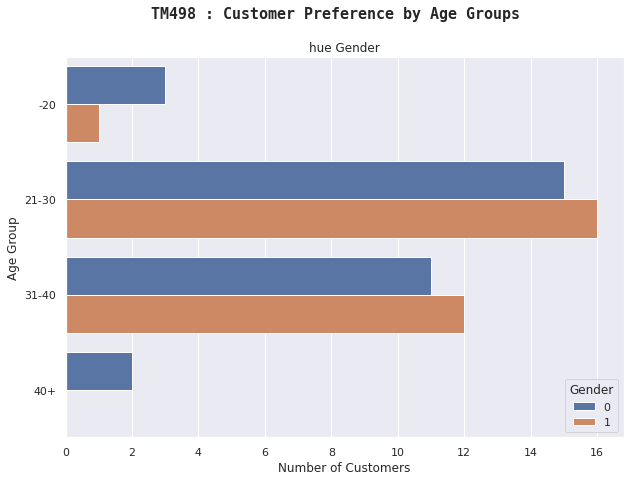

In [ ]:
#TM498 vs Age (Gender)

#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

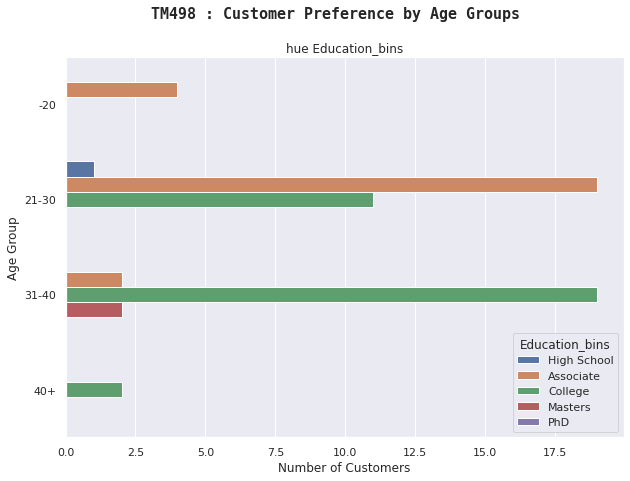

In [ ]:
#TM498 vs Age (Education_bins)

#hue declaration
hueselect = "Education_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

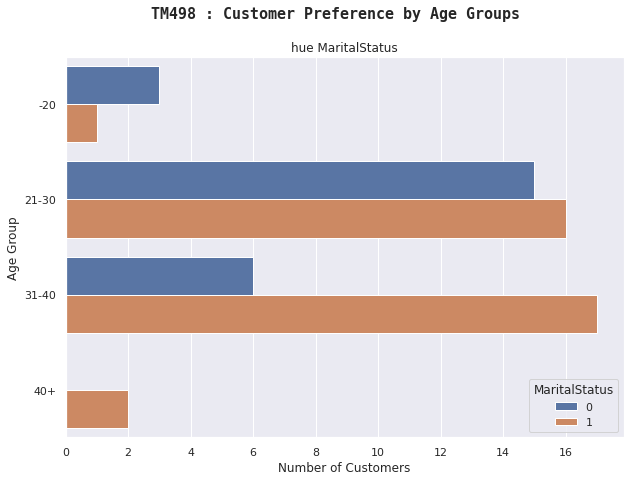

In [ ]:
#TM498 vs Age (MaritalStatus)

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

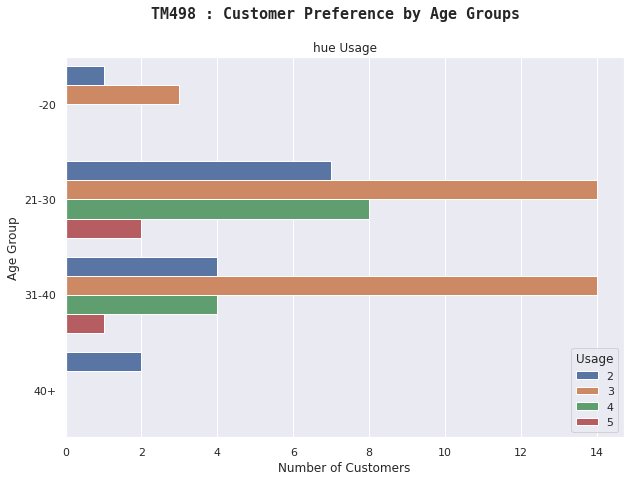

In [ ]:
#TM498 vs Age (Usage)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

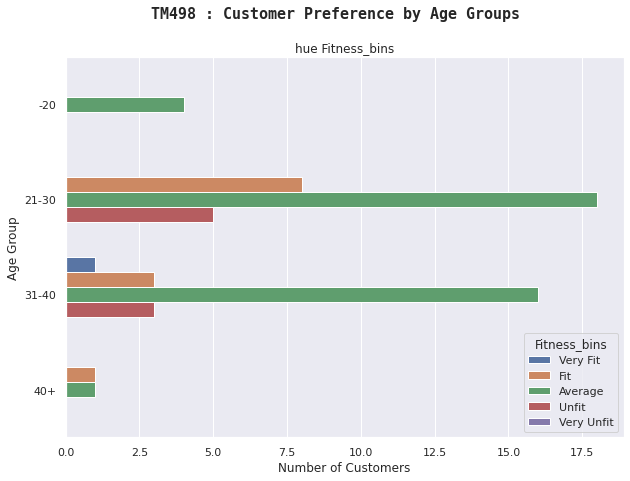

In [ ]:
#TM498 vs Age (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

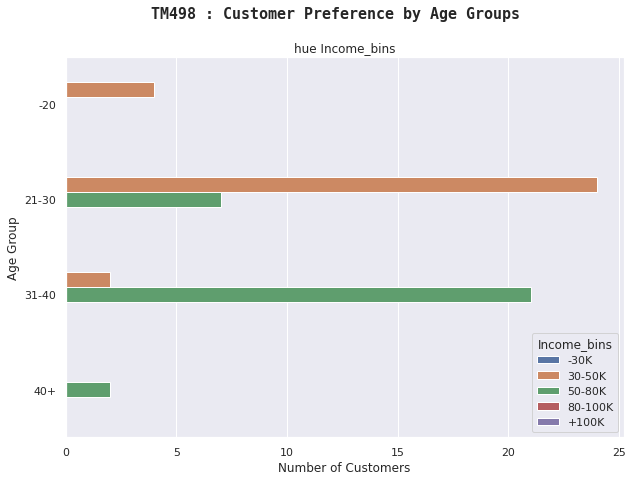

In [ ]:
#TM498 vs Age (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

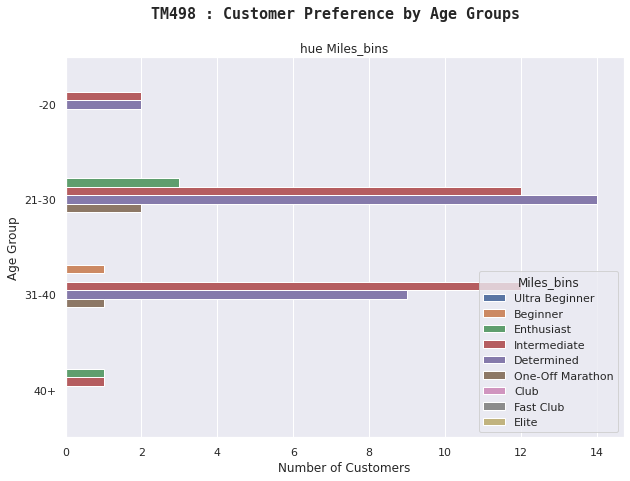

In [ ]:
#TM498 vs Age (Miles_bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Gender"
labelx = "Number of Customers"
labely = "Gender"
ay = "Gender"

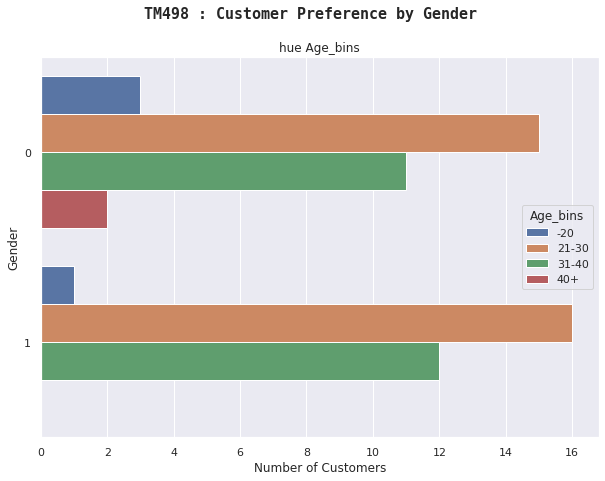

In [ ]:
#TM498 vs Gender (Age_bins)

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='bottom right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

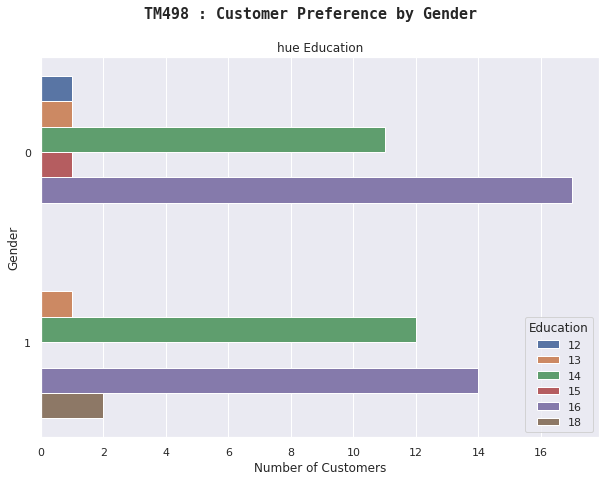

In [ ]:
#TM498 vs Gender (Education)

#hue declaration
hueselect = "Education"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


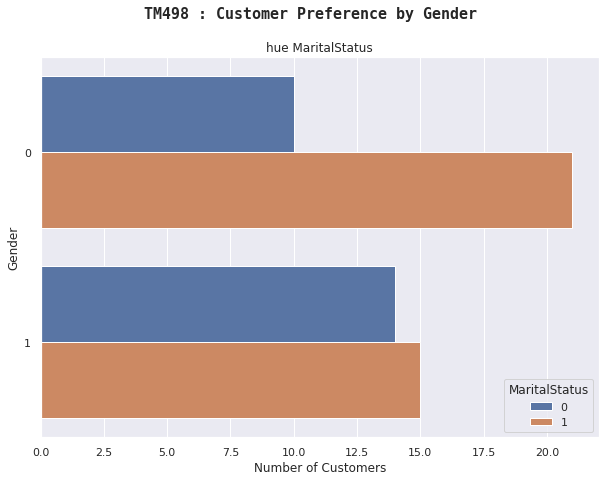

In [ ]:
#TM498 vs Gender (MaritalStatus)

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

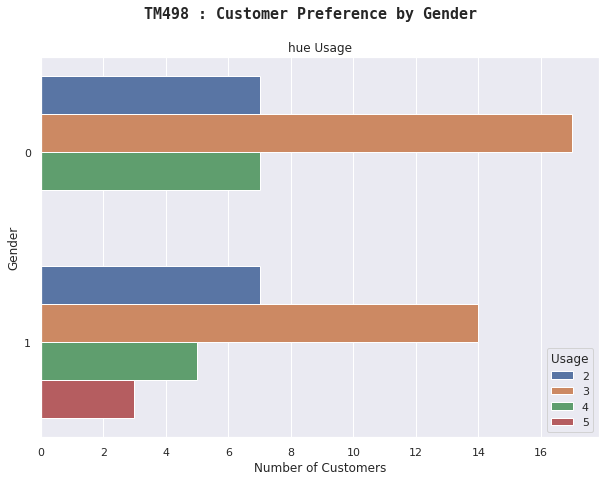

In [ ]:
#TM498 vs Gender (Usage)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

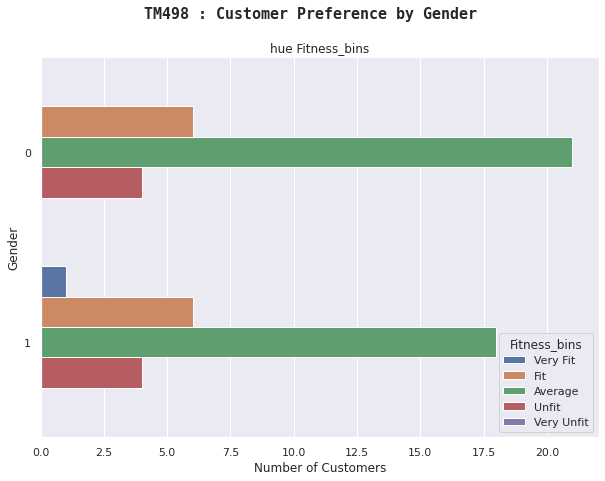

In [ ]:
#TM498 vs Gender (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

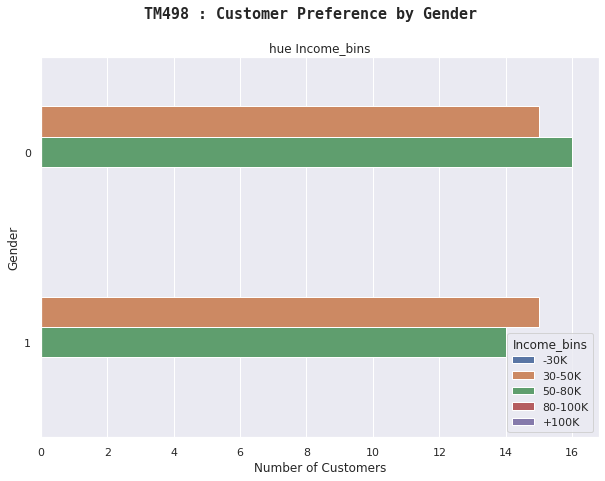

In [ ]:
#TM498 vs Gender (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

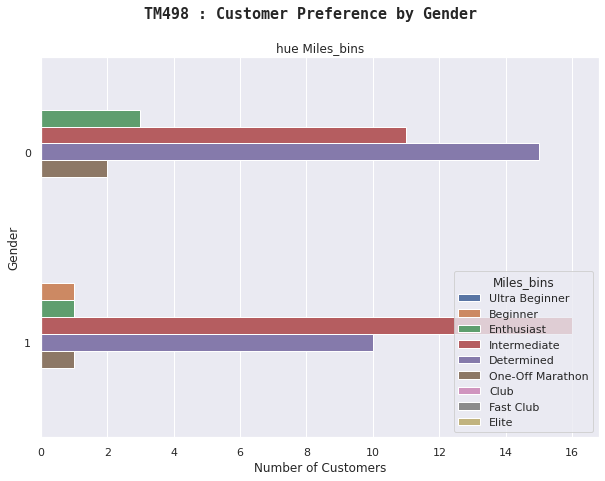

In [ ]:
#TM498 vs Gender (Miles bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Education Level"
labelx = "Number of Customers"
labely = "Education Level"
ay = "Education_bins"

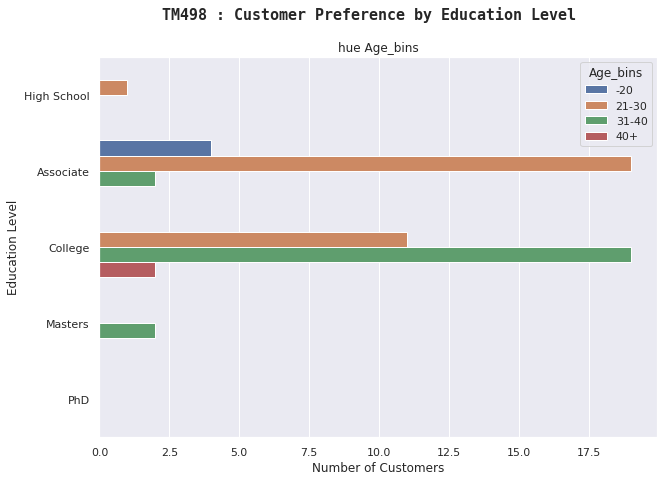

In [ ]:
#TM498 vs Education (Age_bins)

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

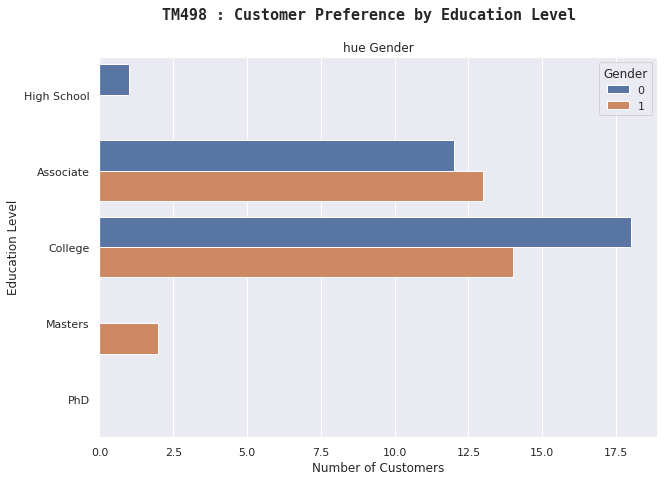

In [ ]:
#TM498 vs Education (Gender)

#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


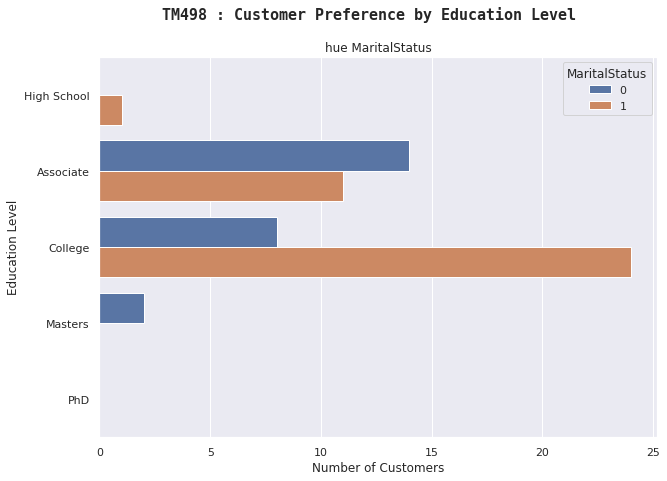

In [ ]:
#TM498 vs Education (Marital Status)

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

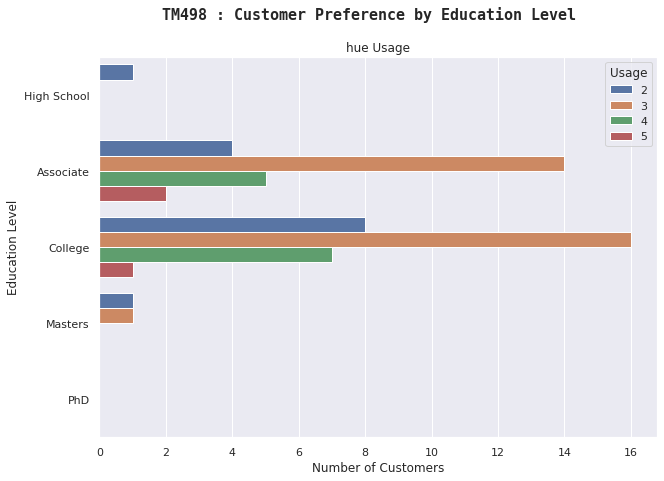

In [ ]:
#TM498 vs Education (Usage_)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

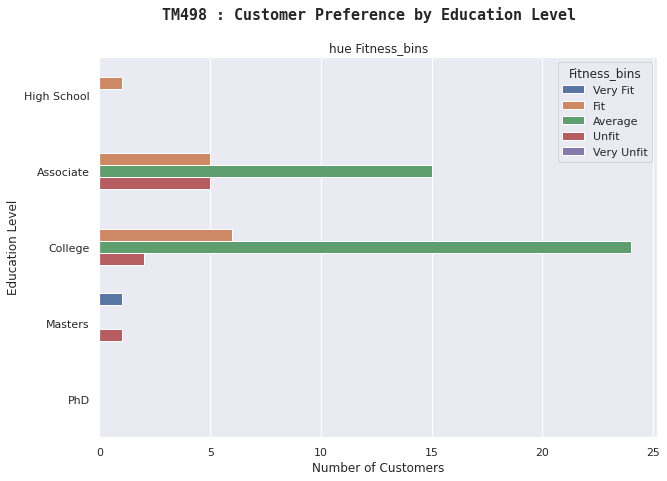

In [ ]:
#TM498 vs Education (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

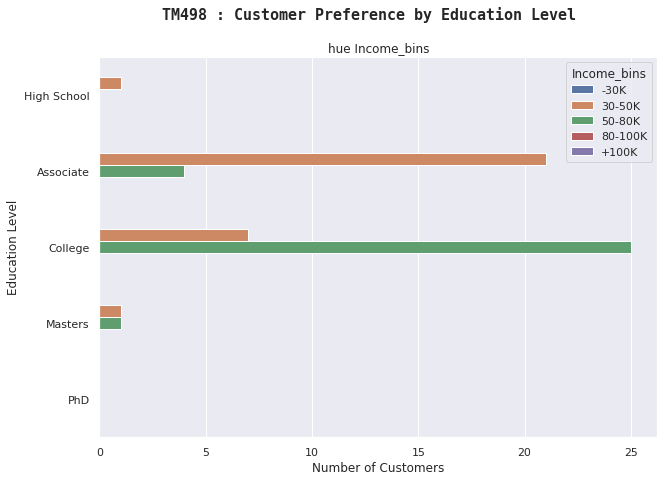

In [ ]:
#TM498 vs Education (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

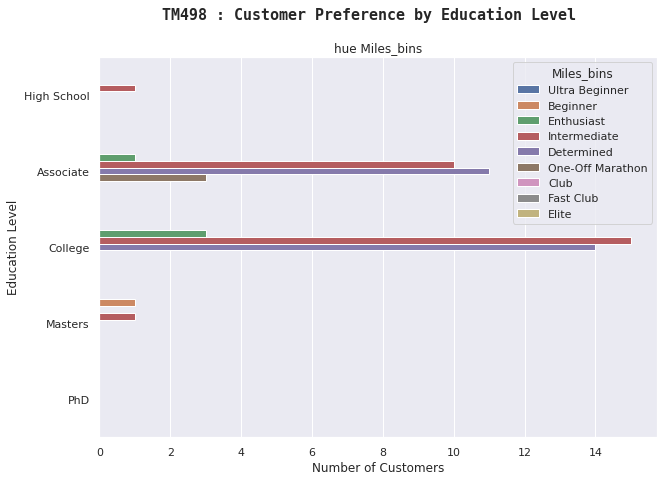

In [ ]:
#TM498 vs Education (Miles_bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Marital Status"
labelx = "Number of Customers"
labely = "MaritalStatus"
ay = "MaritalStatus"

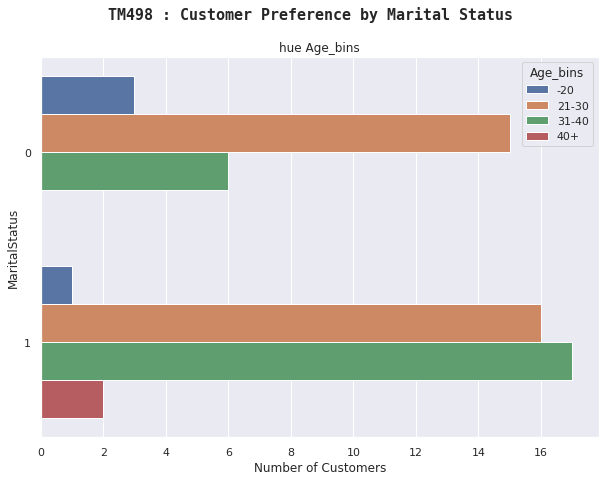

In [ ]:
#TM498 vs Gender (Age bins)

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

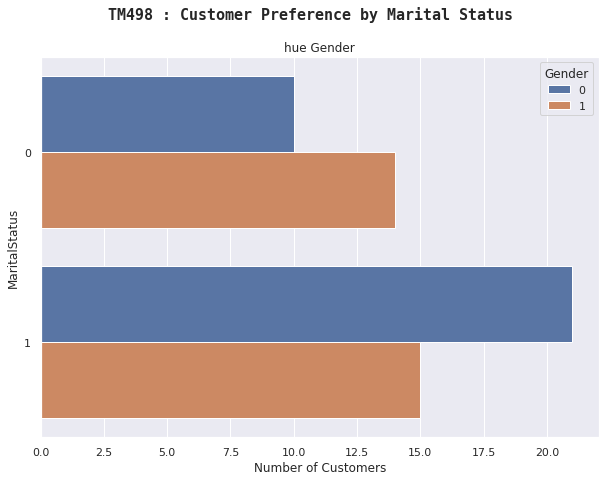

In [ ]:
#TM498 vs Marital Status (Gender)

#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

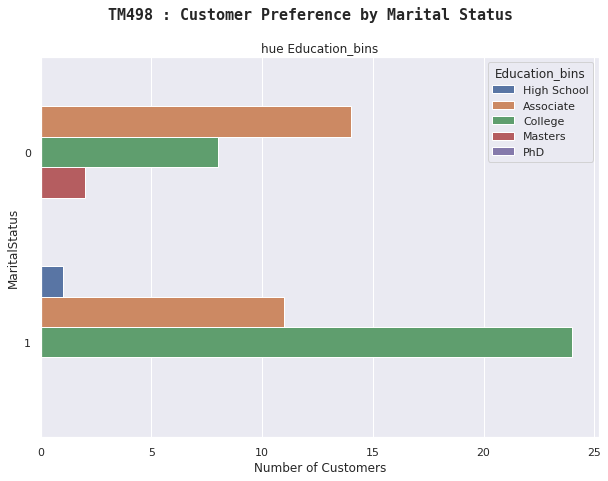

In [ ]:
#TM498 vs Marital Status (Education_bins)

#hue declaration
hueselect = "Education_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

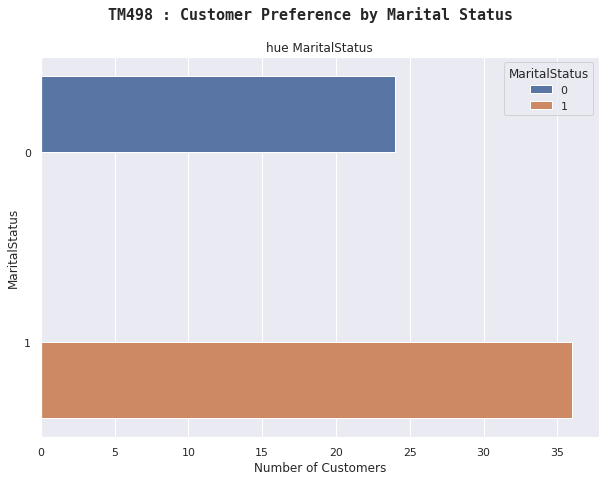

In [ ]:
#TM498 vs Marital Status 

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

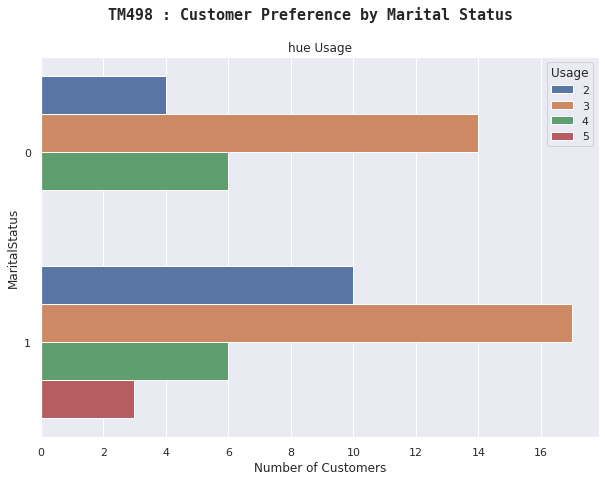

In [ ]:
#TM498 vs Marital Status (Usage)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

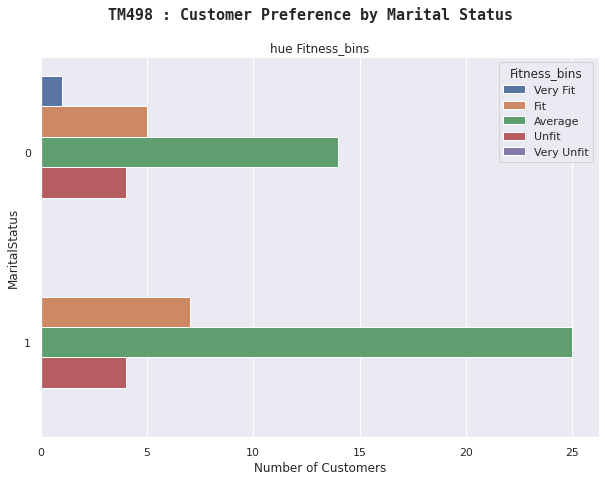

In [ ]:
#TM498 vs Marital Status (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

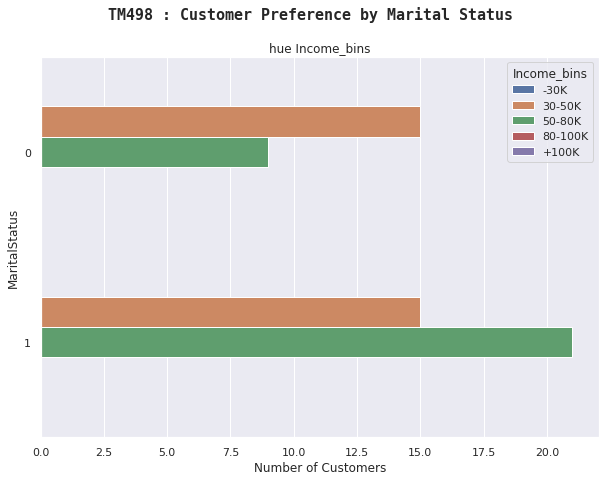

In [ ]:
#TM498 vs Marital Status (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and _df, y = ay, ax=ax, hue=hueselect)
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

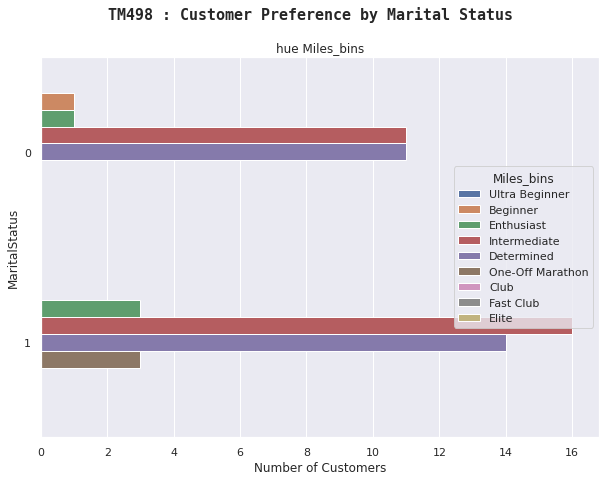

In [ ]:
#TM498 vs Marital Status (Miles_bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='center right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Usage"
labelx = "Number of Customers"
labely = "Usage (Times/week)"
ay = "Usage"

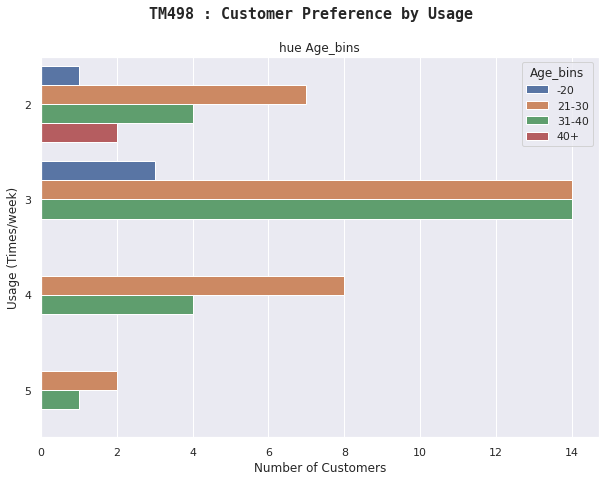

In [ ]:
#TM498 vs Usage (Age_bins)

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

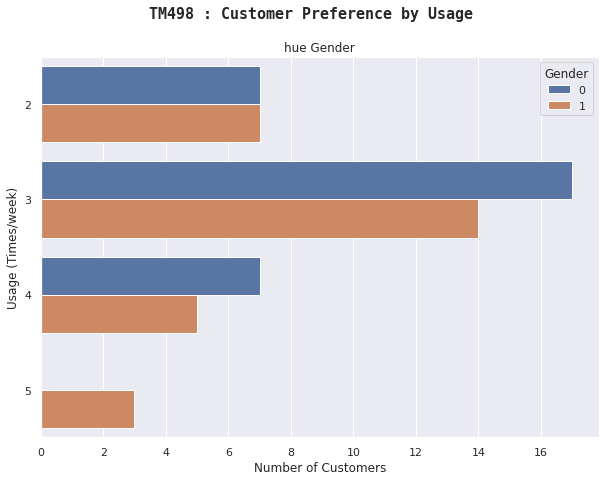

In [ ]:
#TM498 vs Usage (Gender)

#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


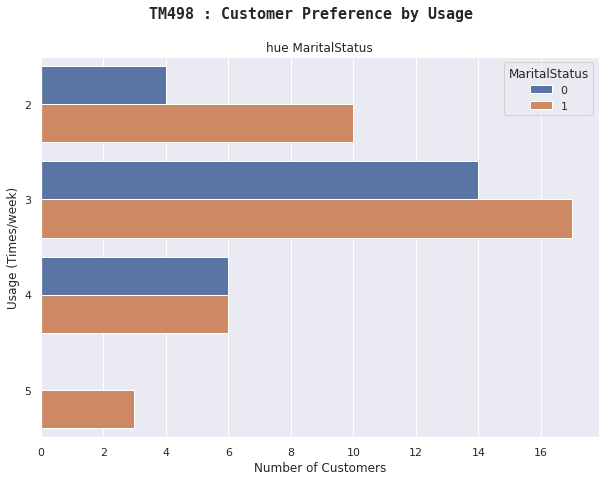

In [ ]:
#TM498 vs Usage (Marital Status)

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

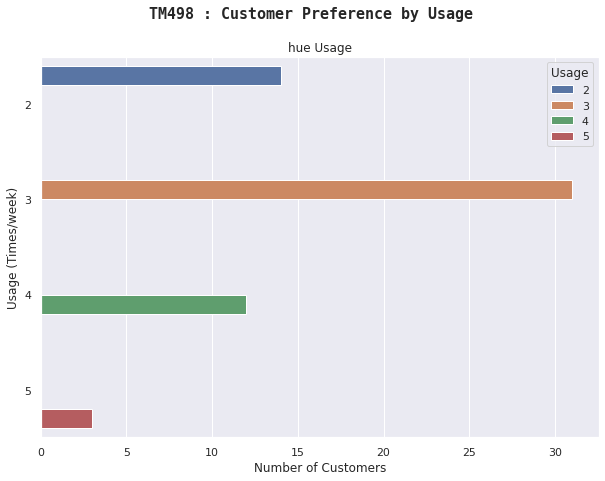

In [ ]:
#TM498 vs Usage (Usage_)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

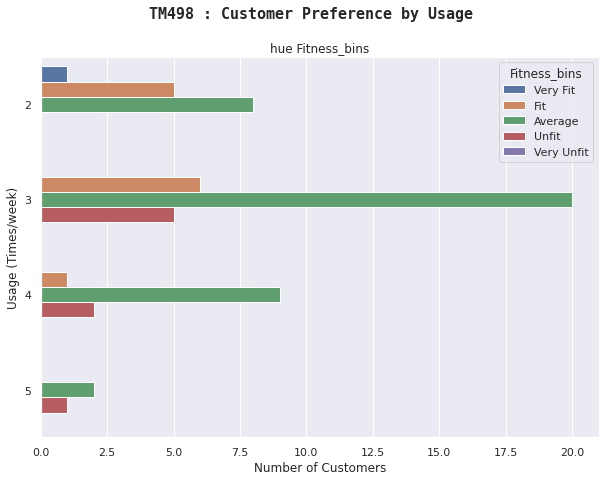

In [ ]:
#TM498 vs Usage (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

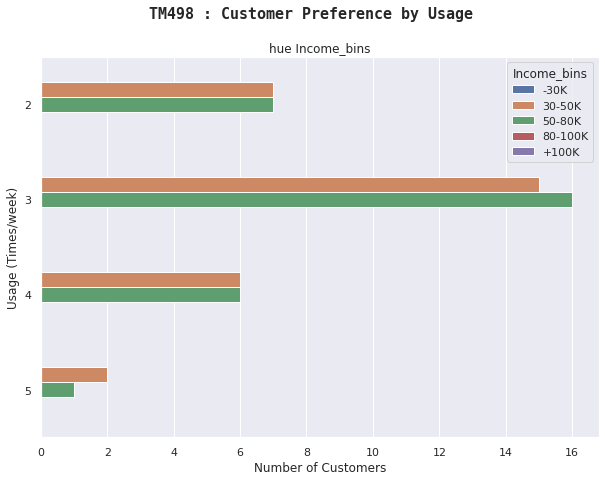

In [ ]:
#TM498 vs Usage (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

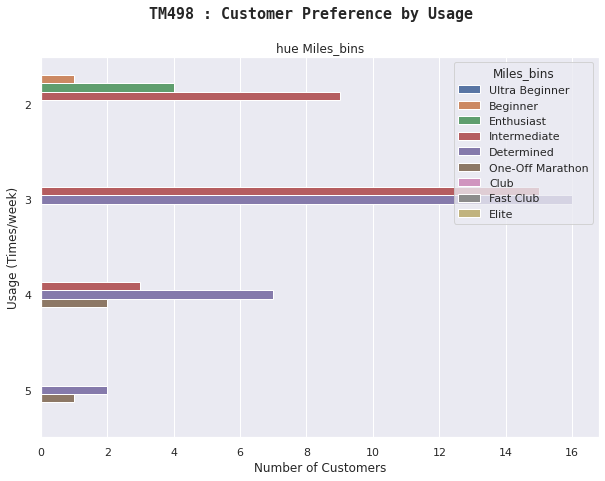

In [ ]:
#TM498 vs Usage (Miles_bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Fitness Level"
labelx = "Number of Customers"
labely = "Fitness Level"
ay = "Fitness_bins"

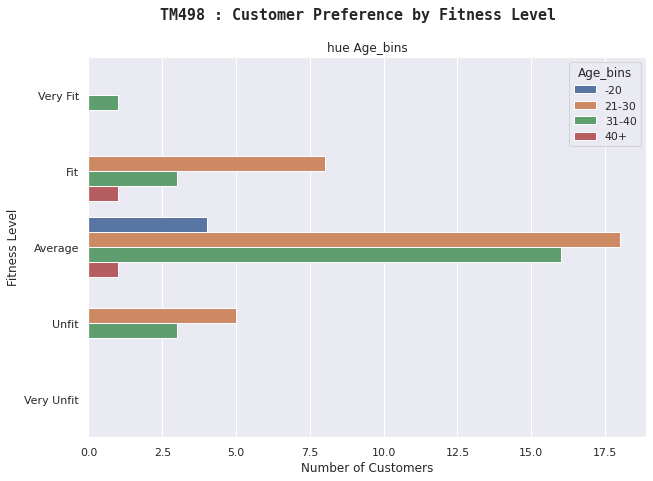

In [ ]:
#TM498 vs Fitness Level (Age_bins)

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

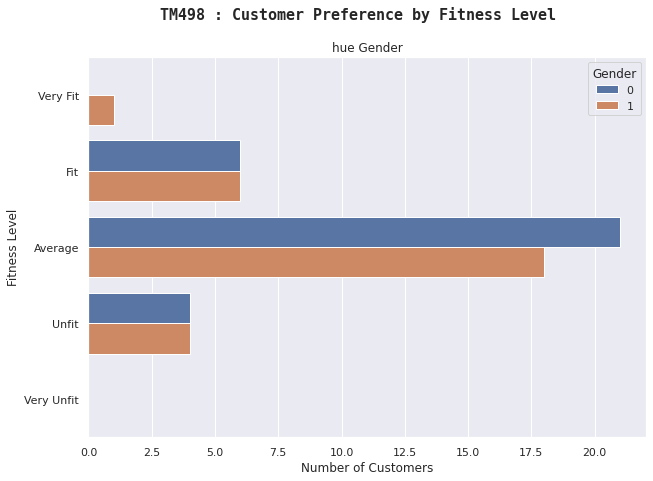

In [ ]:
#TM498 vs Fitness (Gender)

#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


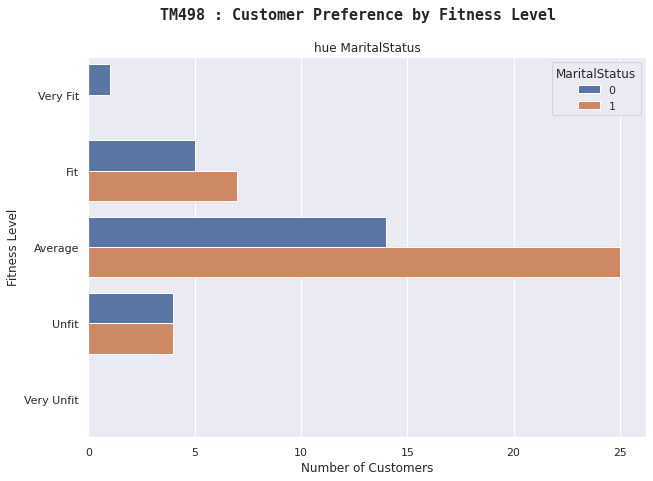

In [ ]:
#TM498 vs Fitness Level (Marital Status)

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

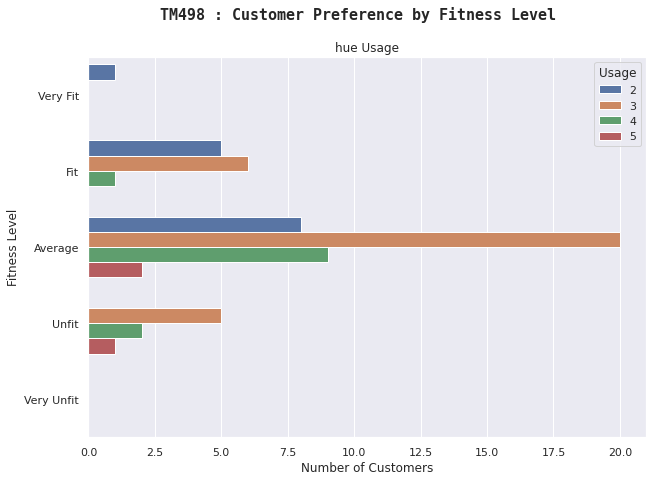

In [ ]:
#TM498 vs Fitness Level (Usage_)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

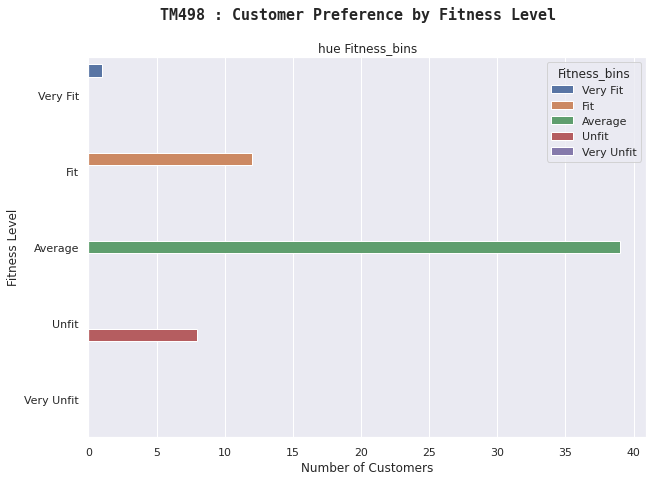

In [ ]:
#TM498 vs Fitness Level (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

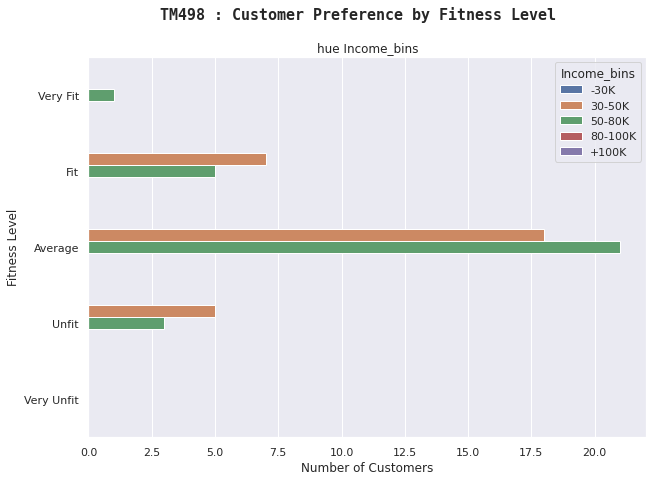

In [ ]:
#TM498 vs Fitness Level (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

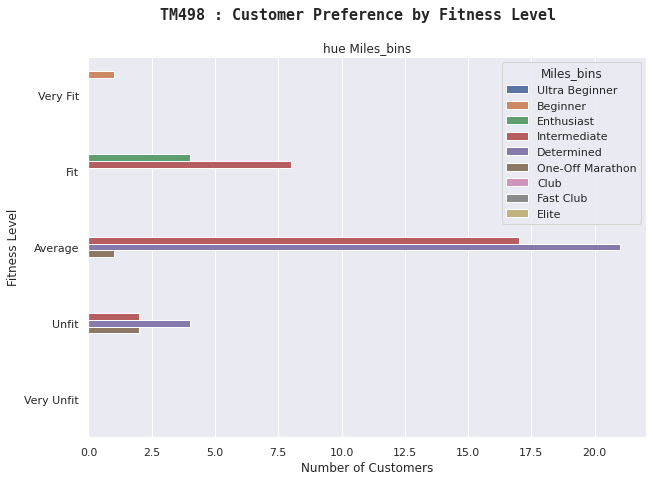

In [ ]:
#TM498 vs Fitness Level (Miles_bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Income Level"
labelx = "Number of Customers"
labely = "Income Level"
ay = "Income_bins"

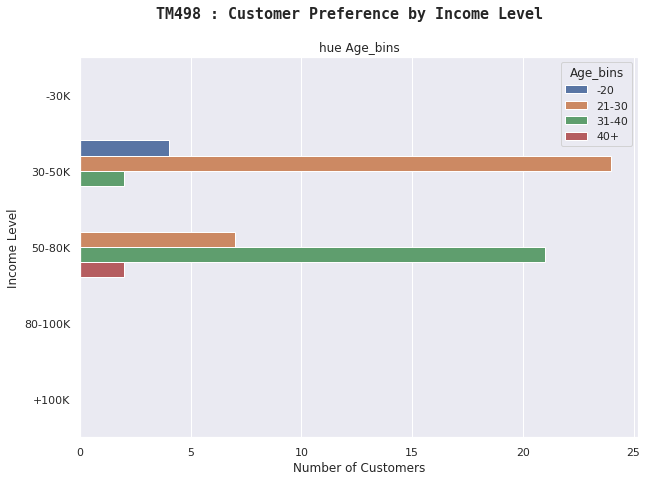

In [ ]:
#TM498 vs Income (Age_bins)

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

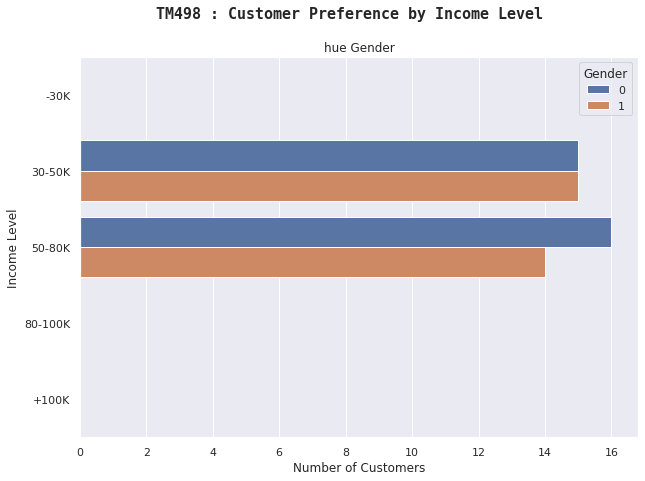

In [ ]:
#TM498 vs Income (Gender)

#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


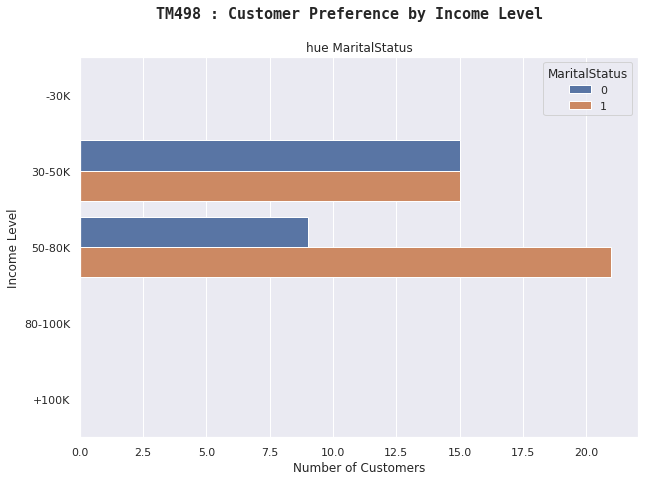

In [ ]:
#TM498 vs Income (Marital Status)

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

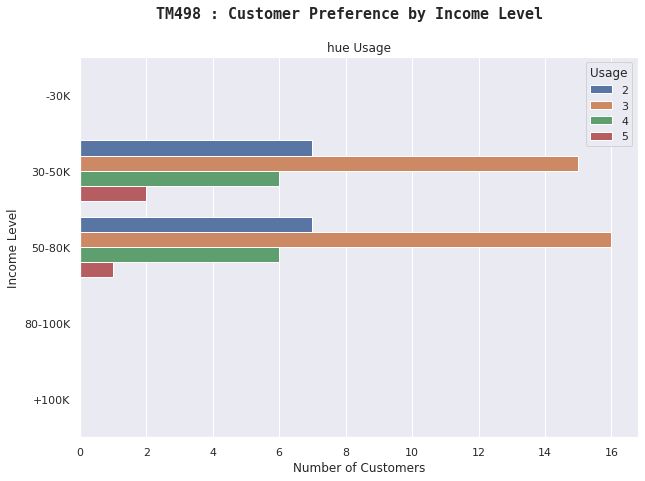

In [ ]:
#TM498 vs Income (Usage_)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

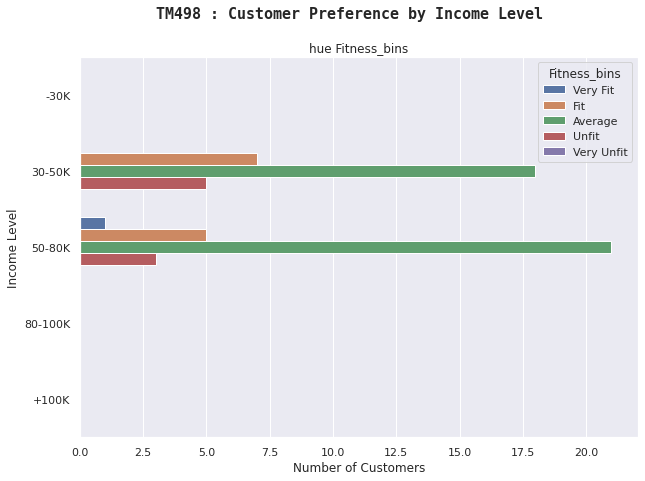

In [ ]:
#TM498 vs Income (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

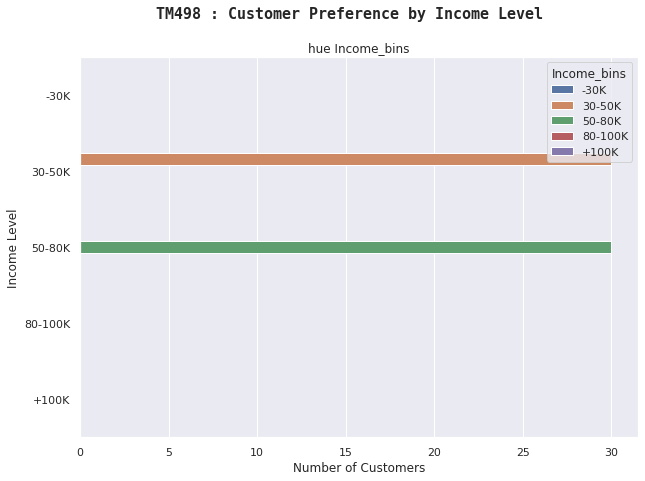

In [ ]:
#TM498 vs Income (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

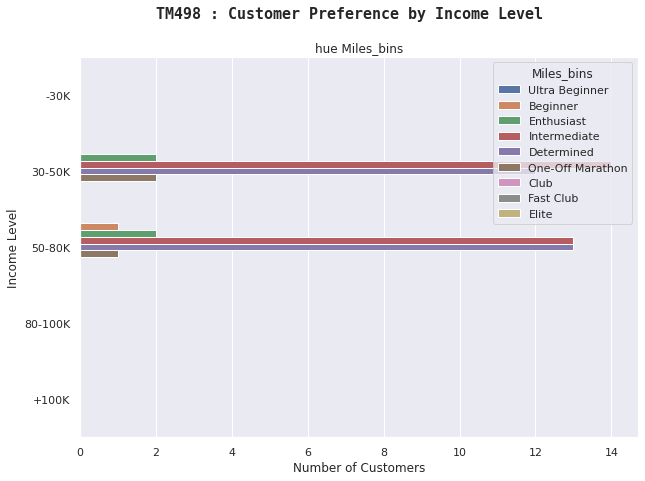

In [ ]:
#TM498 vs Income (Miles_bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Miles"
labelx = "Number of Customers"
labely = "Miles"
ay = "Miles_bins"

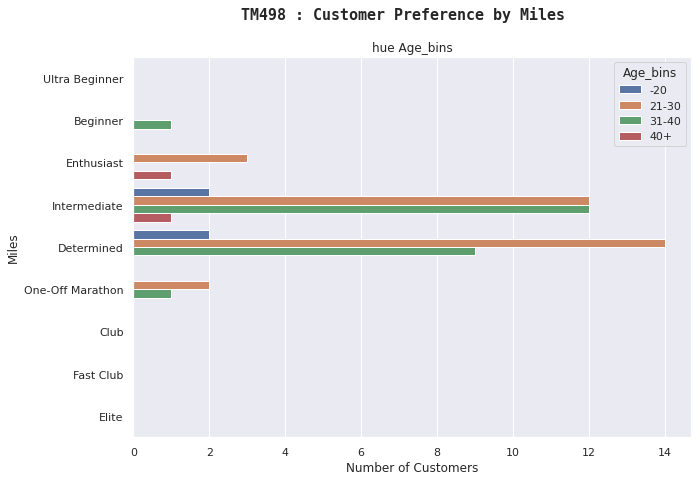

In [ ]:
#TM498 vs Miles (Age_bins)

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

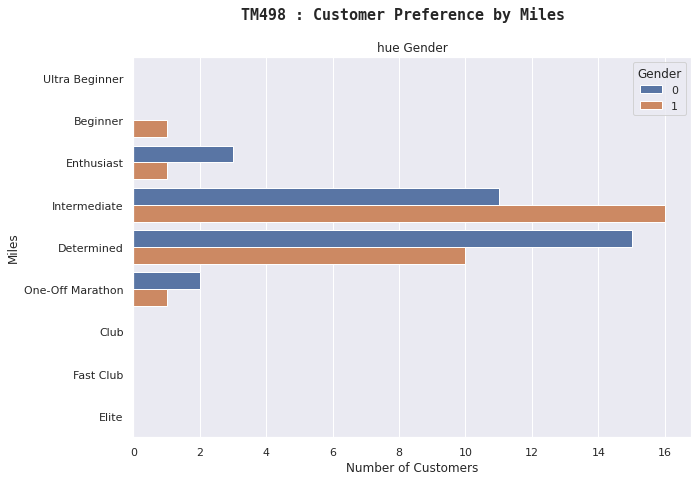

In [ ]:
#TM498 vs Miles (Gender)

#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


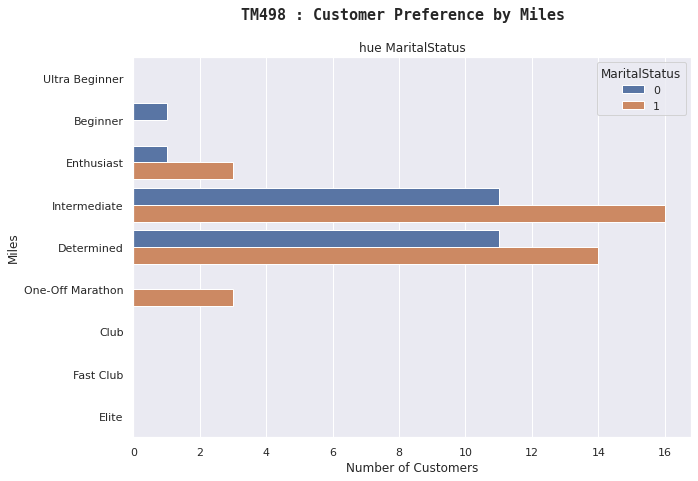

In [ ]:
#TM498 vs Miles (Marital Status)

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

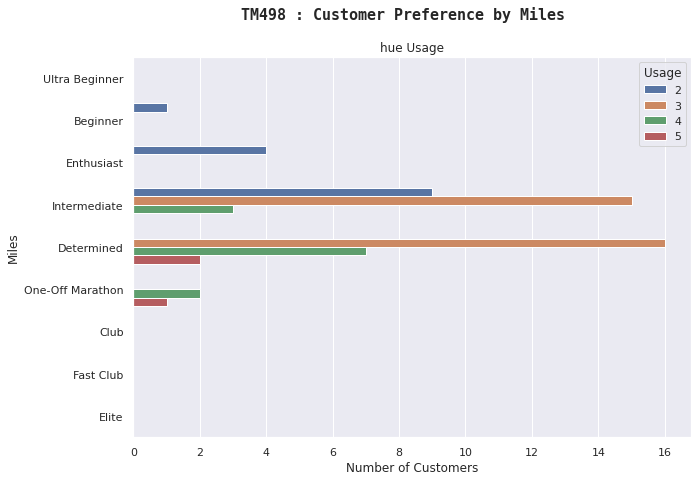

In [ ]:
#TM498 vs Miles (Usage_)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

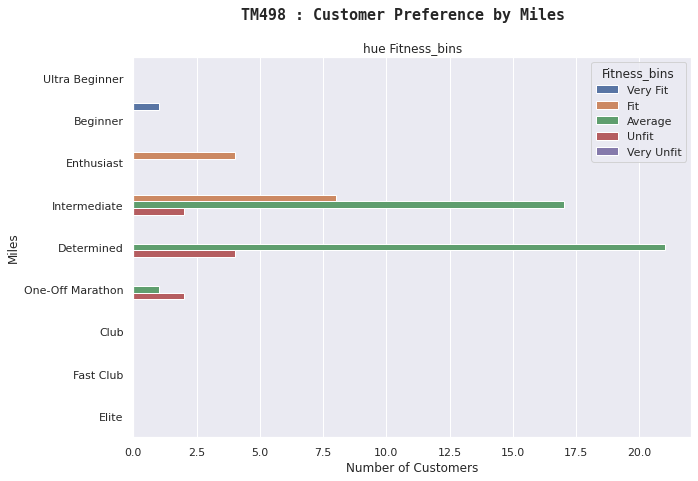

In [ ]:
#TM498 vs Miles (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

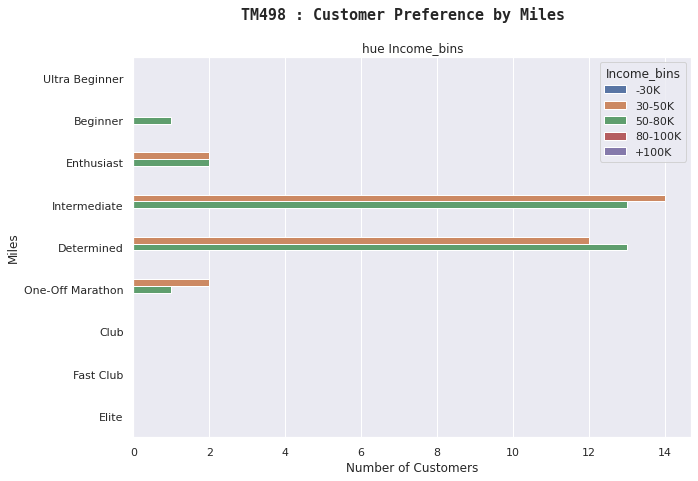

In [ ]:
#TM498 vs Miles (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

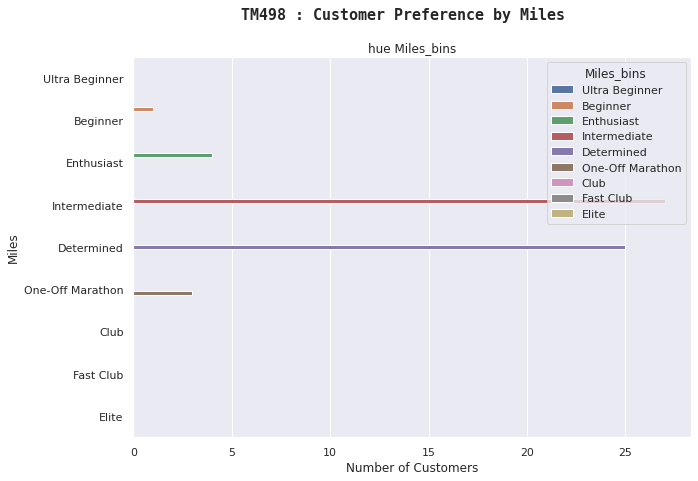

In [ ]:
#TM498 vs Miles (Miles_bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

------------------


##5.3 TM195

In [ ]:
#lets analyze TM195
modelno = "TM195"
tm_df = cardiodata_df.loc[cardiodata_df["Product"]== 0]

In [ ]:
#Common declarations
title = "Customer Preference by Age Groups"
labelx = "Number of Customers"
labely = "Age Group"
ay = "Age_bins"

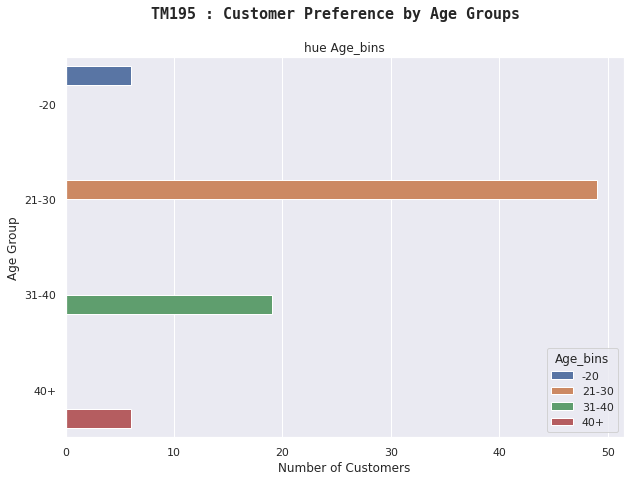

In [ ]:
#TM195 vs Age 

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

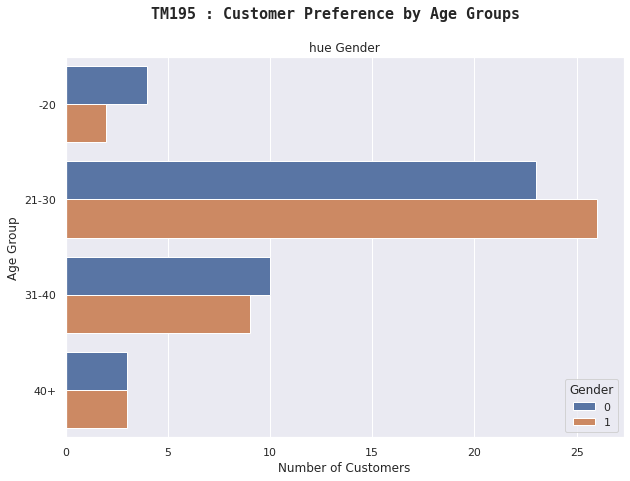

In [ ]:
#TM195 vs Age (Gender)

#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

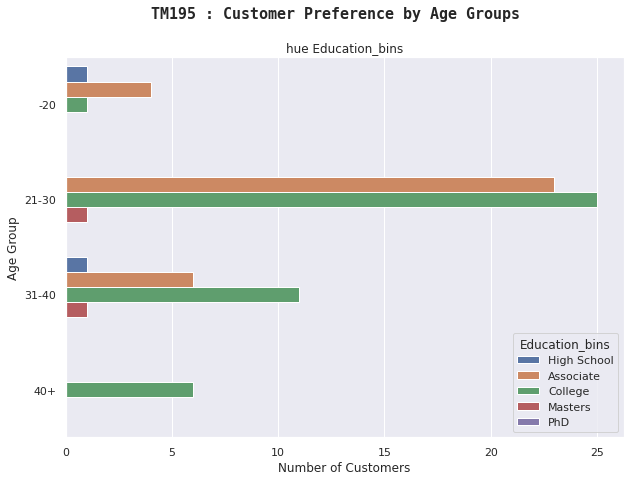

In [ ]:
#TM195 vs Age (Education_bins)

#hue declaration
hueselect = "Education_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In the age Group of 21-30, most customers have a College degree or an Associate degree.

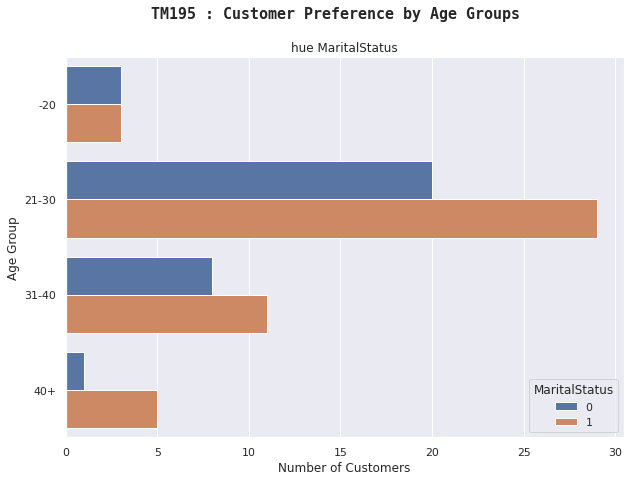

In [ ]:
#TM195 vs Age (MaritalStatus)

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

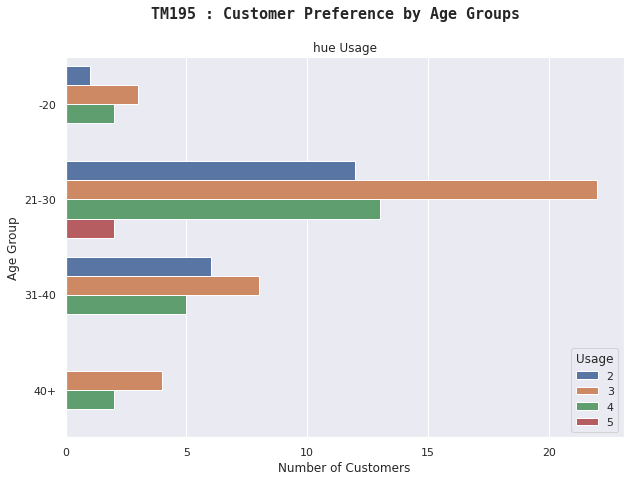

In [ ]:
#TM195 vs Age (Usage)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

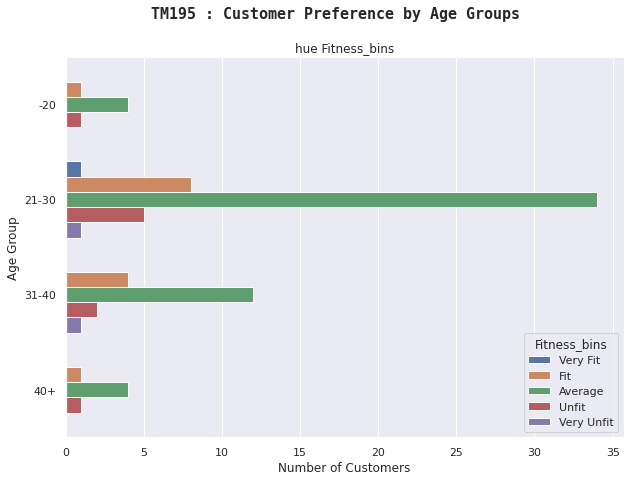

In [ ]:
#TM195 vs Age (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

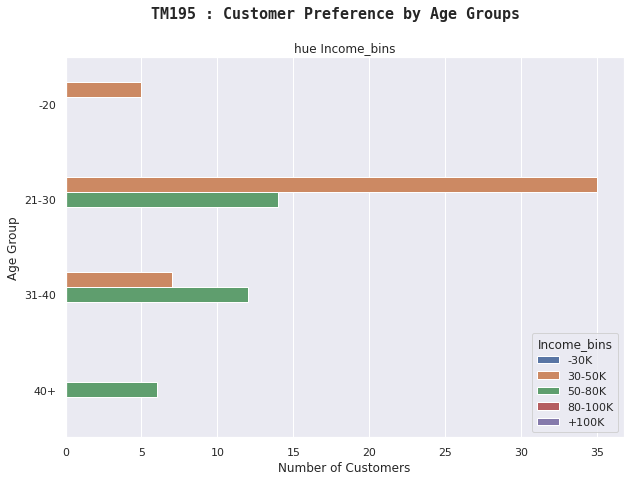

In [ ]:
#TM195 vs Age (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

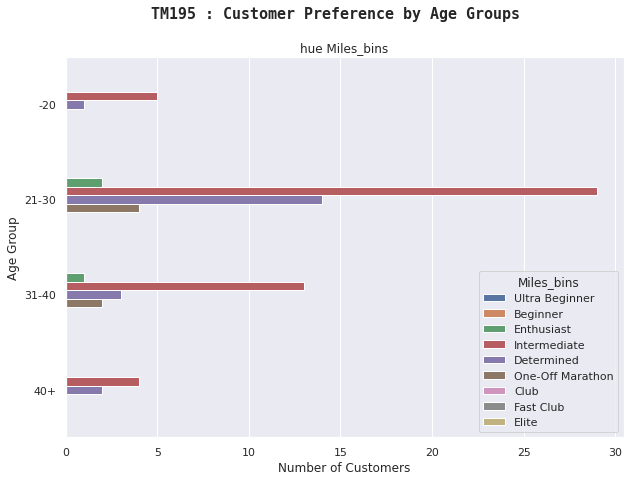

In [ ]:
#TM195 vs Age (Miles_bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Gender"
labelx = "Number of Customers"
labely = "Gender"
ay = "Gender"

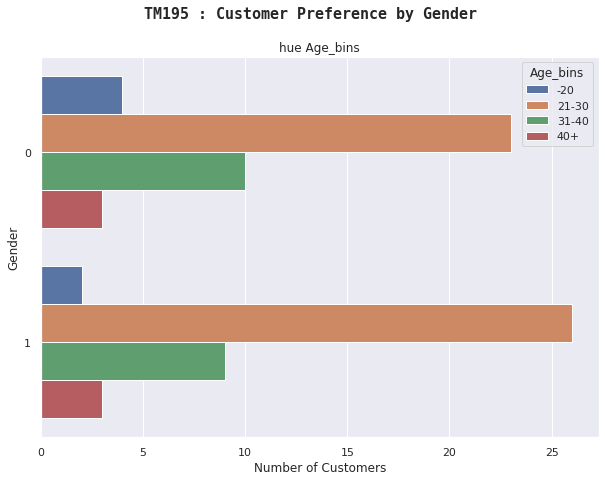

In [ ]:
#TM195 vs Gender (Age_bins)

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='bottom right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

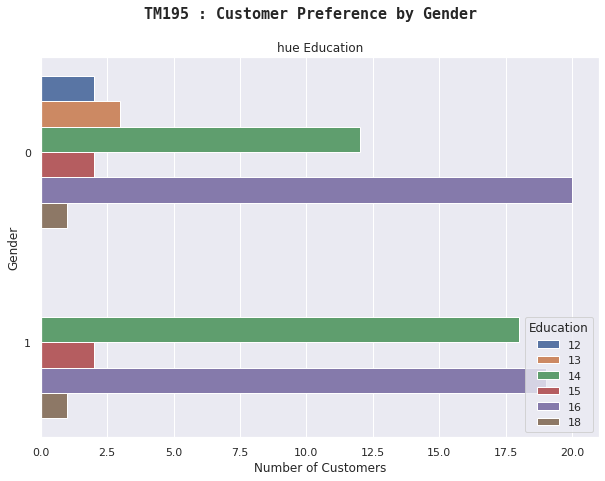

In [ ]:
#TM195 vs Gender (Education)

#hue declaration
hueselect = "Education"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


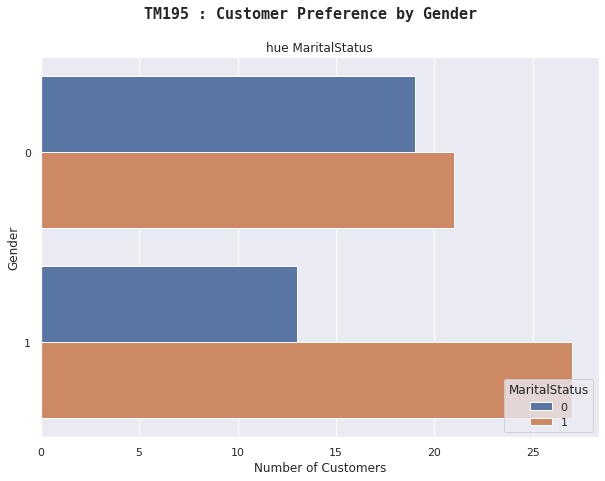

In [ ]:
#TM195 vs Gender (MaritalStatus)

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

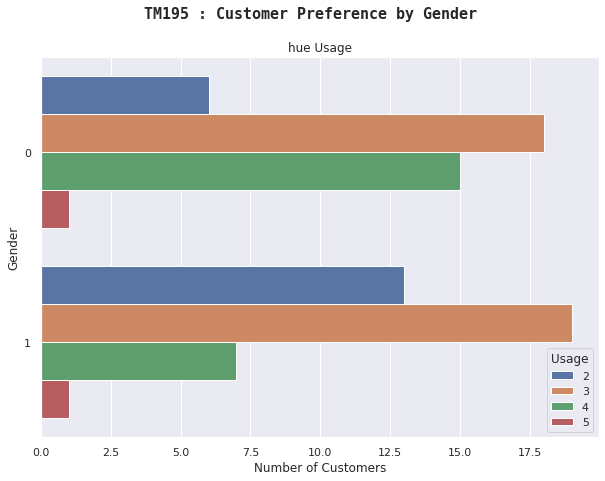

In [ ]:
#TM195 vs Gender (Usage)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

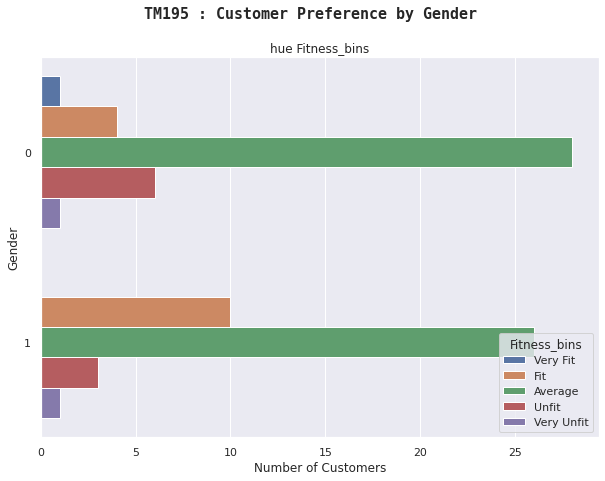

In [ ]:
#TM195 vs Gender (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

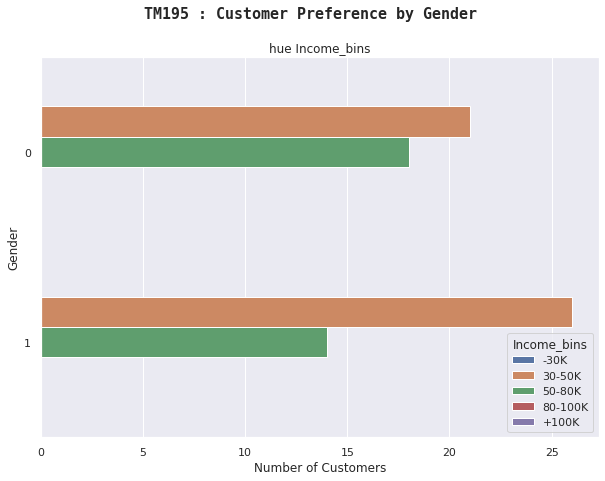

In [ ]:
#TM195 vs Gender (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

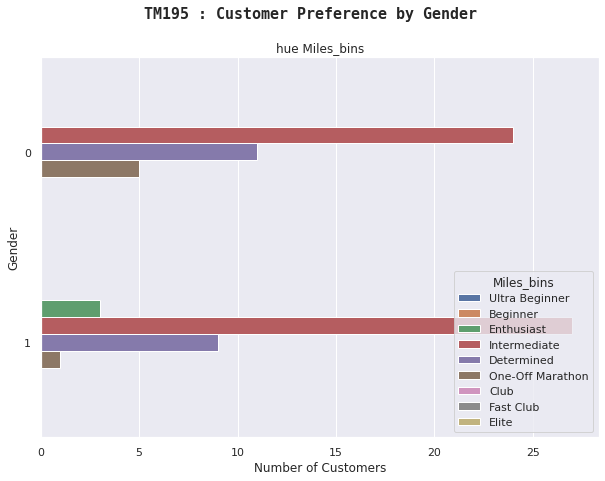

In [ ]:
#TM195 vs Gender (Miles bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='lower right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Education Level"
labelx = "Number of Customers"
labely = "Education Level"
ay = "Education_bins"

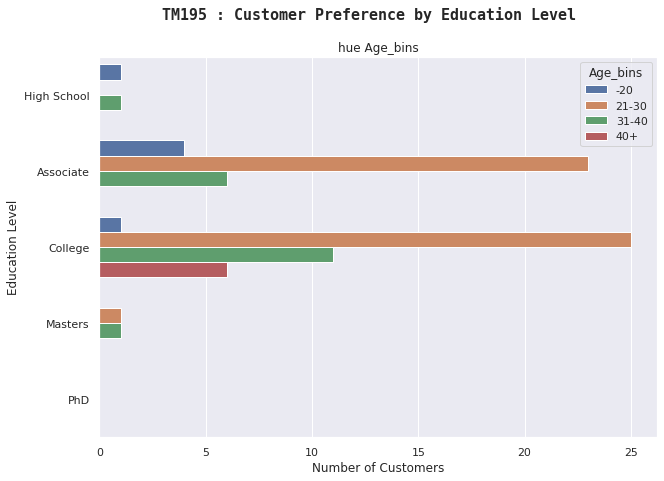

In [ ]:
#TM195 vs Education (Age_bins)

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

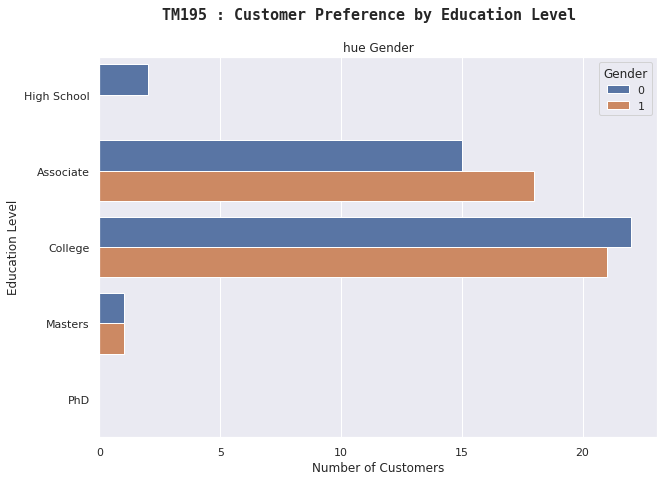

In [ ]:
#TM195 vs Education (Gender)

#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


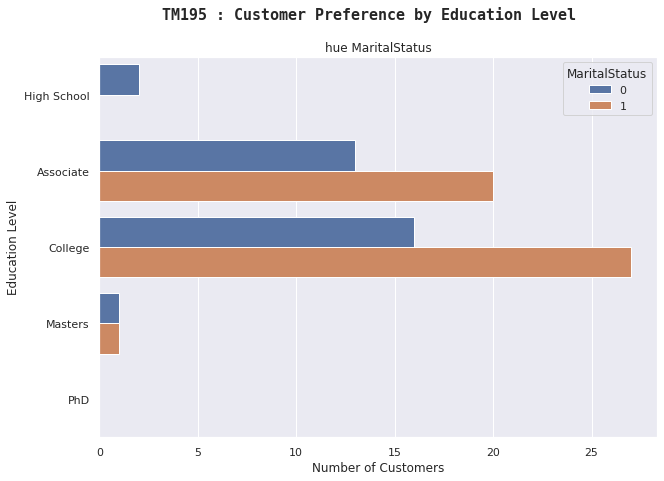

In [ ]:
#TM195 vs Education (Marital Status)

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

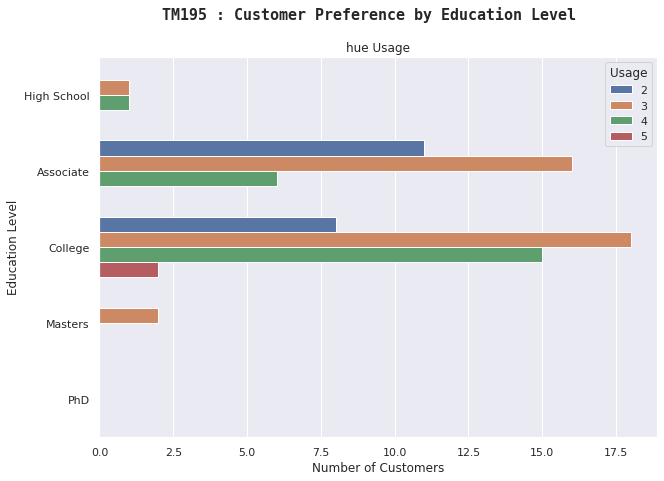

In [ ]:
#TM195 vs Education (Usage_)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

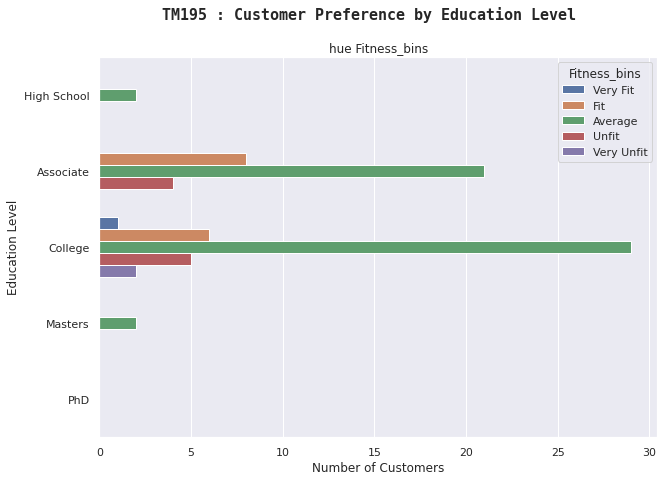

In [ ]:
#TM195 vs Education (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

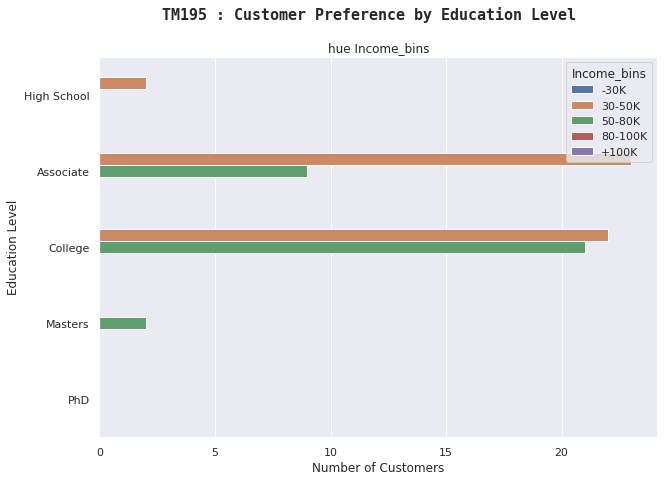

In [ ]:
#TM195 vs Education (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

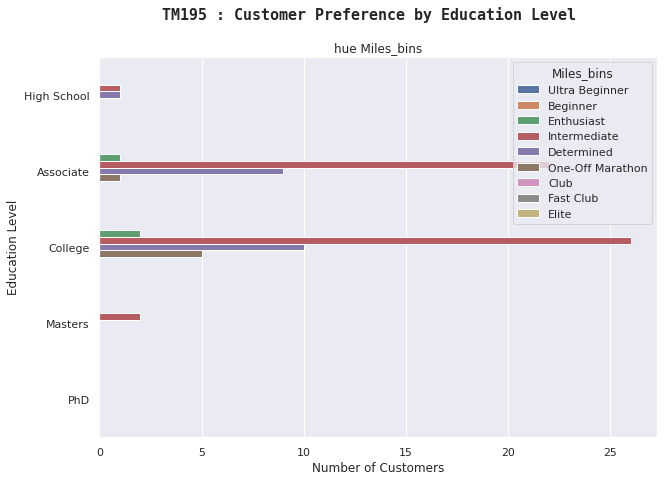

In [ ]:
#TM195 vs Education (Miles_bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Marital Status"
labelx = "Number of Customers"
labely = "MaritalStatus"
ay = "MaritalStatus"

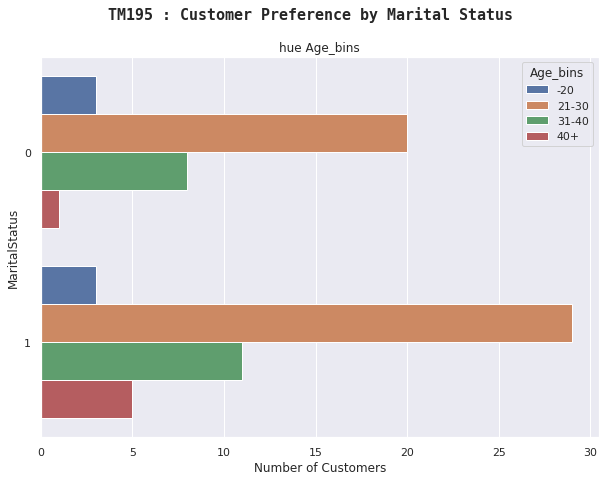

In [ ]:
#TM195 vs Gender (Age bins)

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

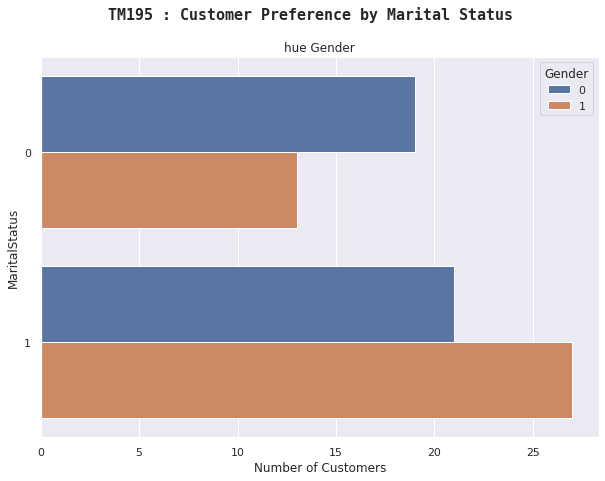

In [ ]:
#TM195 vs Marital Status (Gender)

#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

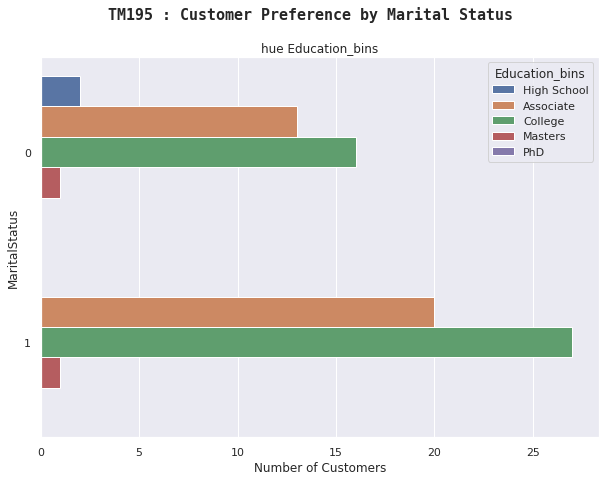

In [ ]:
#TM195 vs Marital Status (Education_bins)

#hue declaration
hueselect = "Education_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

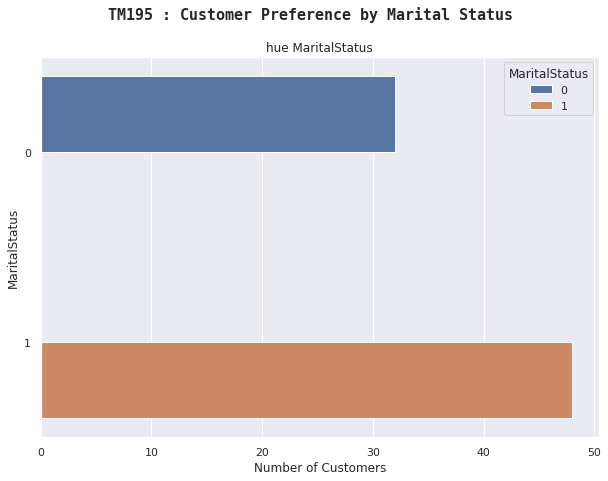

In [ ]:
#TM195 vs Marital Status 

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

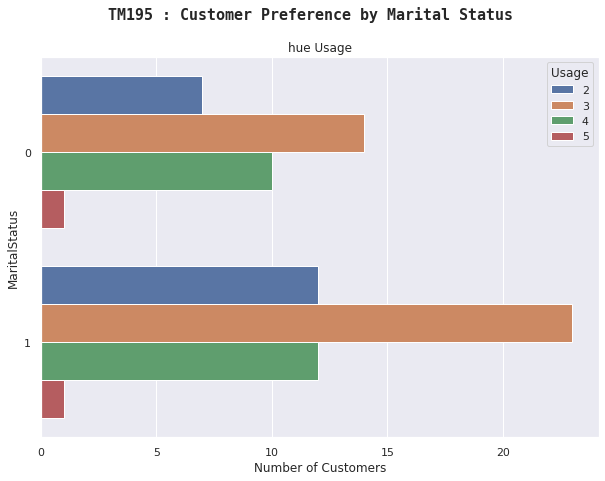

In [ ]:
#TM195 vs Marital Status (Usage)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

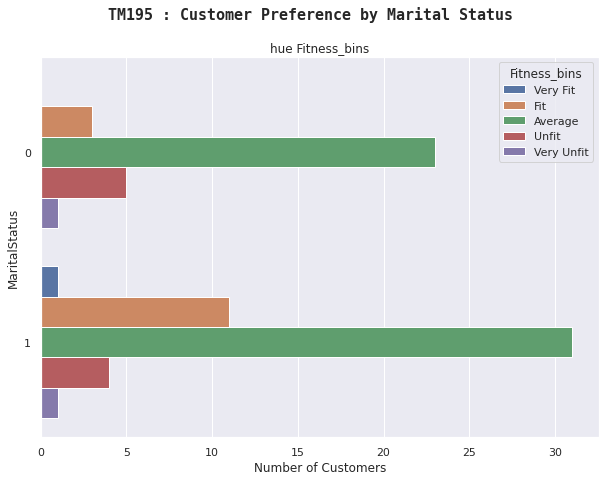

In [ ]:
#TM195 vs Marital Status (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

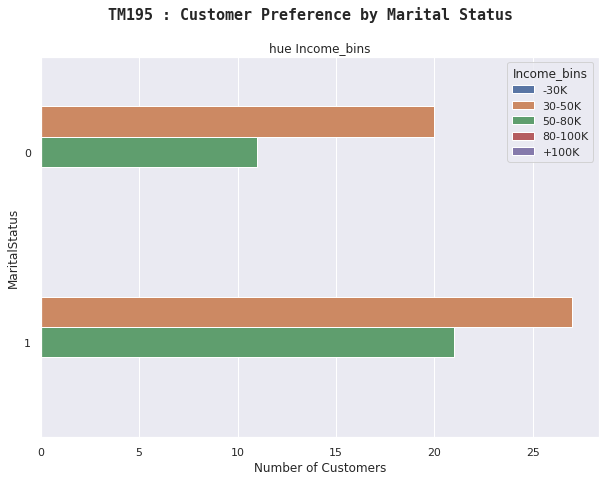

In [ ]:
#TM195 vs Marital Status (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

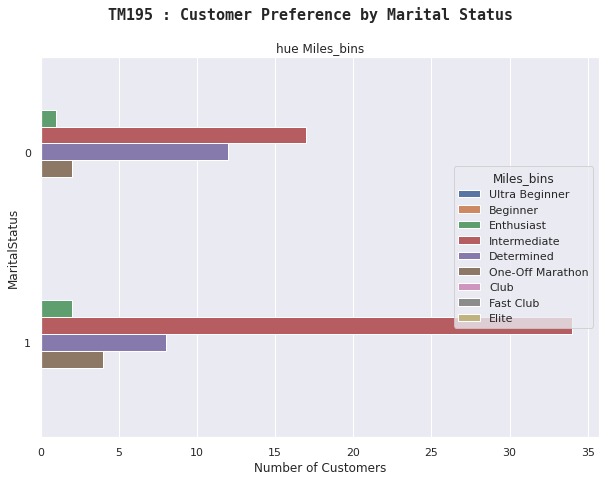

In [ ]:
#TM195 vs Marital Status (Miles_bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='center right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Usage"
labelx = "Number of Customers"
labely = "Usage (Times/week)"
ay = "Usage"

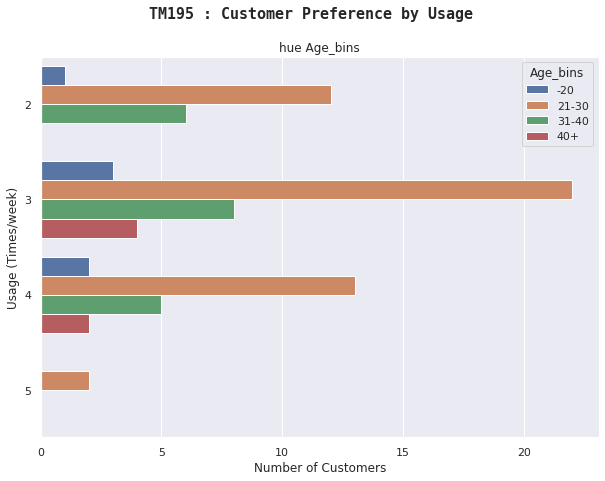

In [ ]:
#TM195 vs Usage (Age_bins)

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

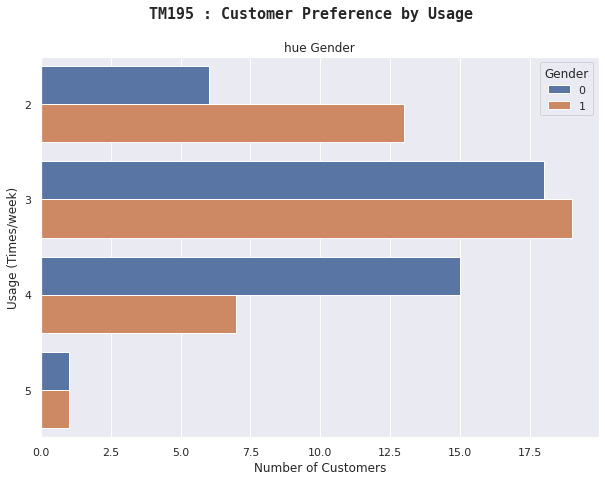

In [ ]:
#TM195 vs Usage (Gender)

#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


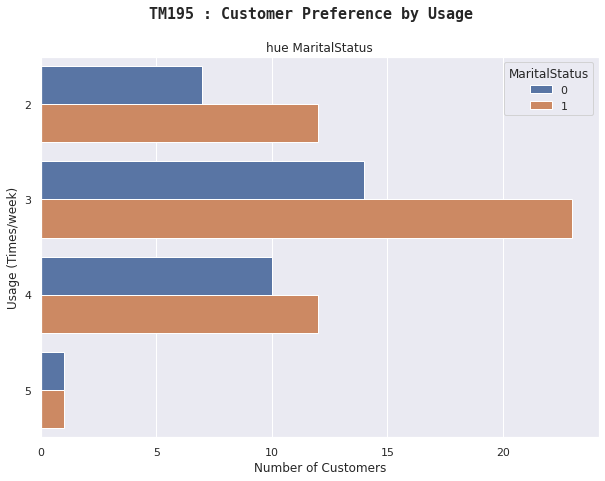

In [ ]:
#TM195 vs Usage (Marital Status)

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

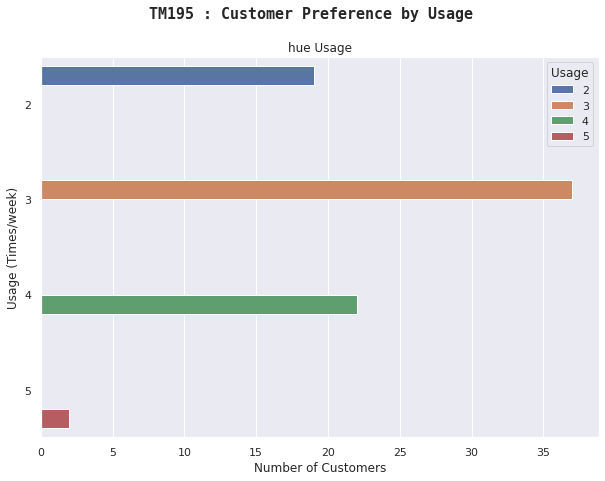

In [ ]:
#TM195 vs Usage (Usage_)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

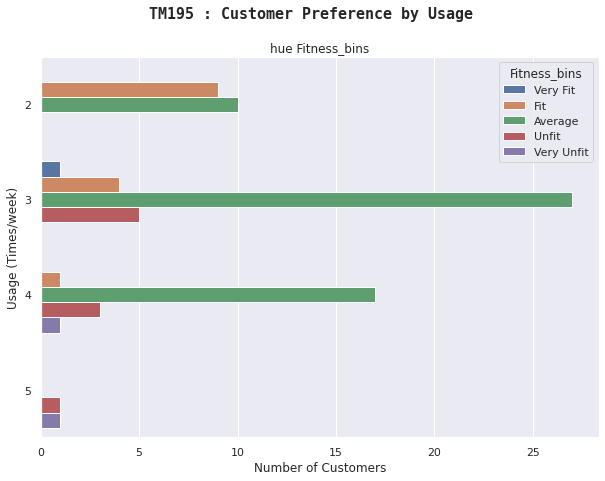

In [ ]:
#TM195 vs Usage (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

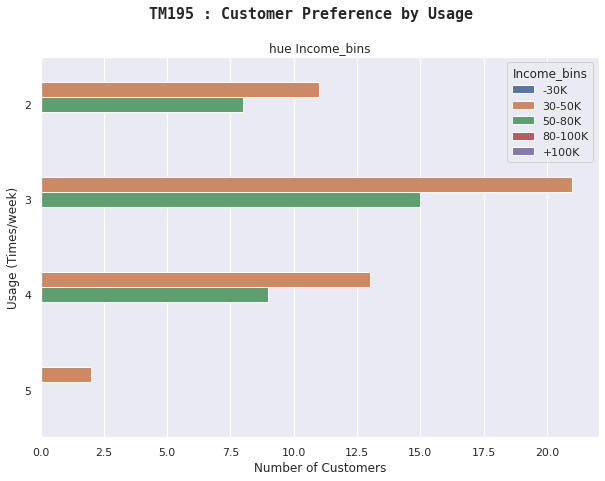

In [ ]:
#TM195 vs Usage (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

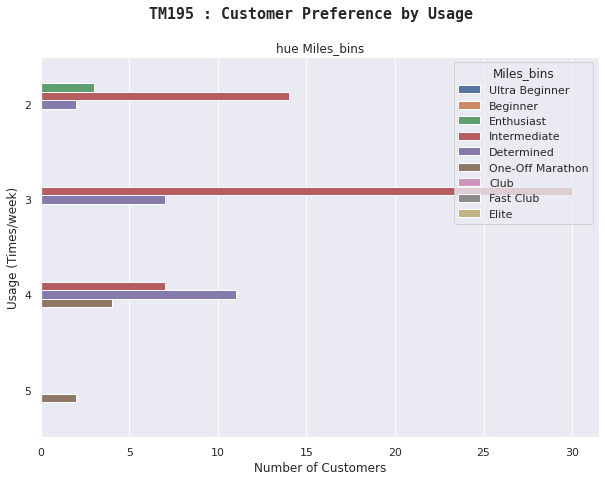

In [ ]:
#TM195 vs Usage (Miles_bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Fitness Level"
labelx = "Number of Customers"
labely = "Fitness Level"
ay = "Fitness_bins"

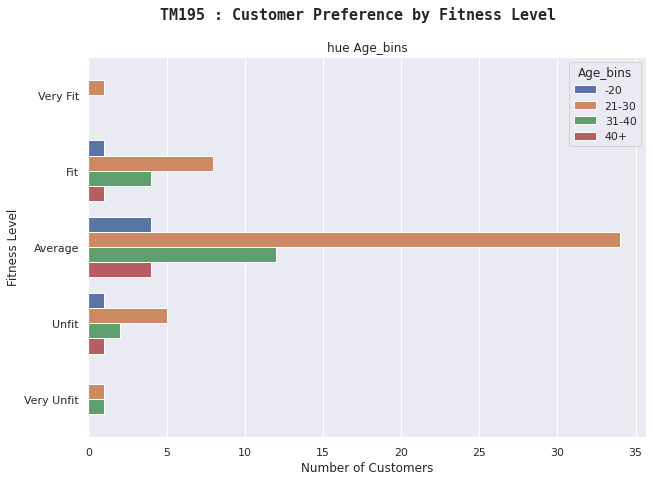

In [ ]:
#TM195 vs Fitness Level (Age_bins)

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

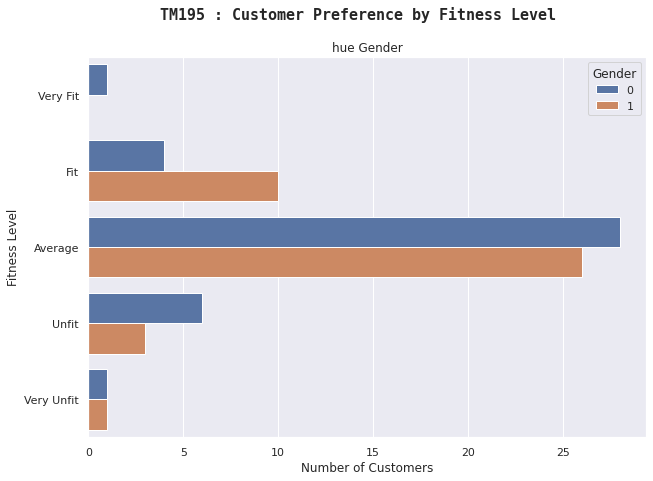

In [ ]:
#TM195 vs Fitness (Gender)

#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


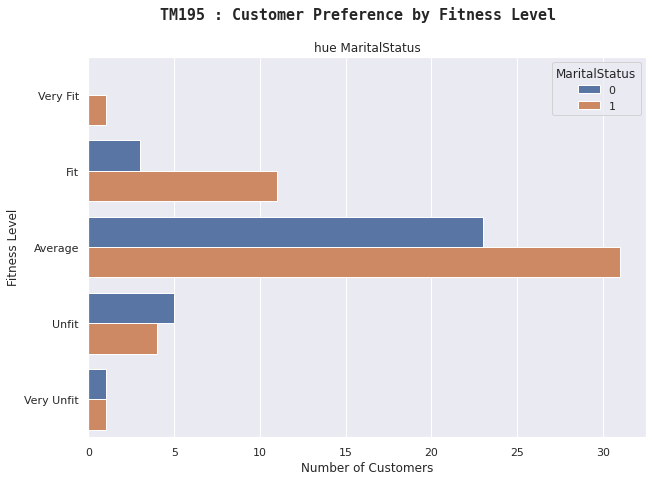

In [ ]:
#TM195 vs Fitness Level (Marital Status)

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

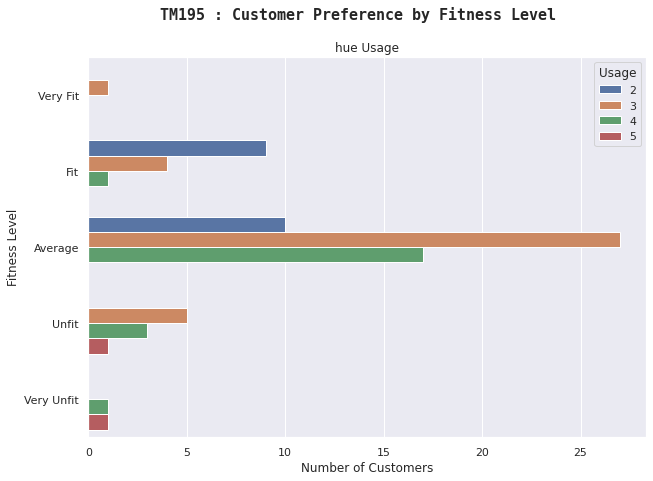

In [ ]:
#TM195 vs Fitness Level (Usage_)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

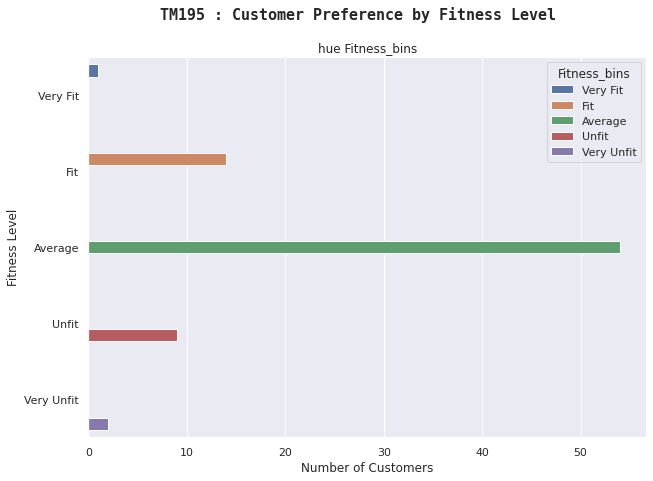

In [ ]:
#TM195 vs Fitness Level (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

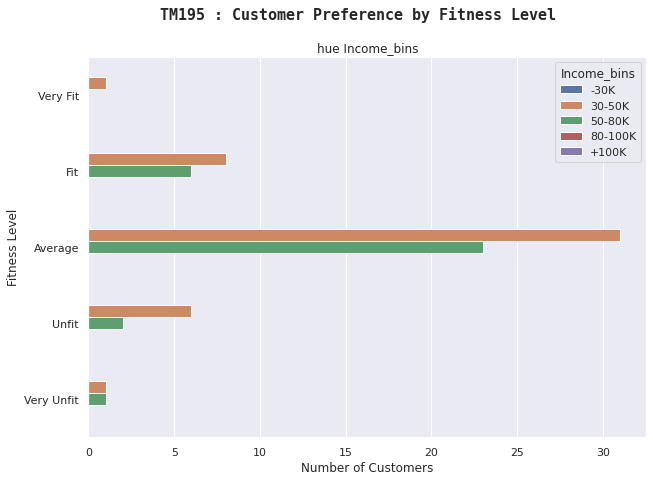

In [ ]:
#TM195 vs Fitness Level (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

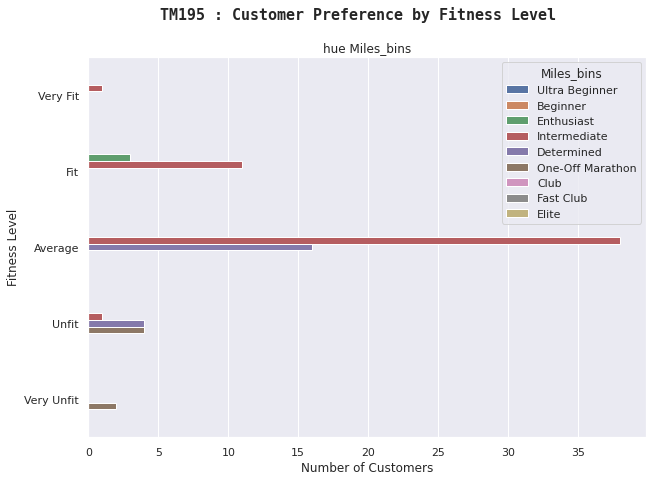

In [ ]:
#TM195 vs Fitness Level (Miles_bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Income Level"
labelx = "Number of Customers"
labely = "Income Level"
ay = "Income_bins"

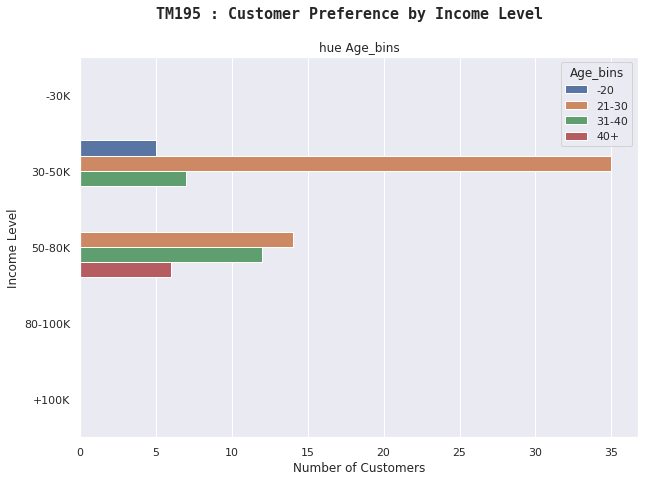

In [ ]:
#TM195 vs Income (Age_bins)

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

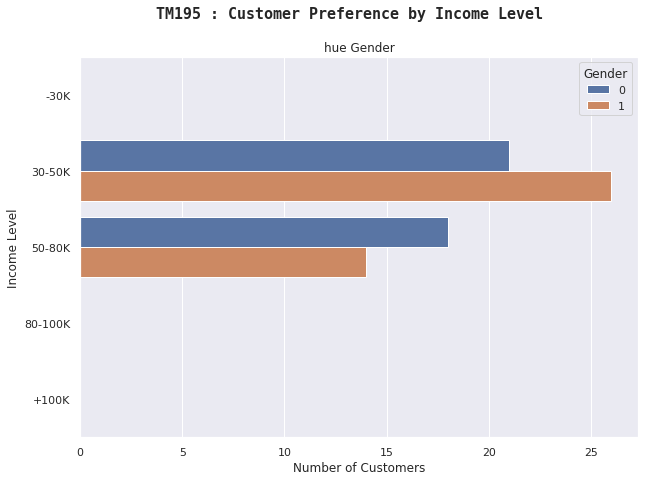

In [ ]:
#TM195 vs Income (Gender)

#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


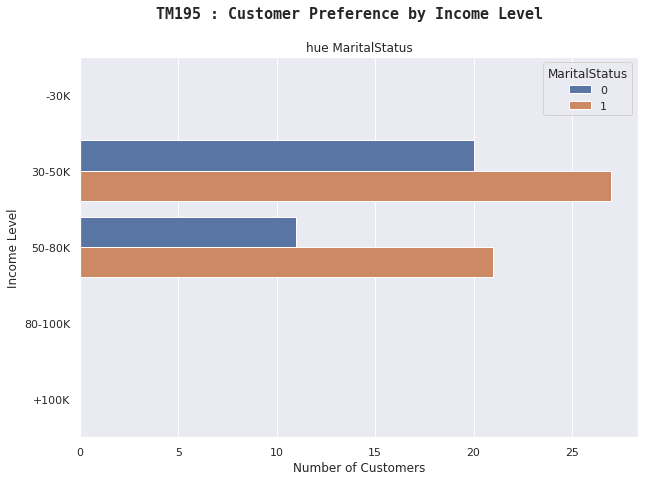

In [ ]:
#TM195 vs Income (Marital Status)

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

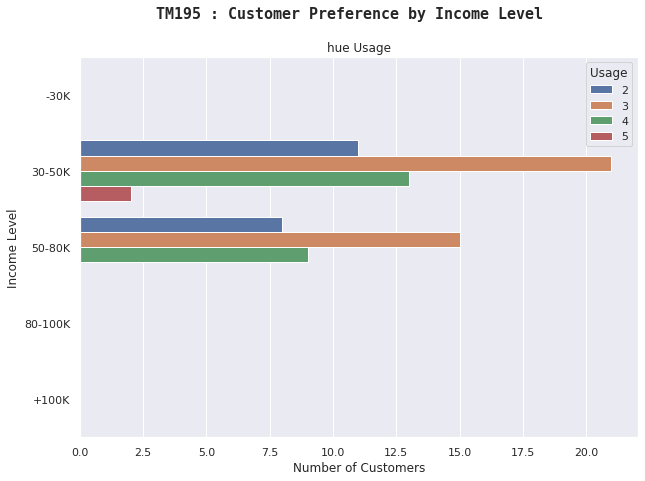

In [ ]:
#TM195 vs Income (Usage_)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

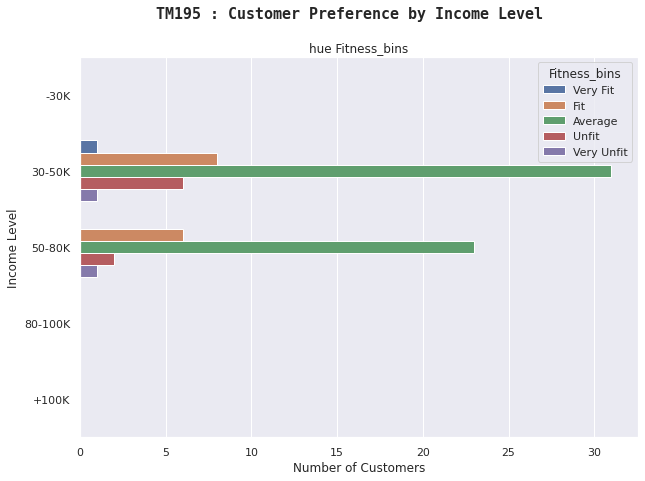

In [ ]:
#TM195 vs Income (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

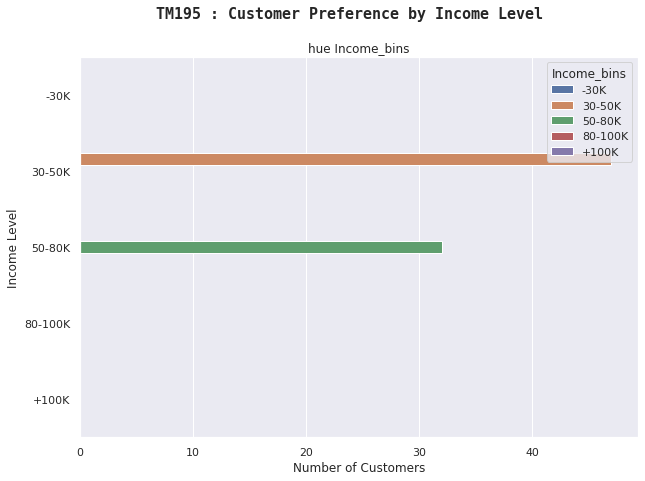

In [ ]:
#TM195 vs Income (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

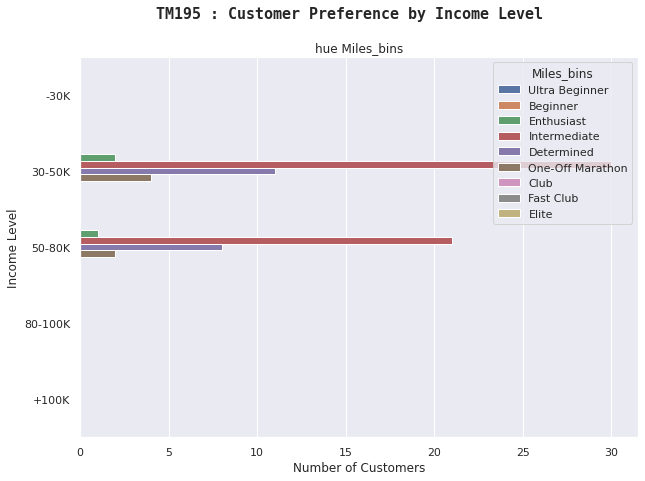

In [ ]:
#TM195 vs Income (Miles_bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

In [ ]:
#Common declarations
title = "Customer Preference by Miles"
labelx = "Number of Customers"
labely = "Miles"
ay = "Miles_bins"

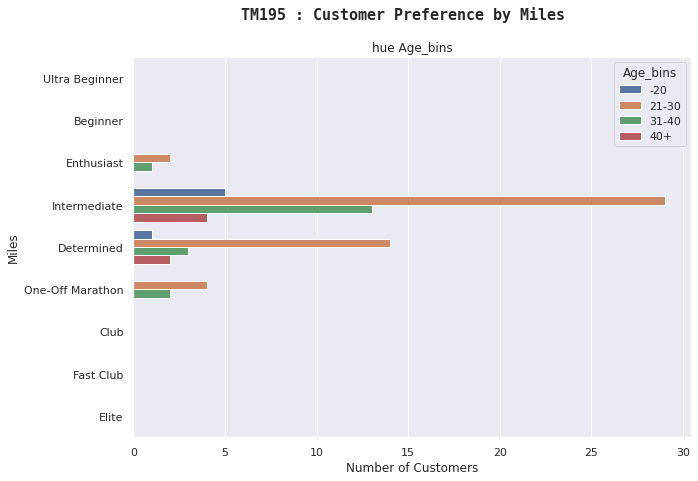

In [ ]:
#TM195 vs Miles (Age_bins)

#hue declaration
hueselect = "Age_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

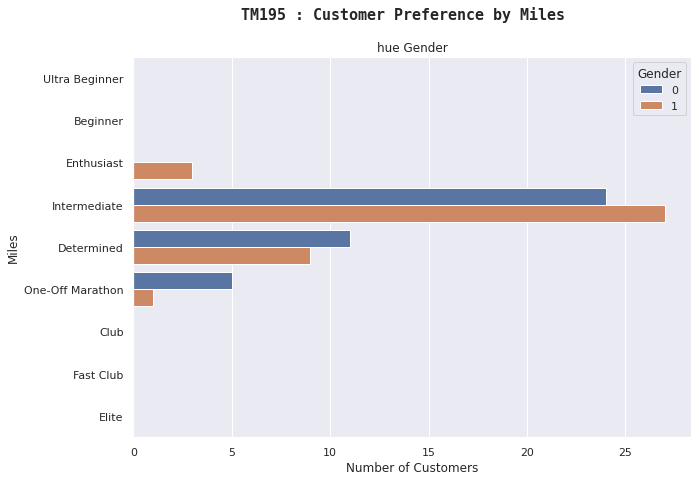

In [ ]:
#TM195 vs Miles (Gender)

#hue declaration
hueselect = "Gender"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()


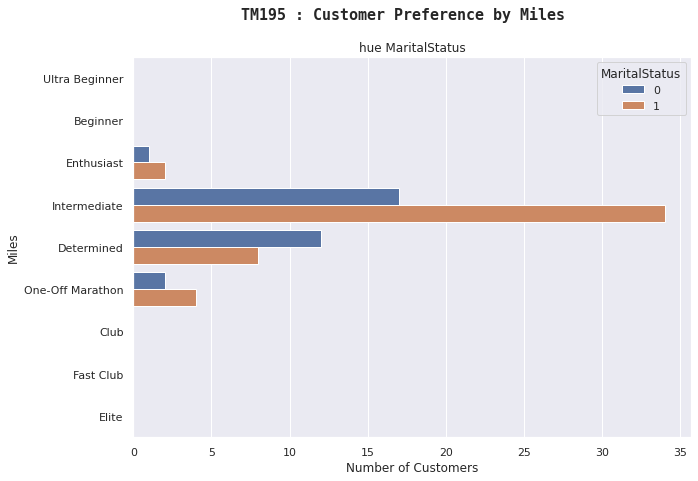

In [ ]:
#TM195 vs Miles (Marital Status)

#hue declaration
hueselect = "MaritalStatus"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

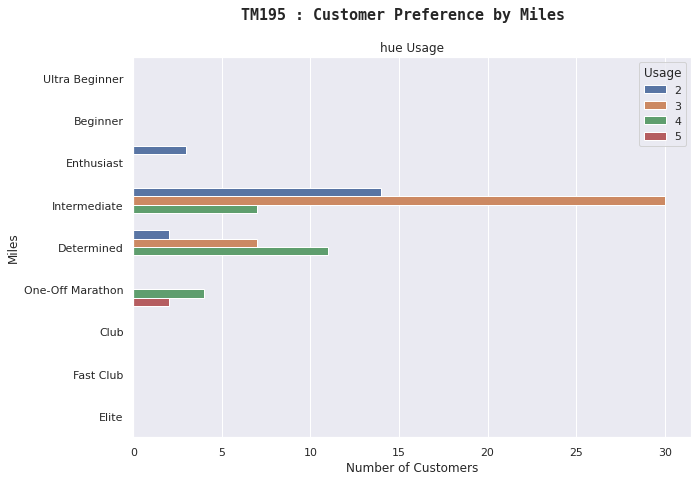

In [ ]:
#TM195 vs Miles (Usage_)

#hue declaration
hueselect = "Usage"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

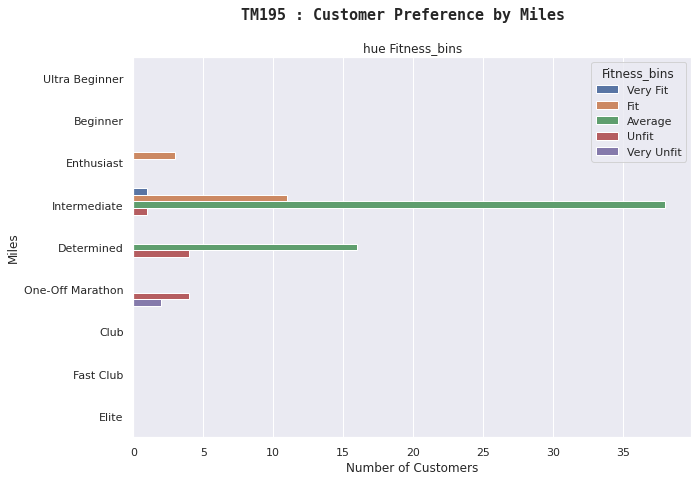

In [ ]:
#TM195 vs Miles (Fitness_bins)

#hue declaration
hueselect = "Fitness_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

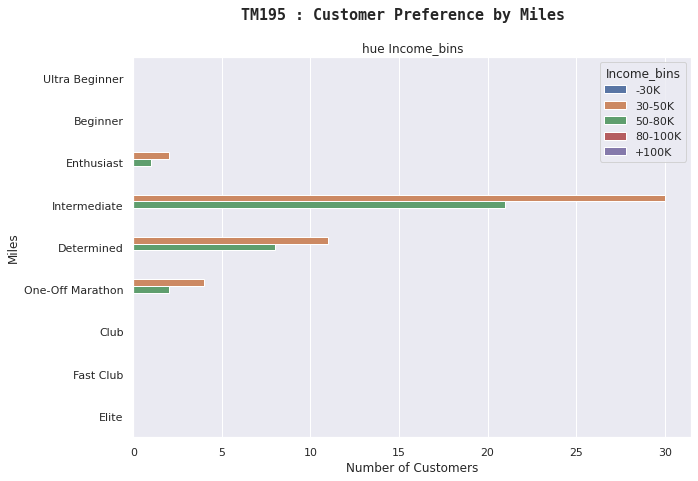

In [ ]:
#TM195 vs Miles (Income_bins)

#hue declaration
hueselect = "Income_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

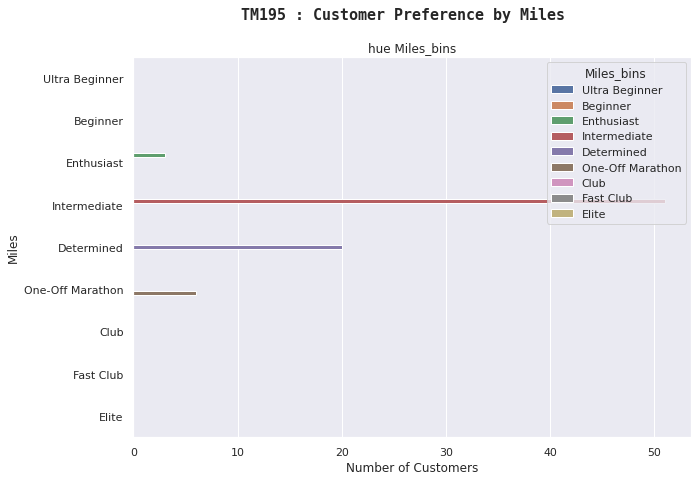

In [ ]:
#TM195 vs Miles (Miles_bins)

#hue declaration
hueselect = "Miles_bins"

#sets the size of the plot
fig, ax = plt.subplots(figsize = (10,7))

#sets the plot type and properties
sns.countplot(data=tm_df, y = ay, ax=ax, hue=hueselect)

#displays the main title of the plot and properties
plt.suptitle(modelno + " : " + title, fontsize=15, fontweight='bold', family='monospace')

#displays the sub-title of the plot and properties
plt.title("hue "+hueselect)

#puts the legend in the upper right corner
plt.legend(loc='upper right', title=hueselect)

#displays the x axis label we defined
plt.xlabel(labelx)

#displays the y axis label we defined
plt.ylabel(labely)

#displays the plot
plt.show()

##6 3-D Multivariate Analysis

In [ ]:
#import 3D visualization library
import plotly.express as px

In [ ]:
#plot scatter 3D

fig_3d = px.scatter_3d(cardiodata_df,x='Product',y='Income',z='Usage')
fig_3d.show()

#Note: 0: TM195, 1: TM498, 2: TM798


here we can see that Customers that say they will use the machine more times a week, prefer Product 2 TM798.

In [ ]:
#plot 3D scatter plot between miles, income, product
fig_3d = px.scatter_3d(cardiodata_df,x='Product',y='Income',z='Miles')
fig_3d.show()
#Note: 0: TM195, 1: TM498, 2: TM798

you can see that Product 2 TM798 is the one customers with the highest income prefer.

In [ ]:
#plot 3D Scatter plot between Education, Income and Product
fig_3d = px.scatter_3d(cardiodata_df,x='Product',y='Income',z='Education')
fig_3d.show()
#Note: 0: TM195, 1: TM498, 2: TM798

You can see that Product 2 TM798 is the one customers with the highest level of education prefer.

In [ ]:
#plot 3D Catter between Fitness, Education and Product
fig_3d = px.scatter_3d(cardiodata_df,x='Product',y='Fitness',z='Education')
fig_3d.show()
#Note: 0: TM195, 1: TM498, 2: TM798

Here the customers that are most unfit (5), most educated, prefer product 2 TM798. 

3D scatter plots allow us to see the relationships between m3 features.

Seaborn Multivariable Relationships

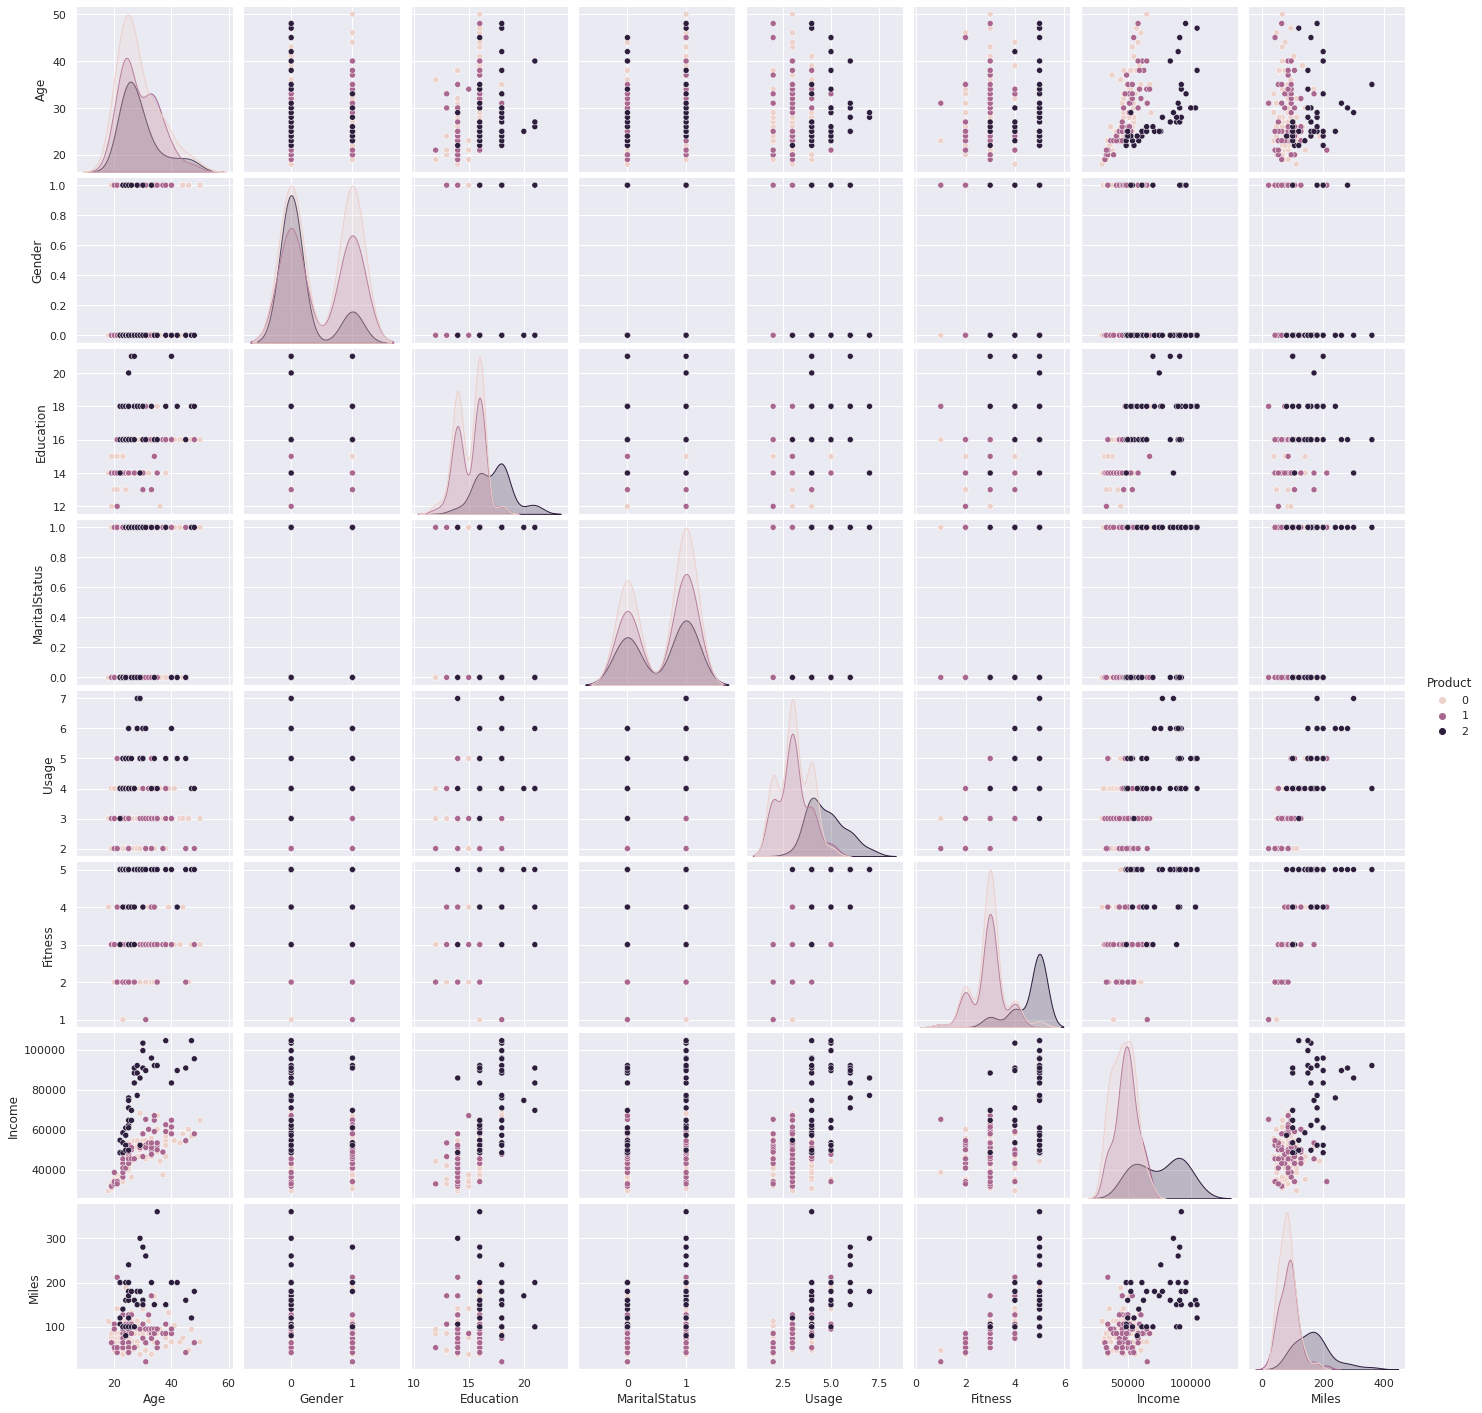

In [ ]:
#produce seaborn pairplots
sns.pairplot(data=cardiodata_ndf, hue='Product', size=2.5);

##6.Conclusions and Recommendations

##1. Customer Profile of Cardio Shop

General Profile

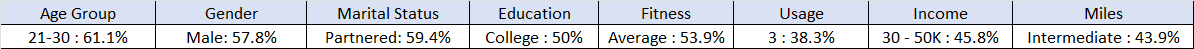


The profile of Good Cardio Fitness customer is:
- Young, mostly in the age group 21-30
- Mostly Male
- Mostly Partnered
- College Educated
- Average Fit
- Use of 3 times/week
- Low Middle Income (30-50K)
- Runner (miles) is intermediate  

2.  Customer Profile per Customer

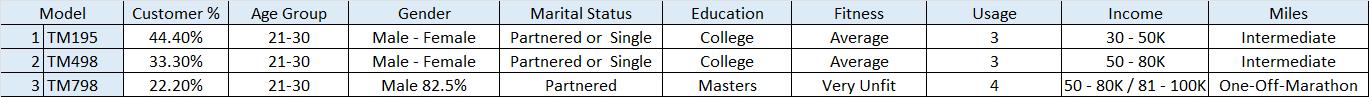



The profile of customers per models:

TM195

- Most Popular
- Young, 21-30 age group
- Equally Popular between male and female customers
- Could be Partnered or Single customers
- College Educated
- Uses the treadmill 3 times per week
- Income is medium low (30-50K)
- Runner type (miles) is Intermediate


TM498

- Second most popular
- Young, 21-30 age group
- Equally Popular between male and female customers
- Could be Partnered or Single customers
- College Educated
- Uses the treadmill 3 times per week
- Income is medium low (30-50K)
- Runner type (miles) is Intermediate


TM798

- Least popular
- Young, 21-30 age group
- Overwhelmingly Male customers
- Partnered customers
- Popular with Master Degree customers or higher
- Mostly very unfit customers
- Uses the treadmill 4 times per week
- Higher income than all others (50 - 100K)
- Runner type (miles) is one-off marathon (pretendes to run more than others)

##2. Insights

- Customer's Age,  Gender, Marital Status are not important factors to determine model customer model preference.
- Income is the most important factor that determines customer model preference.
- Fitness, Miles (Runner Type), Usage, and Education are other important factors that influence the customer's model preference.
- Treadmill Customers are college educated.
- Most customers that buy a treadmill, may use it with a partner.
- The TM798 is the most expensive model of the three, and the TM195, the least expensive.
- TM798 is preferred by very unfit customers.
- The most educated customers prefer the TM798.
- Very unfit and unfit customers project to run more miles (runner type: One-off marathon), and say that they will use the machine most times a week.
- Customers with lower incomes prefer the TM195.
- There is a 11.1% increase on sales from the cheapest model, to the intermediate model and also 11.1% from the intermediate model and the most expensive model. This can't be just a coincidence. Further analysis may show that this may be linked to a model sales quota.



##4. Recommendations

4.1 Offer the TM798 to the customers with the highest income, better education, and those who are most unfit. Customers that are most unfit seem to believe that buying the TM798 which we have concluded that it is the most expensive model, will give them an edge.

4.2 Although all models are bought mostly by customers in the age group 21-30, if we look past beyond the correlation matrix value, we also will notice that customers past their 40s seem to prefer TM798 over other models. So if a customer in their 40's inquires for a treadmill offer the TM798.

4.3 Offer the TM195 to customers in the lower income bracket, and to those that are average fit, it will be much easier to sell than trying to sell the TM798.

4.4 Search for customers with a college degree with income in the range from 80K-100Kyear. This is where the bulk of the sales should be and where there seems to be room to grow because the sales in this income group is small.

4.5 Although TM498 Outsold TM798, we recommend scrapping this model and focusing in only the TM195 and the TM798. Increase the price of the TM195 slightly to approximately make up the lost sales of the TM498 according to your forecast. Decrease the sales price of the TM798 so the income group of 50K-80K can buy this model instead. 

4.6 If you have model sales quotas, try to set this only on the product that will give most profit, in this case apparently, the TM798.



Final Note

For me, what was most important in this project was to get to practice as much as possible handling and visualizing the data. That is the reason why you will see many plots.